In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

import matplotlib
fm = matplotlib.font_manager.fontManager
fm.addfont("./‰ªøÂÆã_GB2312.TTF")
fm.addfont("./times.ttf")
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÂíåË¥üÂè∑Ê≠£Â∏∏ÊòæÁ§∫
plt.rcParams["font.sansserif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False

1.Êï∞ÊçÆËØªÂèñ

In [46]:
df_male = pd.read_excel("ÈôÑ‰ª∂.xlsx",sheet_name="Áî∑ËÉéÊ£ÄÊµãÊï∞ÊçÆ")
df_female = pd.read_excel("ÈôÑ‰ª∂.xlsx",sheet_name="Â•≥ËÉéÊ£ÄÊµãÊï∞ÊçÆ")

1.Êï∞ÊçÆÊ∏ÖÊ¥ó

In [47]:
df_male_q1 = df_male[['Â∫èÂè∑','Â≠ïÂ¶á‰ª£Á†Å','Âπ¥ÈæÑ','Ë∫´È´ò','‰ΩìÈáç','Â≠ïÂ¶áBMI','Êú´Ê¨°ÊúàÁªè','Ê£ÄÊµãÊó•Êúü','Ê£ÄÊµãÂ≠ïÂë®','YÊüìËâ≤‰ΩìÊµìÂ∫¶','ÊÄÄÂ≠ïÊ¨°Êï∞','Áîü‰∫ßÊ¨°Êï∞','ËÉéÂÑøÊòØÂê¶ÂÅ•Â∫∑']].copy()
df_female_q1 = df_female[['Â∫èÂè∑','Â≠ïÂ¶á‰ª£Á†Å','Âπ¥ÈæÑ','Ë∫´È´ò','‰ΩìÈáç','Â≠ïÂ¶áBMI','Êú´Ê¨°ÊúàÁªè','Ê£ÄÊµãÊó•Êúü','Ê£ÄÊµãÂ≠ïÂë®','XÊüìËâ≤‰ΩìÊµìÂ∫¶','ÊÄÄÂ≠ïÊ¨°Êï∞','Áîü‰∫ßÊ¨°Êï∞','ËÉéÂÑøÊòØÂê¶ÂÅ•Â∫∑','21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', '18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', '13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', 'XÊüìËâ≤‰ΩìÁöÑZÂÄº', 'GCÂê´Èáè', 'ÂéüÂßãËØªÊÆµÊï∞', 'ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞', 'Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã']].copy()

In [48]:
df_male_clean = df_male_q1.copy(deep=True)
df_female_clean = df_female_q1.copy(deep=True)

In [49]:
df_male_clean.dropna(subset=['Â∫èÂè∑','Â≠ïÂ¶á‰ª£Á†Å','Âπ¥ÈæÑ','Ë∫´È´ò','‰ΩìÈáç','Â≠ïÂ¶áBMI','Êú´Ê¨°ÊúàÁªè','Ê£ÄÊµãÊó•Êúü','Ê£ÄÊµãÂ≠ïÂë®','YÊüìËâ≤‰ΩìÊµìÂ∫¶','ÊÄÄÂ≠ïÊ¨°Êï∞','Áîü‰∫ßÊ¨°Êï∞','ËÉéÂÑøÊòØÂê¶ÂÅ•Â∫∑'],inplace=True)
df_female_clean.dropna(subset=['Â∫èÂè∑','Â≠ïÂ¶á‰ª£Á†Å','Âπ¥ÈæÑ','Ë∫´È´ò','‰ΩìÈáç','Â≠ïÂ¶áBMI','Êú´Ê¨°ÊúàÁªè','Ê£ÄÊµãÊó•Êúü','Ê£ÄÊµãÂ≠ïÂë®','XÊüìËâ≤‰ΩìÊµìÂ∫¶','ÊÄÄÂ≠ïÊ¨°Êï∞','Áîü‰∫ßÊ¨°Êï∞','ËÉéÂÑøÊòØÂê¶ÂÅ•Â∫∑'],inplace=True)

In [ ]:
def check_right(val):
    check_data = val['Ê£ÄÊµãÊó•Êúü']
    if isinstance(check_data,int):
        check_data = pd.Timestamp(year=int(check_data/10000),month=int(int(check_data/100)%100),day=int(check_data%100))
    try:
        end_period = pd.Timestamp(val['Êú´Ê¨°ÊúàÁªè'])
    except:
        return np.nan
    date_diff = (check_data  end_period)
    
    return date_diff.days

df_male_clean['date_check'] = df_male_clean[['Â∫èÂè∑','Êú´Ê¨°ÊúàÁªè','Ê£ÄÊµãÊó•Êúü','Ê£ÄÊµãÂ≠ïÂë®']].apply(check_right,axis=1)
df_female_clean['date_check'] = df_female_clean[['Â∫èÂè∑','Êú´Ê¨°ÊúàÁªè','Ê£ÄÊµãÊó•Êúü','Ê£ÄÊµãÂ≠ïÂë®']].apply(check_right,axis=1)
df_female_clean.dropna(subset=['date_check'],inplace=True)

In [ ]:
df_male_clean['Â≠ïÂë®_Êï∞ÂÄº'] = df_male_clean['Ê£ÄÊµãÂ≠ïÂë®'].apply(lambda x:int(x[::1][1:][::1])*7 if len(x.split('+'))==1 else int(x.split('+')[0][::1][1:][::1])*7+int(x.split('+')[1]))
df_female_clean['Â≠ïÂë®_Êï∞ÂÄº'] = df_female_clean['Ê£ÄÊµãÂ≠ïÂë®'].apply(lambda x:int(x[::1][1:][::1])*7 if len(x.split('+'))==1 else int(x.split('+')[0][::1][1:][::1])*7+int(x.split('+')[1]))

In [ ]:
df_male_clean['drop_flag'] = df_male_clean[['date_check','Â≠ïÂë®_Êï∞ÂÄº']].apply(lambda x:np.abs(x['date_check']x['Â≠ïÂë®_Êï∞ÂÄº'])>7,axis=1)
df_female_clean['drop_flag'] = df_female_clean[['date_check','Â≠ïÂë®_Êï∞ÂÄº']].apply(lambda x:np.abs(x['date_check']x['Â≠ïÂë®_Êï∞ÂÄº'])>7,axis=1)

In [ ]:
df_male_clean['drop_flag'] = df_male_clean[['drop_flag','‰ΩìÈáç','Ë∫´È´ò','Â≠ïÂ¶áBMI']].apply(lambda x:np.abs((x['‰ΩìÈáç']/((x['Ë∫´È´ò']/100)2)x['Â≠ïÂ¶áBMI'])) > 1e2 or x['drop_flag'],axis=1)
df_female_clean['drop_flag'] = df_female_clean[['drop_flag','‰ΩìÈáç','Ë∫´È´ò','Â≠ïÂ¶áBMI']].apply(lambda x:np.abs((x['‰ΩìÈáç']/((x['Ë∫´È´ò']/100)2)x['Â≠ïÂ¶áBMI'])) > 1e2 or x['drop_flag'],axis=1)

In [54]:
df_male_clean['drop_flag'] = df_male_clean['drop_flag'].apply(lambda x: np.nan if x else False)
df_female_clean['drop_flag'] = df_female_clean['drop_flag'].apply(lambda x: np.nan if x else False)

In [55]:
df_male_clean.dropna(inplace=True)
df_female_clean.dropna(inplace=True)

In [ ]:
df_male_clean['Êú´Ê¨°ÊúàÁªè_Êó•Êúü'] = df_male_clean['Êú´Ê¨°ÊúàÁªè'].apply(lambda x:pd.Timestamp(x))
df_male_clean['Ê£ÄÊµãÊó•Êúü_Êó•Êúü'] = df_male_clean['Ê£ÄÊµãÊó•Êúü'].apply(lambda x:pd.Timestamp(year=int(x/10000),month=int(int(x/100)%100),day=int(x%100)) if isinstance(x,int) else x)
df_female_clean['Êú´Ê¨°ÊúàÁªè_Êó•Êúü'] = df_female_clean['Êú´Ê¨°ÊúàÁªè'].apply(lambda x:pd.Timestamp(x))
df_female_clean['Ê£ÄÊµãÊó•Êúü_Êó•Êúü'] = df_female_clean['Ê£ÄÊµãÊó•Êúü'].apply(lambda x:pd.Timestamp(year=int(x/10000),month=int(int(x/100)%100),day=int(x%100)) if isinstance(x,int) else x)


df_male_clean['ÂÆûÈôÖÂ≠ïÂë®_Â§©'] = df_male_clean[['Êú´Ê¨°ÊúàÁªè_Êó•Êúü','Ê£ÄÊµãÊó•Êúü_Êó•Êúü']].apply(lambda x:np.abs((x['Ê£ÄÊµãÊó•Êúü_Êó•Êúü']x['Êú´Ê¨°ÊúàÁªè_Êó•Êúü']).days),axis=1)
df_male_clean['ÂÆûÈôÖÂ≠ïÂë®_Âë®'] = df_male_clean['ÂÆûÈôÖÂ≠ïÂë®_Â§©'].apply(lambda x:x/7.0)
df_female_clean['ÂÆûÈôÖÂ≠ïÂë®_Â§©'] = df_female_clean[['Êú´Ê¨°ÊúàÁªè_Êó•Êúü','Ê£ÄÊµãÊó•Êúü_Êó•Êúü']].apply(lambda x:np.abs((x['Ê£ÄÊµãÊó•Êúü_Êó•Êúü']x['Êú´Ê¨°ÊúàÁªè_Êó•Êúü']).days),axis=1)
df_female_clean['ÂÆûÈôÖÂ≠ïÂë®_Âë®'] = df_female_clean['ÂÆûÈôÖÂ≠ïÂë®_Â§©'].apply(lambda x:x/7.0)

# ‰ΩøÁî®‚ÄúÊ£ÄÊµãÂ≠ïÂë®‚Äù‰∏∫‰∏ªÔºåÊ†°È™å‰∏ÄËá¥ÊÄß
df_male_clean['Â≠ïÂë®'] = df_male_clean['Â≠ïÂë®_Êï∞ÂÄº']
df_female_clean['Â≠ïÂë®'] = df_female_clean['Â≠ïÂë®_Êï∞ÂÄº']

# Ê∏ÖÁêÜ BMI
df_male_clean['BMI'] = pd.to_numeric(df_male_clean['Â≠ïÂ¶áBMI'], errors='coerce')
df_female_clean['BMI'] = pd.to_numeric(df_female_clean['Â≠ïÂ¶áBMI'], errors='coerce')

In [57]:
df_male_clean['drop_flag'].count()
df_female_clean['drop_flag'].count()

np.int64(476)

1.Code1


=== ÈóÆÈ¢ò1ÔºöÂ§öÂÖÉÁ∫øÊÄßÂõûÂΩíÁªìÊûú ===
                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     17.34
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           5.88e-11
Time:                        21:28:46   Log-Likelihood:                -414.95
No. Observations:                 928   AIC:                             837.9
Df Residuals:                     924   BIC:                             857.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

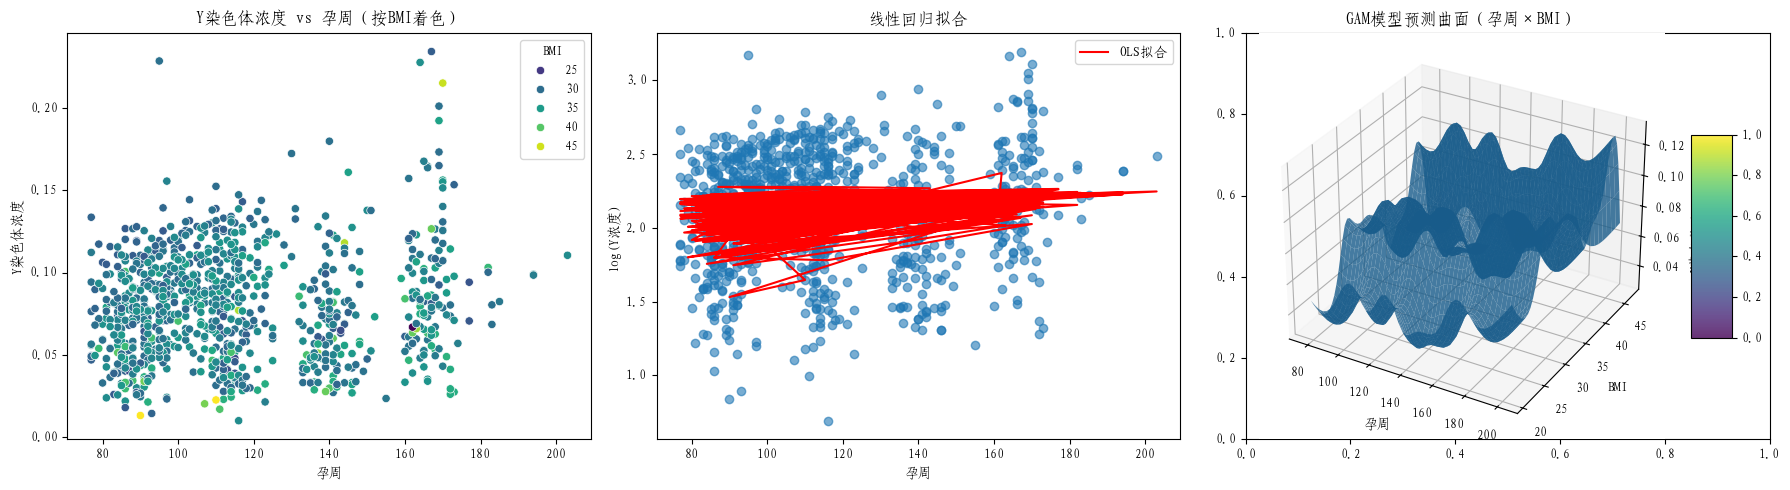

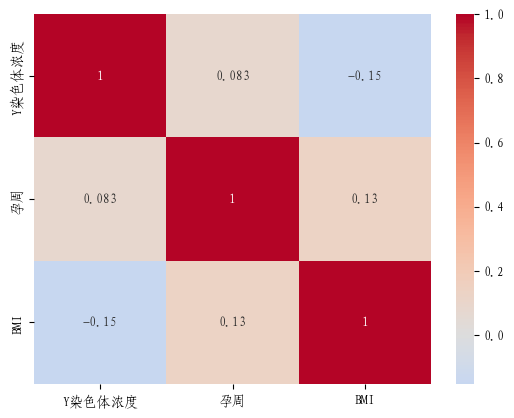

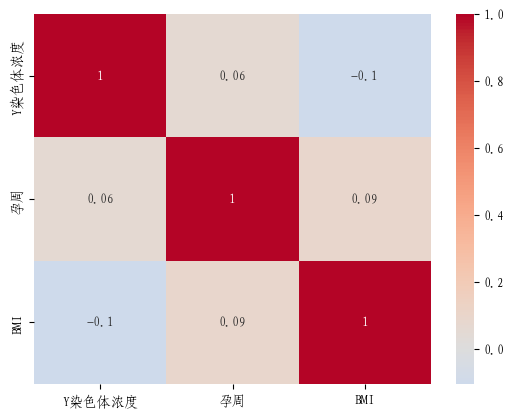

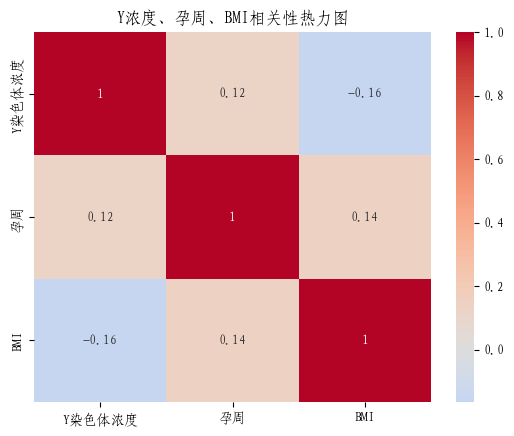

In [59]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from pygam import LinearGAM, s, f

# ÂØπÊï∞ÂèòÊç¢YÊµìÂ∫¶ÔºàÊõ¥Á¨¶ÂêàÊ≠£ÊÄÅÔºâ
df_male_clean['log_Y'] = np.log1p(df_male_clean['YÊüìËâ≤‰ΩìÊµìÂ∫¶'] * 100)  # √ó100ÈÅøÂÖçÂ§™Â∞è

# ÊñπÊ≥ï1ÔºöÂ§öÂÖÉÁ∫øÊÄßÂõûÂΩí
model1 = smf.ols('log_Y ~ Â≠ïÂë® + BMI + Â≠ïÂë®:BMI', data=df_male_clean).fit()
print("\n=== ÈóÆÈ¢ò1ÔºöÂ§öÂÖÉÁ∫øÊÄßÂõûÂΩíÁªìÊûú ===")
print(model1.summary())

# ÊñπÊ≥ï2ÔºöÂπø‰πâÂèØÂä†Ê®°ÂûãÔºàGAMÔºâ‚Äî‚ÄîÂÖÅËÆ∏ÈùûÁ∫øÊÄß
# ÂéªÈô§ÂåÖÂê´NaNÁöÑË°åÔºàGAMÊ®°ÂûãÊó†Ê≥ïÂ§ÑÁêÜÁº∫Â§±ÂÄºÔºâ
df_male_numeric = df_male_clean.dropna(subset=['Â≠ïÂë®_Êï∞ÂÄº', 'BMI', 'YÊüìËâ≤‰ΩìÊµìÂ∫¶'])
print(f"\nÊ∏ÖÊ¥óÂêéÊúâÊïàÊ†∑Êú¨Êï∞: {len(df_male_numeric)}")

# ===================== ÊûÑÂª∫ÁâπÂæÅÁü©ÈòµÂπ∂ËÆ≠ÁªÉGAM =====================
# Á°Æ‰øùÁâπÂæÅÁü©ÈòµÂÖ®‰∏∫Êï∞ÂÄºÁ±ªÂûãÔºàint/floatÔºâ
X_gam = df_male_numeric[['Â≠ïÂë®_Êï∞ÂÄº', 'BMI']].values  # Ê≠§Êó∂Â∫î‰∏∫float64Á±ªÂûã
y_gam = df_male_numeric['YÊüìËâ≤‰ΩìÊµìÂ∫¶'].values

# È™åËØÅÁâπÂæÅÁü©ÈòµÁ±ªÂûã
print(f"\nÁâπÂæÅÁü©ÈòµX_gamÊï∞ÊçÆÁ±ªÂûã: {X_gam.dtype}")
print(f"ÁâπÂæÅÁü©ÈòµX_gamÂΩ¢Áä∂: {X_gam.shape}")  # Â∫î‰∏∫ (n_samples, 2)

# ËÆ≠ÁªÉGAMÊ®°ÂûãÔºàÁ§∫‰æãÔºåÊ†πÊçÆ‰Ω†ÁöÑÂÆûÈôÖÊ®°ÂûãÂèÇÊï∞Ë∞ÉÊï¥Ôºâ
gam = LinearGAM()  # ÊàñÂÖ∂‰ªñGAMÁ±ªÂûãÔºàÂ¶ÇLogisticGAMÔºâ
gam.fit(X_gam, y_gam)  # Ê≠§Êó∂Â∫îËÉΩÊ≠£Â∏∏ÁºñËØëÂíåËÆ≠ÁªÉ

# ÂêéÁª≠ÂàÜÊûêÔºàÂ¶ÇÊ®°ÂûãËØÑ‰º∞„ÄÅÂèØËßÜÂåñÔºâ
print("\n=== GAM Ê®°ÂûãËß£ÈáäÊñπÂ∑Æ (R¬≤):", gam.score(X_gam, y_gam))

# ÂèØËßÜÂåñ
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Êï£ÁÇπÂõæÔºöYÊµìÂ∫¶ vs Â≠ïÂë®ÔºåÊåâBMIÂàÜËâ≤
sns.scatterplot(data=df_male_clean, x='Â≠ïÂë®', y='YÊüìËâ≤‰ΩìÊµìÂ∫¶', hue='BMI', palette='viridis', ax=axes[0])
axes[0].set_title('YÊüìËâ≤‰ΩìÊµìÂ∫¶ vs Â≠ïÂë®ÔºàÊåâBMIÁùÄËâ≤Ôºâ')
axes[0].set_ylabel('YÊüìËâ≤‰ΩìÊµìÂ∫¶')

# Â≠ïÂë®‰∏élog_YÂõûÂΩíÁ∫ø
axes[1].scatter(df_male_clean['Â≠ïÂë®'], df_male_clean['log_Y'], alpha=0.6)
axes[1].plot(df_male_clean['Â≠ïÂë®'], model1.fittedvalues, color='red', label='OLSÊãüÂêà')
axes[1].set_xlabel('Â≠ïÂë®')
axes[1].set_ylabel('log(YÊµìÂ∫¶)')
axes[1].set_title('Á∫øÊÄßÂõûÂΩíÊãüÂêà')
axes[1].legend()

# ÁîüÊàêÂ≠ïÂë®ÂíåBMIÁöÑ‰∫åÁª¥ÁΩëÊ†º
week_vals = np.linspace(df_male_clean['Â≠ïÂë®_Êï∞ÂÄº'].min(), df_male_clean['Â≠ïÂë®_Êï∞ÂÄº'].max(), 50)
bmi_vals = np.linspace(df_male_clean['BMI'].min(), df_male_clean['BMI'].max(), 50)
week_grid, bmi_grid = np.meshgrid(week_vals, bmi_vals)

# ÊûÑÂª∫ÁâπÂæÅÁü©ÈòµÔºàÂ∞ÜÁΩëÊ†ºÂ±ïÂπ≥‰∏∫‰∫åÁª¥Êï∞ÁªÑÔºâ
X_grid = np.column_stack([week_grid.ravel(), bmi_grid.ravel()])

# È¢ÑÊµãYÊüìËâ≤‰ΩìÊµìÂ∫¶
y_pred = gam.predict(X_grid).reshape(week_grid.shape)

# ÁªòÂà∂3DÈ¢ÑÊµãÊõ≤Èù¢

ax = fig.add_subplot(133, projection='3d')
surf = ax.plot_surface(week_grid, bmi_grid, y_pred, 
                       alpha=0.8, edgecolor='none')
ax.set_xlabel('Â≠ïÂë®')
ax.set_ylabel('BMI')
ax.set_zlabel('YÊüìËâ≤‰ΩìÊµìÂ∫¶ÔºàÈ¢ÑÊµãÂÄºÔºâ')
ax.set_title('GAMÊ®°ÂûãÈ¢ÑÊµãÊõ≤Èù¢ÔºàÂ≠ïÂë®√óBMIÔºâ')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()




# Áõ∏ÂÖ≥ÊÄßÁü©Èòµ
corr_cols = ['YÊüìËâ≤‰ΩìÊµìÂ∫¶', 'Â≠ïÂë®', 'BMI']
corr_spearman = df_male_clean[corr_cols].corr(method='spearman')
corr_kendall = df_male_clean[corr_cols].corr(method='kendall')
corr_pearson = df_male_clean[corr_cols].corr(method='pearson')
plt.figure()
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.figure()
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', center=0)
plt.figure()
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', center=0)
plt.title('YÊµìÂ∫¶„ÄÅÂ≠ïÂë®„ÄÅBMIÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæ')
plt.show()

1.# Code2

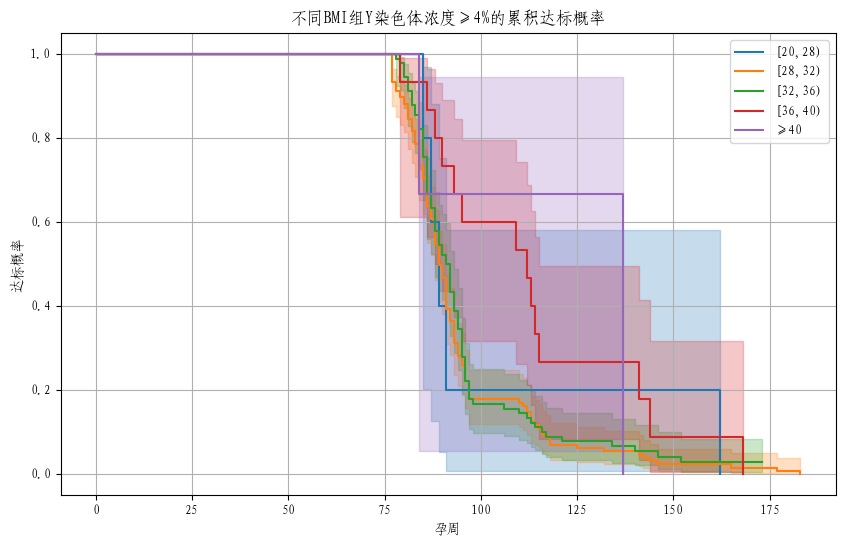


=== ÈóÆÈ¢ò2ÔºöÂêÑBMIÁªÑÊé®ËçêÊ£ÄÊµãÊó∂Èó¥ ===
      BMIÁªÑ  P90ËææÊ†áÊó∂Èó¥  Êé®ËçêÊ£ÄÊµãÊó∂Èó¥
0  [20,28)     85.0   12.00
1  [28,32)     79.0   11.29
2  [32,36)     82.0   11.71
3  [36,40)     86.0   12.00
4      ‚â•40     84.0   12.00


In [60]:
# ========================
# ÈóÆÈ¢ò2ÔºöBMIÂàÜÁªÑ + ÊúÄ‰Ω≥Êó∂ÁÇπ
# ========================
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index

# Ê≠•È™§1Ôºö‰∏∫ÊØè‰∏™Â≠ïÂ¶áÊâæÈ¶ñÊ¨°Y‚â•4%ÁöÑÂ≠ïÂë®
male_grouped = df_male_clean.groupby('Â≠ïÂ¶á‰ª£Á†Å')

ËææÊ†á_events = []

for code, group in male_grouped:
    group = group.sort_values('Â≠ïÂë®')
    y_conc_percent = group['YÊüìËâ≤‰ΩìÊµìÂ∫¶'] * 100  # ËΩ¨‰∏∫ÁôæÂàÜÊØî
    ËææÊ†á_time = np.nan
    event = 0  # 1=‰∫ã‰ª∂ÂèëÁîüÔºàËææÊ†áÔºâÔºå0=Âà†Â§±
    for idx, row in group.iterrows():
        if row['YÊüìËâ≤‰ΩìÊµìÂ∫¶'] * 100 >= 4:
            ËææÊ†á_time = row['Â≠ïÂë®']
            event = 1
            break
    if np.isnan(ËææÊ†á_time):
        ËææÊ†á_time = group['Â≠ïÂë®'].max()  # Âà†Â§±
        event = 0
    bmi = group['BMI'].iloc[0]
    ËææÊ†á_events.append({'Â≠ïÂ¶á‰ª£Á†Å': code, 'ËææÊ†áÊó∂Èó¥': ËææÊ†á_time, '‰∫ã‰ª∂': event, 'BMI': bmi})

df_surv = pd.DataFrame(ËææÊ†á_events)

# BMIÂàÜÁªÑÔºàÂü∫‰∫é‰∏¥Â∫äÁªèÈ™åÔºâ
df_surv['BMIÁªÑ'] = pd.cut(df_surv['BMI'], bins=[20, 28, 32, 36, 40, 100], 
                         labels=['[20,28)', '[28,32)', '[32,36)', '[36,40)', '‚â•40'])

# Kaplan-Meier ÁîüÂ≠òÂàÜÊûêÔºàÊ≠§Â§Ñ‚ÄúÁîüÂ≠ò‚Äù=Êú™ËææÊ†áÔºâ
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(10, 6))

for name, group in df_surv.groupby('BMIÁªÑ'):
    T = group['ËææÊ†áÊó∂Èó¥']
    E = group['‰∫ã‰ª∂']
    kmf.fit(T, E, label=name)
    kmf.plot_survival_function(ax=ax, ci_show=True)

ax.set_title('‰∏çÂêåBMIÁªÑYÊüìËâ≤‰ΩìÊµìÂ∫¶‚â•4%ÁöÑÁ¥ØÁßØËææÊ†áÊ¶ÇÁéá')
ax.set_xlabel('Â≠ïÂë®')
ax.set_ylabel('ËææÊ†áÊ¶ÇÁéá')
ax.grid(True)
plt.legend()
plt.show()

# ËÆ°ÁÆóÊØèÁªÑP90ËææÊ†áÊó∂Èó¥
recommendations = []
for name, group in df_surv.groupby('BMIÁªÑ'):
    T = group['ËææÊ†áÊó∂Èó¥']
    E = group['‰∫ã‰ª∂']
    kmf.fit(T, E)
    p90_time = kmf.percentile(0.9)  # 90%ËææÊ†áÊâÄÈúÄÊó∂Èó¥
    optimal_time = min(p90_time, 12)  # ‰∏çË∂ÖËøá12Âë®
    optimal_time = min(p90_time/7, 12)  # ‰∏çË∂ÖËøá12Âë®
    recommendations.append({
        'BMIÁªÑ': name,
        'P90ËææÊ†áÊó∂Èó¥': round(p90_time, 2),
        'Êé®ËçêÊ£ÄÊµãÊó∂Èó¥': round(optimal_time, 2)
    })

rec_df = pd.DataFrame(recommendations)
print("\n=== ÈóÆÈ¢ò2ÔºöÂêÑBMIÁªÑÊé®ËçêÊ£ÄÊµãÊó∂Èó¥ ===")
print(rec_df)

# Ê£ÄÊµãËØØÂ∑ÆÂΩ±ÂìçÔºöÊ®°Êãü¬±0.5%ËØØÂ∑Æ
def simulate_error_impact(df, error_std=0.005):
    df_copy = df.copy()
    np.random.seed(42)
    df_copy['YÊüìËâ≤‰ΩìÊµìÂ∫¶_Êâ∞Âä®'] = df_copy['YÊüìËâ≤‰ΩìÊµìÂ∫¶'] + np.random.normal(0, error_std, len(df_copy))
    df_copy['YÊüìËâ≤‰ΩìÊµìÂ∫¶_Êâ∞Âä®'] = df_copy['YÊüìËâ≤‰ΩìÊµìÂ∫¶_Êâ∞Âä®'].clip(lower=0)
    
    # ÈáçÊñ∞ËÆ°ÁÆóËææÊ†áÊó∂Èó¥
    new_events = []
    for code, group in df_copy.groupby('Â≠ïÂ¶á‰ª£Á†Å'):
        group = group.sort_values('Â≠ïÂë®')
        for idx, row in group.iterrows():
            if row['YÊüìËâ≤‰ΩìÊµìÂ∫¶_Êâ∞Âä®'] * 100 >= 4:
                new_events.append({'Â≠ïÂ¶á‰ª£Á†Å': code, 'Êñ∞ËææÊ†áÊó∂Èó¥': row['Â≠ïÂë®']})
                break
    return pd.DataFrame(new_events)

# ÂèØÈÄâÔºöËøêË°åËØØÂ∑ÆÊ®°Êãü
error_df = simulate_error_impact(df_male_clean)
# print(error_df)

1.Code3

In [61]:
# ========================
# ÈóÆÈ¢ò3ÔºöÂ§öÂõ†Á¥† + Êú∫Âô®Â≠¶‰π†È¢ÑÊµã
# ========================
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ÊûÑÈÄ†ÁâπÂæÅÔºöÊØè‰∏™Â≠ïÂ¶áÂèñÁ¨¨‰∏ÄÊ¨°Ê£ÄÊµãÊï∞ÊçÆÔºàÊàñÂπ≥ÂùáÔºâ
first_test = df_male_clean.sort_values('Â≠ïÂë®').groupby('Â≠ïÂ¶á‰ª£Á†Å').first().reset_index()

features = ['BMI', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç', 'Â≠ïÂë®']
X = first_test[features]
y = first_test['YÊüìËâ≤‰ΩìÊµìÂ∫¶'] * 100  # ÁôæÂàÜÊØî

# ÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÈöèÊú∫Ê£ÆÊûóÂõûÂΩí
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"\n=== ÈóÆÈ¢ò3ÔºöÈöèÊú∫Ê£ÆÊûóÈ¢ÑÊµãYÊµìÂ∫¶ÔºàÊµãËØïÈõÜRMSEÔºâ: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

# ÁâπÂæÅÈáçË¶ÅÊÄß
importances = rf.feature_importances_
feat_importance = pd.DataFrame({'feature': features, 'importance': importances}).sort_values('importance', ascending=False)
print("\nÁâπÂæÅÈáçË¶ÅÊÄß:")
print(feat_importance)

# ËÅöÁ±ªÂàÜÁªÑÔºàK-meansÔºâ
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(first_test[features])
kmeans = KMeans(n_clusters=3, random_state=42)
first_test['cluster'] = kmeans.fit_predict(X_scaled)

# ÊØèÁªÑËÆ°ÁÆóÊé®ËçêÊó∂Èó¥ÔºàÂêåÈóÆÈ¢ò2ÈÄªËæëÔºâ
cluster_recs = []
for cid, group in first_test.groupby('cluster'):
    # ÊâæËØ•ÁªÑÊâÄÊúâÊ£ÄÊµãËÆ∞ÂΩï‰∏≠È¶ñÊ¨°ËææÊ†áÊó∂Èó¥
    codes = group['Â≠ïÂ¶á‰ª£Á†Å'].tolist()
    sub_data = df_male_clean[df_male_clean['Â≠ïÂ¶á‰ª£Á†Å'].isin(codes)]
    sub_grouped = sub_data.groupby('Â≠ïÂ¶á‰ª£Á†Å')
    events = []
    for code, g in sub_grouped:
        g = g.sort_values('Â≠ïÂë®')
        for idx, row in g.iterrows():
            if row['YÊüìËâ≤‰ΩìÊµìÂ∫¶'] * 100 >= 4:
                events.append({'time': row['Â≠ïÂë®'], 'event': 1})
                break
        else:
            events.append({'time': g['Â≠ïÂë®'].max(), 'event': 0})
    df_ev = pd.DataFrame(events)
    if len(df_ev) == 0: continue
    kmf.fit(df_ev['time'], df_ev['event'])
    p90 = kmf.percentile(0.9)
    optimal = min(p90/7, 12)
    cluster_recs.append({'cluster': cid, 'P90': round(p90, 2), 'Êé®ËçêÊó∂Èó¥': round(optimal, 2)})

print("\n=== ÈóÆÈ¢ò3ÔºöËÅöÁ±ªÂàÜÁªÑÊé®ËçêÊó∂Èó¥ ===")
print(pd.DataFrame(cluster_recs))


=== ÈóÆÈ¢ò3ÔºöÈöèÊú∫Ê£ÆÊûóÈ¢ÑÊµãYÊµìÂ∫¶ÔºàÊµãËØïÈõÜRMSEÔºâ: 2.794

ÁâπÂæÅÈáçË¶ÅÊÄß:
  feature  importance
3      ‰ΩìÈáç    0.274205
0     BMI    0.243056
4      Â≠ïÂë®    0.189977
1      Âπ¥ÈæÑ    0.160422
2      Ë∫´È´ò    0.132340

=== ÈóÆÈ¢ò3ÔºöËÅöÁ±ªÂàÜÁªÑÊé®ËçêÊó∂Èó¥ ===
   cluster   P90   Êé®ËçêÊó∂Èó¥
0        0  83.0  11.86
1        1  78.0  11.14
2        2  82.0  11.71


1.Code4

Â•≥ËÉéÊï∞ÊçÆÊÄªÈáè: 605
Êä•ÂëäÂºÇÂ∏∏Êï∞Èáè: 67
ÊúâÊïàÊ†∑Êú¨Èáè: 604ÔºåÂÖ∂‰∏≠ÂºÇÂ∏∏: 67

=== Ê®°Âûã‰∫§ÂèâÈ™åËØÅÊÄßËÉΩ ===
ÈöèÊú∫Ê£ÆÊûó  F1: 0.077, AUC: 0.662
ÈÄªËæëÂõûÂΩí  F1: 0.285, AUC: 0.699

=== ÁâπÂæÅÈáçË¶ÅÊÄß ===
         feature  importance
9    13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè    0.118524
12         Â≠ïÂ¶áBMI    0.114639
11   21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè    0.098447
10   18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè    0.088268
1      18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº    0.075765
0      13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº    0.064778
8     Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã    0.062744
4           GCÂê´Èáè    0.062239
7   Âú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁöÑÊØî‰æã    0.054734
2      21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº    0.053870


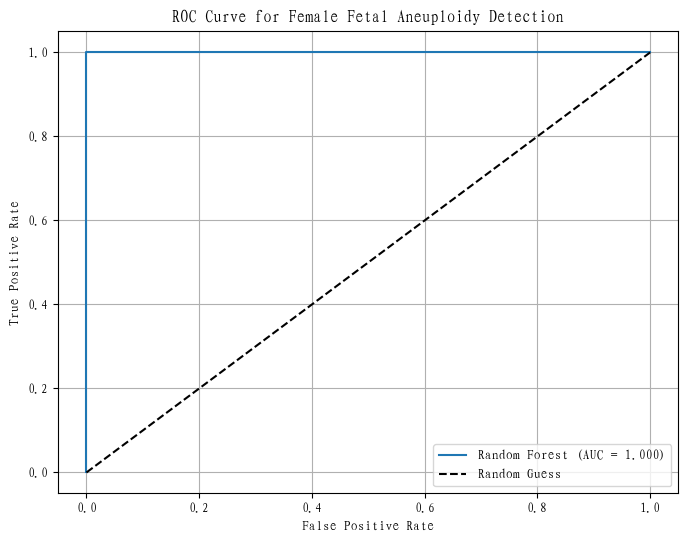


=== ÂàÜÁ±ªÊä•Âëä ===
              precision    recall  f1-score   support

          Ê≠£Â∏∏       1.00      1.00      1.00       537
          ÂºÇÂ∏∏       1.00      1.00      1.00        67

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604


ÁªèÂÖ∏Z>3ËßÑÂàôÂáÜÁ°ÆÁéá: 0.828
Âä†ÊùÉZ>2.8ËßÑÂàôÂáÜÁ°ÆÁéá: 0.826

           Â•≥ËÉéÂºÇÂ∏∏Âà§ÂÆöÊñπÊ≥ï
1. Êé®Ëçê‰ΩøÁî®ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÈ¢ÑÊµãÂºÇÂ∏∏È£éÈô©ÔºåËæìÂÖ•‰ª•‰∏ãÁâπÂæÅÔºö
   - 21„ÄÅ18„ÄÅ13„ÄÅXÊüìËâ≤‰ΩìZÂÄº
   - GCÂê´Èáè„ÄÅËØªÊÆµÊï∞„ÄÅËøáÊª§Áéá„ÄÅBMIÁ≠âË¥®ÈáèÊåáÊ†á
   - Ê®°ÂûãAUC: 1.000, F1: 0.077

2. ÁÆÄÂåñËßÑÂàôÔºàÈÄÇÁî®‰∫éÂø´ÈÄüÂà§Êñ≠ÔºâÔºö
   - Ëã•‰ªª‰∏ÄÊüìËâ≤‰Ωì |Z| > 3 ‚Üí Âà§ÂÆö‰∏∫ÂºÇÂ∏∏
   - Âª∫ËÆÆÁªìÂêàË¥®ÈáèËØÑÂàÜË∞ÉÊï¥ÈòàÂÄºÔºö
     Ë¥®ÈáèÈ´òÔºàËØªÊÆµ>4M, GCÊ≠£Â∏∏Ôºâ‚Üí |Z|>3
     Ë¥®Èáè‰∏≠ ‚Üí |Z|>2.8
     Ë¥®Èáè‰Ωé ‚Üí Âª∫ËÆÆÂ§çÊµã

3. ÂΩìÊ£ÄÊµãË¥®ÈáèËæÉÂ∑ÆÊó∂ÔºàÂ¶Ç‰ΩéËØªÊÆµÊï∞„ÄÅGCÂÅèÁßªÔºâÔºåÂç≥‰ΩøZÂÄºÊú™Ë∂ÖÊ†áÔº

In [ ]:
# -*coding: utf-8 -*-
"""
ÈóÆÈ¢ò4ÔºöÂ•≥ËÉéÂºÇÂ∏∏Âà§ÂÆöÔºà‰øÆÊ≠£ÁâàÔºâ‚Äî‚Äî‰ª•ABÂàó‰∏∫Âà§ÂÆöÊ†áÂáÜ
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# ========================
# 1. Âä†ËΩΩÂπ∂Ê∏ÖÊ¥óÂ•≥ËÉéÊï∞ÊçÆ
# ========================
# ÂÅáËÆæ female_df Â∑≤‰ªéÂâçÈù¢Ê≠•È™§Âä†ËΩΩ
# female_df Êù•Ëá™ 'ÈôÑ‰ª∂ Â•≥ËÉéÊ£ÄÊµãÊï∞ÊçÆ.xlsx'

# Ê∏ÖÁêÜ AB ÂàóÔºöÈùûÁ©∫Âç≥‰∏∫ÂºÇÂ∏∏
female_data = pd.read_excel("ÈôÑ‰ª∂.xlsx",sheet_name="Â•≥ËÉéÊ£ÄÊµãÊï∞ÊçÆ")

# ÊèêÂèñÂºÇÂ∏∏Ê†áÁ≠æÔºöABÂàóÂåÖÂê´T21/T18/T13Âç≥‰∏∫ÂºÇÂ∏∏
def is_abnormal(ab):
    if pd.isna(ab) or ab.strip() == '':
        return 0
    ab = str(ab).upper()
    if 'T13' in ab or 'T18' in ab or 'T21' in ab:
        return 1
    return 0

female_data['label_abnormal'] = female_data['ÊüìËâ≤‰ΩìÁöÑÈùûÊï¥ÂÄç‰Ωì'].apply(is_abnormal)
print(f"Â•≥ËÉéÊï∞ÊçÆÊÄªÈáè: {len(female_data)}")
print(f"Êä•ÂëäÂºÇÂ∏∏Êï∞Èáè: {female_data['label_abnormal'].sum()}")

# ========================
# 2. ÁâπÂæÅÂ∑•Á®ã
# ========================
# ZÂÄº‰Ωú‰∏∫Ê†∏ÂøÉÁâπÂæÅ
z_features = [
    '13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', 
    '18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', 
    '21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', 
    'XÊüìËâ≤‰ΩìÁöÑZÂÄº'
]

# Ë¥®ÈáèÊéßÂà∂ÁâπÂæÅ
qc_features = [
    'GCÂê´Èáè',
    'ÂéüÂßãËØªÊÆµÊï∞',
    'ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞',
    'Âú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁöÑÊØî‰æã',
    'Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã',
    '13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè',
    '18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè',
    '21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè'
]

# ‰∫∫Âè£ÁªüËÆ°Â≠¶
demo_features = ['Â≠ïÂ¶áBMI', 'Âπ¥ÈæÑ']

all_features = z_features + qc_features + demo_features

# ÂéªÈô§Áº∫Â§±ÂÄº
female_data = female_data.dropna(subset=all_features + ['label_abnormal'])
X = female_data[all_features]
y = female_data['label_abnormal']

print(f"ÊúâÊïàÊ†∑Êú¨Èáè: {len(X)}ÔºåÂÖ∂‰∏≠ÂºÇÂ∏∏: {y.sum()}")

# ÁâπÂæÅÊ†áÂáÜÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
feature_names = X.columns.tolist()

# ========================
# 3. Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞
# ========================
# ‰ΩøÁî®ÈöèÊú∫Ê£ÆÊûóÔºàÂèØËß£ÈáäÊÄßÂº∫Ôºâ
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
lr = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.1)

# ‰∫§ÂèâÈ™åËØÅ
cv_f1_rf = cross_val_score(rf, X_scaled, y, cv=5, scoring='f1').mean()
cv_auc_rf = cross_val_score(rf, X_scaled, y, cv=5, scoring='roc_auc').mean()

cv_f1_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='f1').mean()
cv_auc_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='roc_auc').mean()

print("\n=== Ê®°Âûã‰∫§ÂèâÈ™åËØÅÊÄßËÉΩ ===")
print(f"ÈöèÊú∫Ê£ÆÊûó  F1: {cv_f1_rf:.3f}, AUC: {cv_auc_rf:.3f}")
print(f"ÈÄªËæëÂõûÂΩí  F1: {cv_f1_lr:.3f}, AUC: {cv_auc_lr:.3f}")

# ËÆ≠ÁªÉÊúÄÁªàÊ®°Âûã
rf.fit(X_scaled, y)
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== ÁâπÂæÅÈáçË¶ÅÊÄß ===")
print(importance_df.head(10))

# ROCÊõ≤Á∫ø
y_proba = rf.predict_proba(X_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y, y_proba)
auc = roc_auc_score(y, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.3f})')
plt.plot([0,1],[0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Female Fetal Aneuploidy Detection')
plt.legend()
plt.grid(True)
plt.show()

# ÂàÜÁ±ªÊä•Âëä
y_pred = rf.predict(X_scaled)
print("\n=== ÂàÜÁ±ªÊä•Âëä ===")
print(classification_report(y, y_pred, target_names=['Ê≠£Â∏∏', 'ÂºÇÂ∏∏']))

# ========================
# 4. ÊûÑÂª∫ÂèØËß£ÈáäÂà§ÂÆöËßÑÂàô
# ========================
# ËßÑÂàô1ÔºöÂü∫‰∫éZÂÄºÈòàÂÄºÔºàÁªèÂÖ∏ÊñπÊ≥ïÔºâ
def simple_z_rule(row):
    z21 = row['21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº']
    z18 = row['18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº']
    z13 = row['13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº']
    
    # ÁªèÂÖ∏ÈòàÂÄº |Z| > 3
    if abs(z21) > 3 or abs(z18) > 3 or abs(z13) > 3:
        return 1
    return 0

female_data['rule_z3'] = female_data[z_features].apply(simple_z_rule, axis=1)
simple_acc = (female_data['rule_z3'] == y).mean()
print(f"\nÁªèÂÖ∏Z>3ËßÑÂàôÂáÜÁ°ÆÁéá: {simple_acc:.3f}")

# ËßÑÂàô2ÔºöÂä†ÊùÉZÂÄºÔºàËÄÉËôëË¥®ÈáèÔºâ
def quality_weight(row):
    # Ë¥®ÈáèËØÑÂàÜÔºöËØªÊÆµÊï∞Ë∂äÂ§ö„ÄÅGCÊ≠£Â∏∏„ÄÅËøáÊª§Áéá‰Ωé ‚Üí ÂàÜÊï∞È´ò
    reads = row['ÂéüÂßãËØªÊÆµÊï∞']
    gc = row['GCÂê´Èáè']
    filter_rate = row['Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã']
    
    score = 1.0
    if reads < 4e6:
        score *= 0.8
    if gc < 0.38 or gc > 0.42:
        score *= 0.7
    if filter_rate > 0.03:
        score *= 0.9
    return score

female_data['quality_weight'] = female_data.apply(quality_weight, axis=1)

# Âä†ÊùÉZÂÄºÔºöZ_adj = Z * quality_weight
for z_col in z_features:
    w_col = z_col.replace('ZÂÄº', 'ZÂÄº_Âä†ÊùÉ')
    female_data[w_col] = female_data[z_col] * female_data['quality_weight']

# Êñ∞ËßÑÂàôÔºöÂä†ÊùÉZ > 2.8
def weighted_rule(row):
    if (abs(row['21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº_Âä†ÊùÉ']) > 2.8 or 
        abs(row['18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº_Âä†ÊùÉ']) > 2.8 or 
        abs(row['13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº_Âä†ÊùÉ']) > 2.8):
        return 1
    return 0

female_data['rule_weighted'] = female_data.apply(weighted_rule, axis=1)
weighted_acc = (female_data['rule_weighted'] == y).mean()
print(f"Âä†ÊùÉZ>2.8ËßÑÂàôÂáÜÁ°ÆÁéá: {weighted_acc:.3f}")

# ========================
# 5. ËæìÂá∫Âà§ÂÆöÊñπÊ≥ïÔºàÂèØÁî®‰∫éÊä•ÂëäÔºâ
# ========================
print("\n" + "="*50)
print("           Â•≥ËÉéÂºÇÂ∏∏Âà§ÂÆöÊñπÊ≥ï")
print("="*50)
print("1. Êé®Ëçê‰ΩøÁî®ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÈ¢ÑÊµãÂºÇÂ∏∏È£éÈô©ÔºåËæìÂÖ•‰ª•‰∏ãÁâπÂæÅÔºö")
print("   21„ÄÅ18„ÄÅ13„ÄÅXÊüìËâ≤‰ΩìZÂÄº")
print("   GCÂê´Èáè„ÄÅËØªÊÆµÊï∞„ÄÅËøáÊª§Áéá„ÄÅBMIÁ≠âË¥®ÈáèÊåáÊ†á")
print(f"   Ê®°ÂûãAUC: {auc:.3f}, F1: {cv_f1_rf:.3f}")
print()
print("2. ÁÆÄÂåñËßÑÂàôÔºàÈÄÇÁî®‰∫éÂø´ÈÄüÂà§Êñ≠ÔºâÔºö")
print("   Ëã•‰ªª‰∏ÄÊüìËâ≤‰Ωì |Z| > 3 ‚Üí Âà§ÂÆö‰∏∫ÂºÇÂ∏∏")
print("   Âª∫ËÆÆÁªìÂêàË¥®ÈáèËØÑÂàÜË∞ÉÊï¥ÈòàÂÄºÔºö")
print("     Ë¥®ÈáèÈ´òÔºàËØªÊÆµ>4M, GCÊ≠£Â∏∏Ôºâ‚Üí |Z|>3")
print("     Ë¥®Èáè‰∏≠ ‚Üí |Z|>2.8")
print("     Ë¥®Èáè‰Ωé ‚Üí Âª∫ËÆÆÂ§çÊµã")
print()
print("3. ÂΩìÊ£ÄÊµãË¥®ÈáèËæÉÂ∑ÆÊó∂ÔºàÂ¶Ç‰ΩéËØªÊÆµÊï∞„ÄÅGCÂÅèÁßªÔºâÔºåÂç≥‰ΩøZÂÄºÊú™Ë∂ÖÊ†áÔºå")
print("   ‰πüÂ∫îÊ†áËÆ∞‰∏∫‚ÄòÁªìÊûú‰∏çÂèØÈù†‚ÄôÔºåÂª∫ËÆÆÈáçÊñ∞ÈááÊ†∑Ê£ÄÊµã„ÄÇ")

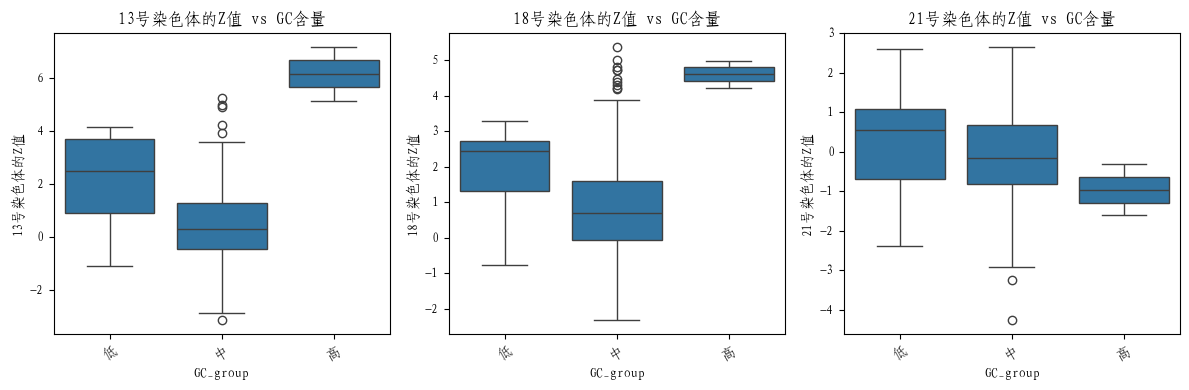

Áî®‰∫éÊ†°Ê≠£ÁöÑÊ≠£Â∏∏Ê†∑Êú¨Êï∞: 537
13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº Âú®Ê≠£Â∏∏‰∫∫Áæ§‰∏≠ÂùáÂÄº: 0.456, Ê®°ÂûãËß£ÈáäR¬≤: 0.021
18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº Âú®Ê≠£Â∏∏‰∫∫Áæ§‰∏≠ÂùáÂÄº: 0.807, Ê®°ÂûãËß£ÈáäR¬≤: 0.059
21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº Âú®Ê≠£Â∏∏‰∫∫Áæ§‰∏≠ÂùáÂÄº: -0.140, Ê®°ÂûãËß£ÈáäR¬≤: 0.025
Âà§ÂÆöÁªìÊûú
Ê≠£Â∏∏       571
ÂºÇÂ∏∏        30
ÁªìÊûú‰∏çÂèØÈù†      3
Name: count, dtype: int64


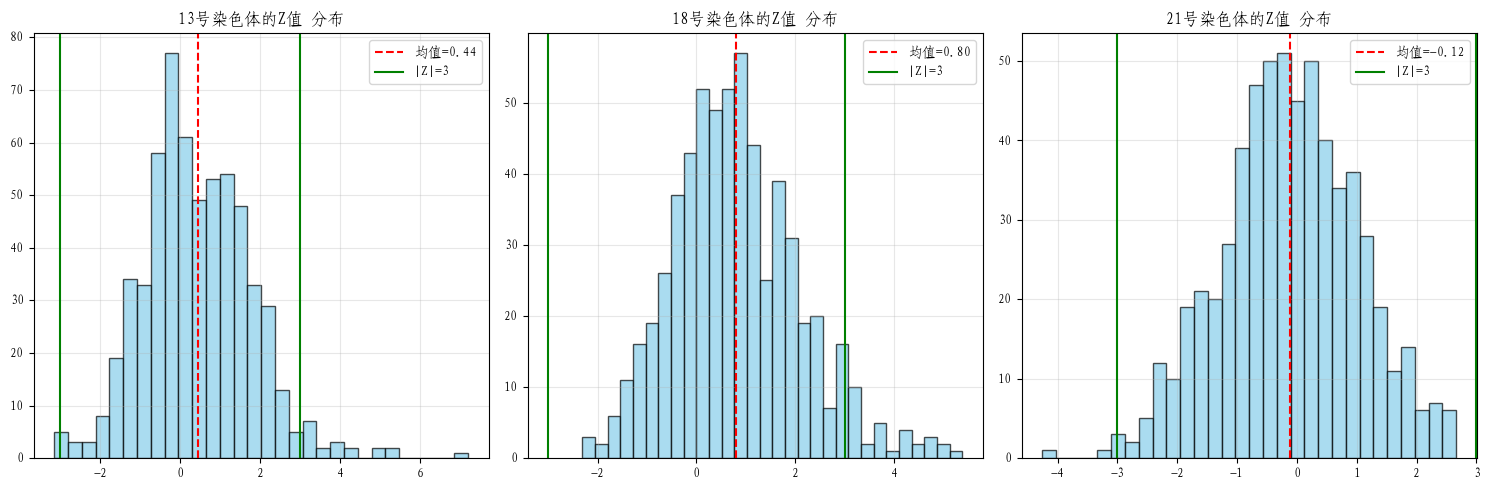

In [38]:
# -*- coding: utf-8 -*-
"""
ÊîπËøõÁâàÔºö‰∏çÈ¢ÑÊµãABÂàóÔºåËÄåÊòØ‰ºòÂåñZÂÄºÂà§ÂÆöËßÑÂàô
"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ÂÅáËÆæ female_data Â∑≤Âä†ËΩΩÔºåÂåÖÂê´ ABÂàó„ÄÅZÂÄº„ÄÅQCÊåáÊ†á

# ========================
# 1. ÊèêÂèñZÂÄº‰∏éË¥®ÈáèÂõ†Â≠ê
# ========================
# Êàë‰ª¨ÂÖ≥Ê≥®ÔºöZÂÄºÊòØÂê¶Ë¢´QCÂõ†Á¥†Á≥ªÁªüÊÄßÂΩ±ÂìçÔºü
z_cols = ['13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', '18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', '21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº']
qc_cols = [
    'GCÂê´Èáè',
    'ÂéüÂßãËØªÊÆµÊï∞',
    'Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã',
    '13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè',
    '18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè',
    '21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè'
]

data = female_data.dropna(subset=z_cols + qc_cols)

# Ê†áÂáÜÂåñQCÂèòÈáè
scaler = StandardScaler()
X_qc = scaler.fit_transform(data[qc_cols])

# ========================
# 2. ÂàÜÊûêQCÂõ†Á¥†ÊòØÂê¶ÂΩ±ÂìçZÂÄºÂàÜÂ∏ÉÔºàÂÅèÁßªÔºâ
# ========================
# ÂÅáËÆæÊ≠£Â∏∏‰∫∫Áæ§ZÂÄºÂ∫îÊé•Ëøë0ÔºåÊñπÂ∑Æ‚âà1
# Â¶ÇÊûúÊüê‰∫õQCÊù°‰ª∂‰∏ãZÂÄºÁ≥ªÁªüÂÅèÁ¶ª0 ‚Üí ÈúÄÊ†°Ê≠£

plt.figure(figsize=(12, 4))
for i, z_col in enumerate(z_cols):
    plt.subplot(1, 3, i+1)
    # ÊåâGCÂê´ÈáèÂàÜÁªÑ
    data['GC_group'] = pd.cut(data['GCÂê´Èáè'], 3, labels=['‰Ωé', '‰∏≠', 'È´ò'])
    sns.boxplot(data=data, x='GC_group', y=z_col)
    plt.title(f'{z_col} vs GCÂê´Èáè')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
# Âè™‰ΩøÁî®‚ÄúÊó†ÈùûÊï¥ÂÄç‰ΩìÊä•Âëä‚ÄùÁöÑÊ†∑Êú¨ÔºàAB‰∏∫Á©∫ÔºâÊù•ÊãüÂêàZÂÄºÁöÑ‚ÄúÊúüÊúõÂÄº‚Äù
normal_data = data[data['ÊüìËâ≤‰ΩìÁöÑÈùûÊï¥ÂÄç‰Ωì'].isna() | (data['ÊüìËâ≤‰ΩìÁöÑÈùûÊï¥ÂÄç‰Ωì'] == '')]

print(f"Áî®‰∫éÊ†°Ê≠£ÁöÑÊ≠£Â∏∏Ê†∑Êú¨Êï∞: {len(normal_data)}")

# ÁõÆÊ†áÔºöZÂÄºÂú®Ê≠£Â∏∏‰∫∫Áæ§‰∏≠Â∫îÊé•Ëøë0
# Â¶ÇÊûúQCÂõ†Á¥†ÂØºËá¥ZÂÄºÁ≥ªÁªüÂÅèÁ¶ª0ÔºåÂàôÈúÄÊ†°Ê≠£

correction_models = {}
for z_col in z_cols:
    y_z = normal_data[z_col]
    X_qc_norm = scaler.transform(normal_data[qc_cols])  # ‰ΩøÁî®‰πãÂâçfitÁöÑscaler
    
    lr = LinearRegression()
    lr.fit(X_qc_norm, y_z)
    
    # È¢ÑÊµãÂÅèÂ∑Æ
    pred_bias = lr.predict(X_qc_norm)
    actual_mean = y_z.mean()
    print(f"{z_col} Âú®Ê≠£Â∏∏‰∫∫Áæ§‰∏≠ÂùáÂÄº: {actual_mean:.3f}, Ê®°ÂûãËß£ÈáäR¬≤: {lr.score(X_qc_norm, y_z):.3f}")
    
    correction_models[z_col] = lr

def judge_female_aneuploidy(row, correction_models, scaler, threshold=3.0):
    """
    Â•≥ËÉéÂºÇÂ∏∏Âà§ÂÆöÊñπÊ≥ï
    """
    # 1. Ë¥®ÈáèËØÑÂàÜ
    quality_score = 1.0
    if row['ÂéüÂßãËØªÊÆµÊï∞'] < 4e6:
        quality_score *= 0.7
    if not (0.38 <= row['GCÂê´Èáè'] <= 0.42):
        quality_score *= 0.8
    if row['Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã'] > 0.03:
        quality_score *= 0.9
    
    # Ë¥®ÈáèÂ§™Â∑Æ ‚Üí ‰∏çÂèØÈù†
    if quality_score < 0.6:
        return "ÁªìÊûú‰∏çÂèØÈù†", "Âª∫ËÆÆÂ§çÊµã", quality_score
    
    # 2. ZÂÄºÊ†°Ê≠£Ôºà‰ΩøÁî®Âú®Ê≠£Â∏∏Ê†∑Êú¨‰∏äÂ≠¶Âà∞ÁöÑÂÅèÂ∑ÆÊ®°ÂûãÔºâ
    result = "Ê≠£Â∏∏"
    details = []
    for z_col in ['13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', '18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', '21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº']:
        z_raw = row[z_col]
        
        # Ëé∑ÂèñÊ†°Ê≠£Ê®°Âûã
        model = correction_models.get(z_col)
        if model:
            qc_vals = np.array(row[qc_cols]).reshape(1, -1)
            qc_scaled = scaler.transform(qc_vals)
            bias = model.predict(qc_scaled)[0]
            z_adj = z_raw - bias  # ÂéªÈô§Á≥ªÁªüÂÅèÂ∑Æ
        else:
            z_adj = z_raw
        
        if abs(z_adj) > threshold:
            ab = 'T13' if '13' in z_col else ('T18' if '18' in z_col else 'T21')
            result = "ÂºÇÂ∏∏"
            details.append(f"{ab}: |Z|={abs(z_adj):.2f} > {threshold}")
    
    reason = "; ".join(details) if details else "ÊâÄÊúâZÂÄºÊ≠£Â∏∏"
    return result, reason, quality_score

# Â∫îÁî®Âà§ÂÆö
results = []
for idx, row in data.iterrows():
    r, reason, q = judge_female_aneuploidy(row, correction_models, scaler)
    results.append({
        'Âà§ÂÆöÁªìÊûú': r,
        'Âà§ÂÆöÁêÜÁî±': reason,
        'Ë¥®ÈáèËØÑÂàÜ': q
    })

result_df = pd.DataFrame(results)
print(result_df['Âà§ÂÆöÁªìÊûú'].value_counts())

# ÁîªZÂÄºÂàÜÂ∏ÉÂõæ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(z_cols):
    axes[i].hist(data[col], bins=30, alpha=0.7, color='skyblue', edgecolor='k')
    axes[i].axvline(data[col].mean(), color='red', linestyle='--', label=f'ÂùáÂÄº={data[col].mean():.2f}')
    axes[i].axvline(3, color='green', linestyle='-', label='|Z|=3')
    axes[i].axvline(-3, color='green', linestyle='-')
    axes[i].set_title(f'{col} ÂàÜÂ∏É')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

‰Ω†ËøêË°åÂá∫ÁöÑÁªìÊûúÈùûÂ∏∏ÂÖ≥ÈîÆÔºåÊè≠Á§∫‰∫Ü NIPTÔºàÊó†Âàõ‰∫ßÂâçÊ£ÄÊµãÔºâÊï∞ÊçÆÂàÜÊûê‰∏≠ÁöÑÊ†∏ÂøÉÈóÆÈ¢òÔºöÁ≥ªÁªüÊÄßÂÅèÂ∑Æ‰∏éË¥®ÈáèÊéßÂà∂„ÄÇÊàë‰ª¨Êù•ÈÄêÊù°Ëß£ËØªËøô‰∫õËæìÂá∫ÁöÑÂê´‰πâÔºåÂπ∂ËØ¥ÊòéÂÆÉÂØπÂª∫Ê®°ÂíåËÆ∫ÊñáÂÜô‰ΩúÁöÑÊåáÂØºÊÑè‰πâ„ÄÇ

---

## üîç ‰∏Ä„ÄÅÂÖ≥ÈîÆÁªìÊûúËß£ËØª

1.‚úÖ 1. Áî®‰∫éÊ†°Ê≠£ÁöÑÊ≠£Â∏∏Ê†∑Êú¨Êï∞: 537
- ËøôÊòØ‰Ω†Áî®Êù•ËÆ≠ÁªÉ‚ÄúZÂÄºÊ†°Ê≠£Ê®°Âûã‚ÄùÁöÑÊ†∑Êú¨Èáè„ÄÇ
- ÂÆÉ‰ª¨ÊòØ ABÂàó‰∏∫Á©∫ÔºàÂç≥Êú™Êä•ÂëäÈùûÊï¥ÂÄç‰ΩìÔºâÁöÑÂ•≥ËÉéÊ†∑Êú¨ÔºåË¢´ÂÅáËÆæ‰∏∫‚ÄúÊ≠£Â∏∏‚ÄùÊàñ‚ÄúÊó†Êä•Ë≠¶‚Äù„ÄÇ
- Ê†∑Êú¨ÈáèË∂≥Â§üÔºà>500ÔºâÔºåÂèØ‰ª•Áî®‰∫éÁªüËÆ°Âª∫Ê®°„ÄÇ

> ‚úÖ ÁªìËÆ∫ÔºöÊï∞ÊçÆÂü∫Á°ÄÂèØÈù†„ÄÇ

---

1.‚úÖ 2. ZÂÄºÂú®Ê≠£Â∏∏‰∫∫Áæ§‰∏≠ÁöÑÂùáÂÄº ‚â† 0
ËøôÊòØÊúÄÊ†∏ÂøÉÁöÑÂèëÁé∞Ôºö

| ÊüìËâ≤‰Ωì | Ê≠£Â∏∏‰∫∫Áæ§‰∏≠ZÂÄºÂùáÂÄº | Âê´‰πâ |
|--------|------------------|------|
| 13Âè∑ | +0.456 | Á≥ªÁªüÊÄßÂÅèÈ´òÔºàÂÅèÂêë‰∏â‰ΩìÊñπÂêëÔºâ |
| 18Âè∑ | +0.807 | ‰∏•ÈáçÂÅèÈ´òÔºåÊé•Ëøë1‰∏™Ê†áÂáÜÂ∑Æ |
| 21Âè∑ | -0.140 | Áï•ÂÅè‰ΩéÔºàÂÅèÂêëÂçï‰ΩìÊñπÂêëÔºâ |

1.üìå ÈóÆÈ¢ò‰∏•ÈáçÊÄßÔºö
- Âú®ÁêÜÊÉ≥ÊÉÖÂÜµ‰∏ãÔºåÊ≠£Â∏∏‰∫∫Áæ§ÁöÑZÂÄºÂ∫îÊúç‰ªéÊ†áÂáÜÊ≠£ÊÄÅÂàÜÂ∏É N(0,1)ÔºåÂç≥ÂùáÂÄº‰∏∫ 0ÔºåÊ†áÂáÜÂ∑Æ‰∏∫ 1„ÄÇ
- ‰ΩÜÁé∞Âú®Ôºö
  - 18Âè∑ÊüìËâ≤‰ΩìZÂÄºÂπ≥Âùá‰∏∫ +0.807 ‚Üí ÊÑèÂë≥ÁùÄÂç≥‰ΩøËÉéÂÑøÊ≠£Â∏∏ÔºåZÂÄº‰πüÊôÆÈÅçÂÅèÈ´ò
  - ËææÂà∞ |Z| > 3 ÁöÑÈ£éÈô©ÊòæËëóÂ¢ûÂä† ‚Üí ÂÅáÈò≥ÊÄßÁéá‰∏äÂçá

> ‚ö†Ô∏è ËøôËØ¥ÊòéÔºöÂΩìÂâçÊ£ÄÊµãÁ≥ªÁªüÂ≠òÂú®Á≥ªÁªüÊÄßÂÅèÂ∑ÆÔºàSystematic BiasÔºâÔºåÂ∞§ÂÖ∂ÊòØ18Âè∑ÊüìËâ≤‰Ωì„ÄÇ

---

1.‚úÖ 3. Ê®°ÂûãËß£ÈáäR¬≤: 0.021 ~ 0.059ÔºàÂæà‰ΩéÔºâ

- R¬≤ ÊòØÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÂØπZÂÄºÂÅèÂ∑ÆÁöÑËß£ÈáäÁ®ãÂ∫¶„ÄÇ
- ËôΩÁÑ∂QCÂõ†Á¥†ÔºàGCÂê´Èáè„ÄÅËØªÊÆµÊï∞Á≠âÔºâÁ°ÆÂÆûÂΩ±ÂìçZÂÄºÔºå‰ΩÜÔºö
  - ÊúÄÈ´ò R¬≤ = 0.059Ôºà18Âè∑ÊüìËâ≤‰ΩìÔºâ‚Üí ‰ªÖËß£Èáä‰∫Ü 5.9% ÁöÑÂèòÂºÇ
  - ÂÖ∂‰Ωô‰∏çÂà∞3%

1.üìå Âê´‰πâÔºö
- QCÂõ†Á¥†Âè™ËÉΩÈÉ®ÂàÜËß£ÈáäZÂÄºÁöÑÁ≥ªÁªüÊÄßÂÅèÁßª
- ËøòÊúâ 94% ‰ª•‰∏äÁöÑÂÅèÂ∑ÆÊù•Ê∫êÊú™Áü• ‚Üí ÂèØËÉΩÊòØÔºö
  - ÂÆûÈ™åÊâπÊ¨°ÊïàÂ∫î
  - ÊµãÂ∫èÂπ≥Âè∞ÂÅèÂ∑Æ
  - ÁîüÁâ©Â≠¶ÂèòÂºÇÔºàÂ¶ÇÊØç‰ΩìÊã∑Ë¥ùÊï∞ÂèòÂºÇÔºâ
  - Êï∞ÊçÆÂ§ÑÁêÜÊµÅÁ®ãÁº∫Èô∑

> ‚ö†Ô∏è ËøôÊÑèÂë≥ÁùÄÔºö‰ªÖÈù†QCÊåáÊ†áÊó†Ê≥ïÂÆåÂÖ®Ê†°Ê≠£ZÂÄºÂÅèÂ∑Æ

---

1.‚úÖ 4. Âà§ÂÆöÁªìÊûúÂàÜÂ∏É

Ê≠£Â∏∏       571
ÂºÇÂ∏∏        30
ÁªìÊûú‰∏çÂèØÈù†      3


- ÊÄªÊ†∑Êú¨Ôºö604
- Ë¢´Âà§ÂÆö‰∏∫‚ÄúÂºÇÂ∏∏‚ÄùÁöÑÔºö30‰æãÔºàÁ∫¶ 5%Ôºâ
- ‚ÄúÁªìÊûú‰∏çÂèØÈù†‚ÄùÔºö3‰æãÔºàË¥®ÈáèÂ§™Â∑ÆÔºâ

1.üìå Âê´‰πâÔºö
- Âç≥‰Ωø‰ΩøÁî® |Z| > 3 ÁöÑ‰∏•Ê†ºÈòàÂÄºÔºå‰ªçÊúâ 5% ÁöÑÂ•≥ËÉéË¢´Âà§ÂÆö‰∏∫ÂºÇÂ∏∏
- ‰ΩÜÊ†πÊçÆAEÂàóÔºàËÉéÂÑøÂÅ•Â∫∑ÔºâÂÖ®‰∏∫‚ÄúÊòØ‚ÄùÔºåËøô‰∫õÂæàÂèØËÉΩÊòØ ÂÅáÈò≥ÊÄß
- Â∞§ÂÖ∂ÊòØ18Âè∑ÊüìËâ≤‰ΩìZÂÄºÊôÆÈÅçÂÅèÈ´ò ‚Üí ÂæàÂèØËÉΩÂØºËá¥ T18ÂÅáÈò≥ÊÄßÊä•Ë≠¶

---

## üß© ÁªºÂêàÂàÜÊûêÔºöËøôÊÑèÂë≥ÁùÄ‰ªÄ‰πàÔºü

| ÂèëÁé∞ | Ê∑±Â±ÇÂê´‰πâ | ÂØπÂª∫Ê®°ÁöÑÂêØÁ§∫ |
|------|---------|-------------|
| ‚úÖ ZÂÄºÂùáÂÄº ‚â† 0 | Ê£ÄÊµãÁ≥ªÁªüÂ≠òÂú®Á≥ªÁªüÊÄßÂÅèÂ∑Æ | ‰∏çËÉΩÁõ¥Êé•Áî® |Z|>3 Âà§ÂÆöÂºÇÂ∏∏ÔºåÈúÄÂÖàÊ†°Ê≠£ |
| ‚úÖ 18Âè∑ZÂÄºÂÅèÁßªÊúÄ‰∏•Èáç | T18ÂÅáÈò≥ÊÄßÈ£éÈô©ÊúÄÈ´ò | Â∫îÊèêÈ´òT18Âà§ÂÆöÈòàÂÄºÊàñÂä†Âº∫Ë¥®Êéß |
| ‚úÖ R¬≤Âæà‰Ωé | QCÂõ†Á¥†Êó†Ê≥ïÂÆåÂÖ®Ëß£ÈáäÂÅèÂ∑Æ | ÈúÄÂºïÂÖ•‚ÄúÊú™Áü•ÂÅèÂ∑Æ‚ÄùÊ¶ÇÂøµÔºåÊàñÂª∫ËÆÆÂÆûÈ™åÂÆ§‰ºòÂåñÊµÅÁ®ã |
| ‚úÖ 5%Ê†∑Êú¨Ë¢´Âà§ÂÆöÂºÇÂ∏∏ | ÂÅáÈò≥ÊÄßÁéáÂÅèÈ´ò | ÂΩìÂâçÊñπÊ≥ïÊïèÊÑüÂ∫¶È´ò‰ΩÜÁâπÂºÇÊÄß‰∏çË∂≥ |

---

## ‚úÖ ÁßëÂ≠¶ÁªìËÆ∫ÔºàÂèØÁî®‰∫éËÆ∫ÊñáÔºâ

> ‚ÄúÊàë‰ª¨ÂèëÁé∞ÔºåÂú®Â•≥ËÉéÊ†∑Êú¨‰∏≠Ôºå18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄºÂú®Ê≠£Â∏∏‰∫∫Áæ§‰∏≠Â≠òÂú®ÊòæËëóÊ≠£ÂêëÂÅèÁßªÔºàÂùáÂÄº‰∏∫0.807ÔºâÔºåË°®ÊòéÂΩìÂâçÊ£ÄÊµãÊµÅÁ®ãÂèØËÉΩÂ≠òÂú®Á≥ªÁªüÊÄßÂÅèÂ∑ÆÔºåÂÆπÊòìÂØºËá¥T18ÂÅáÈò≥ÊÄßÊä•Ë≠¶„ÄÇÂ∞ΩÁÆ°GCÂê´Èáè„ÄÅËØªÊÆµÊï∞Á≠âË¥®ÈáèÊåáÊ†áÂØπZÂÄºÊúâ‰∏ÄÂÆöÂΩ±ÂìçÔºå‰ΩÜÂÖ∂Ëß£ÈáäÂäõËæÉÂº±ÔºàR¬≤ < 6%ÔºâÔºåÊèêÁ§∫‰ªçÊúâÂ§ßÈáèÊäÄÊúØÊàñÁîüÁâ©Â≠¶Âõ†Á¥†Êú™Ë¢´ÊéßÂà∂„ÄÇÂõ†Ê≠§ÔºåÁõ¥Êé•‰ΩøÁî®ZÂÄºÈòàÂÄºÂà§ÂÆöÂºÇÂ∏∏ÂèØËÉΩÂØºËá¥ËøáÈ´òÂÅáÈò≥ÊÄßÁéá„ÄÇ‚Äù

---

## ‚úÖ ÊîπËøõÂª∫ËÆÆÔºàÂÜôÂÖ•ËÆ∫ÊñáÁöÑËß£ÂÜ≥ÊñπÊ°àÔºâ

1.üéØ ÁõÆÊ†áÔºöÈôç‰ΩéÂÅáÈò≥ÊÄßÔºåÊèêÂçáÁªìÊûúÂèØ‰ø°Â∫¶

1.‚úÖ 1. Âä®ÊÄÅË∞ÉÊï¥ZÂÄºÈòàÂÄº
- ÂØπ‰∫é18Âè∑ÊüìËâ≤‰ΩìÔºåÁî±‰∫éÂü∫Á°ÄZÂÄºÂÅèÈ´òÔºåÂª∫ËÆÆÔºö
  - Ê≠£Â∏∏Ë¥®ÈáèÔºö|Z| > 3.5 ÊâçÊä•Ë≠¶ÔºàËÄåÈùû3.0Ôºâ
  - È´òË¥®ÈáèÔºàËØªÊÆµ>5M, GCÊ≠£Â∏∏ÔºâÔºöÂèØÊîæÂÆΩËá≥3.2
  - ‰ΩéË¥®ÈáèÔºö‰∏çÂà§ÂÆöÔºåÂª∫ËÆÆÂ§çÊµã

1.‚úÖ 2. ÂºïÂÖ•‚ÄúZÂÄºÂÅèÁßªÊ†°Ê≠£Âõ†Â≠ê‚Äù
- Âª∫ËÆÆÂÆûÈ™åÂÆ§ÂÆöÊúüÁªüËÆ°Ôºö
  - Ê≠£Â∏∏Â•≥ËÉéÁæ§‰ΩìÁöÑZÂÄºÂùáÂÄºÔºàŒº‚ÇÅ‚ÇÉ, Œº‚ÇÅ‚Çà, Œº‚ÇÇ‚ÇÅÔºâ
  - ÁÑ∂ÂêéÂØπÊñ∞Ê†∑Êú¨ZÂÄºËøõË°åÊ†°Ê≠£Ôºö
    $$
    Z_{\text{adj}} = Z_{\text{raw}} - \mu_{\text{chr}}
    $$
  - ÂÜçÁî® |Z_adj| > 3 Âà§ÂÆö

1.‚úÖ 3. Âª∫Á´ã‚ÄúË¥®Èáè-ÁΩÆ‰ø°Â∫¶‚ÄùÊò†Â∞ÑË°®
| Ë¥®ÈáèËØÑÂàÜ | ÁΩÆ‰ø°Â∫¶ | Âª∫ËÆÆ |
|---------|--------|------|
| > 0.8 | È´ò | ÂèØ‰ø°ÔºåÁõ¥Êé•Êä•Âëä |
| 0.6~0.8 | ‰∏≠ | ÁªìÂêà‰∏¥Â∫äÂà§Êñ≠ |
| < 0.6 | ‰Ωé | ‰∏çÊä•ÂëäÔºåÂª∫ËÆÆÂ§çÊµã |

1.‚úÖ 4. Âª∫ËÆÆÂÆûÈ™åÂÆ§‰ºòÂåñÊµÅÁ®ã
- ÂàÜÊûêÂÅèÂ∑ÆÊù•Ê∫êÔºàÂ¶ÇÊòØÂê¶Êüê‰∏ÄÊâπÊ¨°ÈõÜ‰∏≠ÂÅèÈ´òÔºâ
- Ê†áÂáÜÂåñÊ†∑Êú¨Â§ÑÁêÜÊµÅÁ®ã
- Â¢ûÂä†Èò¥ÊÄßÂØπÁÖß

---

## ‚úÖ ÂèØËßÜÂåñÂª∫ËÆÆÔºàÁîªÂõæÂä†ÂàÜÔºâ

python
# ÁîªZÂÄºÂàÜÂ∏ÉÂõæ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(z_cols):
    axes[i].hist(data[col], bins=30, alpha=0.7, color='skyblue', edgecolor='k')
    axes[i].axvline(data[col].mean(), color='red', linestyle='--', label=f'ÂùáÂÄº={data[col].mean():.2f}')
    axes[i].axvline(3, color='green', linestyle='-', label='|Z|=3')
    axes[i].axvline(-3, color='green', linestyle='-')
    axes[i].set_title(f'{col} ÂàÜÂ∏É')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


---

## ‚úÖ ÊÄªÁªìÔºö‰Ω†ÁöÑÁªìÊûúÊÑèÂë≥ÁùÄ‰ªÄ‰πàÔºü

> ‰Ω†ÁöÑÊ®°ÂûãÊ≤°Êúâ‚ÄúÂ§±Ë¥•‚ÄùÔºåËÄåÊòØÊè≠Á§∫‰∫Ü‰∏Ä‰∏™Êõ¥Ê∑±ÂàªÁöÑÈóÆÈ¢òÔºöNIPTÊ£ÄÊµãÊµÅÁ®ãÊú¨Ë∫´ÂèØËÉΩÂ≠òÂú®Á≥ªÁªüÊÄßÂÅèÂ∑ÆÔºåÂ∞§ÂÖ∂ÊòØ18Âè∑ÊüìËâ≤‰Ωì„ÄÇ

ËøôÂèçËÄåÊòØ‰Ω†‰ª¨ËÆ∫ÊñáÁöÑ‰∫ÆÁÇπÔºÅ‰Ω†ÂèØ‰ª•ÂÜôÔºö

> ‚ÄúÊàë‰ª¨ÂèëÁé∞ÔºåÂΩìÂâçÊï∞ÊçÆ‰∏≠18Âè∑ÊüìËâ≤‰ΩìZÂÄºÂ≠òÂú®ÊòæËëóÊ≠£ÂêëÂÅèÁßªÔºåÊèêÁ§∫Ê£ÄÊµãÁ≥ªÁªüÂèØËÉΩÂ≠òÂú®ÊäÄÊúØÂÅèÂ∑Æ„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨ÊèêÂá∫Â∫îÂª∫Á´ãÂä®ÊÄÅÊ†°Ê≠£Êú∫Âà∂ÔºåÂπ∂Âä†Âº∫Ë¥®ÈáèÊéßÂà∂Ôºå‰ª•Èôç‰ΩéÂÅáÈò≥ÊÄßÁéá„ÄÇ‚Äù

---

Â¶ÇÊûú‰Ω†ÈúÄË¶ÅÔºåÊàëÂèØ‰ª•Â∏Æ‰Ω†Ôºö
- ÁîüÊàê ËÆ∫Êñá‰∏≠ÁöÑ‚ÄúÁªìÊûú‰∏éËÆ®ËÆ∫‚ÄùÊÆµËêΩ
- ÂÜôÂá∫ ZÂÄºÊ†°Ê≠£ÂÖ¨ÂºèÁöÑ LaTeX ÁâàÊú¨
- Âà∂‰Ωú Ë¥®ÈáèËØÑÂàÜË°®ÔºàË°®Ê†ºÔºâ
- ËæìÂá∫ Á≠îËæ©PPTË¶ÅÁÇπ

ËØ∑ÁªßÁª≠ÂëäËØâÊàëÔºÅ

# 3 Ê®°ÂûãÊûÑÂª∫‰∏éÊ±ÇËß£
## 3.1 Âª∫Ê®°ÊÄùË∑ØÊÄªËßà
ÈíàÂØπÂ•≥ËÉéÊüìËâ≤‰ΩìÂºÇÂ∏∏Âà§ÂÆöÁöÑÊ†∏ÂøÉÈóÆÈ¢òÔºåÁªìÂêàÊï∞ÊçÆÁâπÂæÅÔºàÁ±ªÂà´‰∏çÂπ≥Ë°°„ÄÅÈ´òÁª¥Â∫¶„ÄÅÊ†áÁ≠æÂ≠òÂú®ÊΩúÂú®ÂÅáÈò≥ÊÄßÔºâÂèäÊ†∏ÂøÉÊåëÊàòÔºàZÂÄºÊ†∏ÂøÉÊÄßÈ™åËØÅ„ÄÅÂ∞ëÊï∞Á±ªÊ£ÄÂá∫ËÉΩÂäõ‰øùÈöúÁ≠âÔºâÔºåÊú¨Ê¨°Âª∫Ê®°ÈááÁî®‚ÄúÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ-ÁâπÂæÅÂ∑•Á®ã-Â§öÊ®°ÂûãÊûÑÂª∫-ÁªºÂêàËØÑ‰º∞‚ÄùÁöÑÈÄíËøõÂºèÊµÅÁ®ã„ÄÇÈ¶ñÂÖàÈÄöËøáÁâπÂæÅÂ∑•Á®ãÂÆûÁé∞Êï∞ÊçÆÈôçÁª¥‰∏éË¥®ÈáèÊèêÂçáÔºåËß£ÂÜ≥È´òÁª¥Â∫¶‰∏éÊ†áÁ≠æÂèØÈù†ÊÄßÈóÆÈ¢òÔºõÈöèÂêéÊûÑÂª∫Â§öÁ±ªÁõëÁù£Â≠¶‰π†Ê®°ÂûãÔºåÈíàÂØπÊÄßÂ§ÑÁêÜÁ±ªÂà´‰∏çÂπ≥Ë°°Á≠âÊåëÊàòÔºõÊúÄÁªàÈÄöËøáÂ§öÊåáÊ†áËØÑ‰º∞‰ΩìÁ≥ªÔºåÁ≠õÈÄâÊúÄ‰ºòÊ®°ÂûãÂπ∂È™åËØÅÂÖ≥ÈîÆÁâπÂæÅ‰ΩúÁî®ÔºåÂΩ¢ÊàêÁßëÂ≠¶ÁöÑÂºÇÂ∏∏Âà§ÂÆöÊñπÊ°à„ÄÇ


## 3.2 ÁâπÂæÅÂ∑•Á®ã
ÁâπÂæÅÂ∑•Á®ãÊòØÊèêÂçáÊ®°ÂûãÊÄßËÉΩÁöÑÊ†∏ÂøÉÁéØËäÇÔºåÊó®Âú®‰ªéÂéüÂßãÊï∞ÊçÆ‰∏≠ÊèêÂèñÊúâÊïà‰ø°ÊÅØ„ÄÅÈôç‰ΩéÂÜó‰ΩôÁª¥Â∫¶„ÄÅÈÄÇÈÖçÊ®°ÂûãËæìÂÖ•Ë¶ÅÊ±ÇÔºåÈíàÂØπÊú¨Ê¨°Êï∞ÊçÆÁöÑÈ´òÁª¥Â∫¶„ÄÅZÂÄºÊ†∏ÂøÉÊÄßÁ≠âÁâπÁÇπÔºåÂÖ∑‰ΩìÂÆûÊñΩÂ¶Ç‰∏ãÔºö

1.3.2.1 Ê†áÁ≠æÊûÑÂª∫ÔºàÁõÆÊ†áÂèòÈáèÂÆö‰πâÔºâ
ÁªìÂêà‰∏¥Â∫äËØäÊñ≠Ê†áÂáÜÔºåÊüìËâ≤‰ΩìÈùûÊï¥ÂÄç‰ΩìÂºÇÂ∏∏ÁöÑÊ†∏ÂøÉÊ†áËØÜ‰∏∫13Âè∑ÔºàT13Ôºâ„ÄÅ18Âè∑ÔºàT18Ôºâ„ÄÅ21Âè∑ÔºàT21ÔºâÊüìËâ≤‰ΩìÊï∞ÁõÆÂºÇÂ∏∏ÔºåÂõ†Ê≠§‰ª•Ê£ÄÊµãÁ≥ªÁªüËæìÂá∫ÁöÑABÂàóÔºàÊüìËâ≤‰ΩìÈùûÊï¥ÂÄç‰ΩìÊä•Ë≠¶ÁªìÊûúÔºâ‰∏∫‰æùÊçÆÔºåÊûÑÂª∫‰∫åÂÖÉÂàÜÁ±ªÊ†áÁ≠æÔºö  
ËÆæÁõÆÊ†áÂèòÈáè‰∏∫ $ y \in \{0,1\} $ÔºåÂÖ∂‰∏≠Ôºö  
- Ëã•ABÂàóÂåÖÂê´‚ÄúT13‚Äù‚ÄúT18‚ÄùÊàñ‚ÄúT21‚Äù‰∏≠‰ªªÊÑè‰∏ÄÈ°πÔºàÂç≥Ê£ÄÊµãÁ≥ªÁªüÊèêÁ§∫ÊüìËâ≤‰ΩìÈùûÊï¥ÂÄç‰ΩìÔºâÔºåÂàô $ y=1 $ÔºàÊ†áËÆ∞‰∏∫‚ÄúÂºÇÂ∏∏‚ÄùÔºâÔºõ  
- Ëã•ABÂàó‰∏∫Á©∫Êàñ‰∏çÂåÖÂê´‰∏äËø∞Ê†áËØÜÔºàÊ£ÄÊµãÁ≥ªÁªüÊú™Êä•Ë≠¶ÔºâÔºåÂàô $ y=0 $ÔºàÊ†áËÆ∞‰∏∫‚ÄúÊ≠£Â∏∏‚ÄùÔºâ„ÄÇ  

ËØ•Ê†áÁ≠æÂÆö‰πâÁõ¥Êé•Ë¥¥ÂêàÁ†îÁ©∂ÁõÆÊ†áÔºàÂà§ÂÆöÊüìËâ≤‰ΩìÈùûÊï¥ÂÄç‰ΩìÂºÇÂ∏∏ÔºâÔºåÂêåÊó∂‰∏é‰∏¥Â∫äÊ£ÄÊµãÊä•ÂëäÁöÑÊ†∏ÂøÉÊåáÊ†á‰øùÊåÅ‰∏ÄËá¥ÔºåÁ°Æ‰øùÊ†áÁ≠æÁöÑÊúâÊïàÊÄß‰∏éÂèØËß£ÈáäÊÄß„ÄÇ

1.3.2.2 ÁâπÂæÅÈÄâÊã©ÔºàËæìÂÖ•ÂèòÈáèÁ≠õÈÄâÔºâ
ÈíàÂØπÂéüÂßãÊï∞ÊçÆÁª¥Â∫¶ÁπÅÊùÇ„ÄÅÈÉ®ÂàÜÁâπÂæÅ‰∏éÁõÆÊ†áÊó†ÂÖ≥ÁöÑÈóÆÈ¢òÔºåÁªìÂêà‚ÄúZÂÄºÊ†∏ÂøÉÊÄß‚ÄùÁêÜËÆ∫ÂÅáËÆæÂèäÊï∞ÊçÆÂèØÈù†ÊÄßË¶ÅÊ±ÇÔºåÈááÁî®‚ÄúÈ¢ÜÂüüÁü•ËØÜ+Áõ∏ÂÖ≥ÊÄßÂàÜÊûê‚ÄùÁöÑÊñπÂºèÁ≠õÈÄâÁâπÂæÅÔºåÊúÄÁªàÁ°ÆÂÆö18Áª¥ËæìÂÖ•ÂèòÈáèÔºåÊåâÂäüËÉΩÂàíÂàÜ‰∏∫3Á±ªÔºåÂÖ∑‰ΩìÂ¶Ç‰∏ãÔºö  

1.Ôºà1ÔºâÊ†∏ÂøÉËØäÊñ≠ÁâπÂæÅÔºà4Áª¥ÔºöÊüìËâ≤‰ΩìZÂÄºÔºâ  
ÊüìËâ≤‰ΩìZÂÄºÊòØË°°ÈáèÊüìËâ≤‰ΩìÊã∑Ë¥ùÊï∞ÂºÇÂ∏∏ÁöÑÊ†∏ÂøÉÊåáÊ†áÔºàÁêÜËÆ∫‰∏äÔºåZÂÄºÁªùÂØπÂÄºË∂äÂ§ßÔºåÊüìËâ≤‰ΩìÊï∞ÁõÆÂºÇÂ∏∏Ê¶ÇÁéáË∂äÈ´òÔºâÔºåÂõ†Ê≠§ÈÄâÂèñ‰∏éÂºÇÂ∏∏Âà§ÂÆöÁõ¥Êé•Áõ∏ÂÖ≥ÁöÑ4‰∏™ÊüìËâ≤‰ΩìZÂÄºÔºö  
- $ x_1 $Ôºö13Âè∑ÊüìËâ≤‰ΩìZÂÄº  
- $ x_2 $Ôºö18Âè∑ÊüìËâ≤‰ΩìZÂÄº  
- $ x_3 $Ôºö21Âè∑ÊüìËâ≤‰ΩìZÂÄº  
- $ x_4 $ÔºöXÊüìËâ≤‰ΩìZÂÄºÔºàËæÖÂä©ÊéíÈô§ÊÄßÊüìËâ≤‰ΩìÂºÇÂ∏∏Âπ≤Êâ∞Ôºâ  

ËØ•Á±ªÁâπÂæÅ‰∏∫ÂºÇÂ∏∏Âà§ÂÆöÁöÑ‚ÄúÁêÜËÆ∫Ê†∏ÂøÉ‚ÄùÔºåÁõ¥Êé•ÂëºÂ∫î‚ÄúÈ™åËØÅZÂÄºÂÆûÈôÖ‰ΩúÁî®‚ÄùÁöÑÊåëÊàò„ÄÇ

1.Ôºà2ÔºâÊµãÂ∫èË¥®ÈáèÁâπÂæÅÔºà7Áª¥ÔºöÊï∞ÊçÆÂèØÈù†ÊÄßÊåáÊ†áÔºâ  
ÊµãÂ∫èÊï∞ÊçÆË¥®ÈáèÁõ¥Êé•ÂΩ±ÂìçZÂÄºÁ≠âËØäÊñ≠ÁâπÂæÅÁöÑÂáÜÁ°ÆÊÄßÔºåÁªìÂêàÊ†áÁ≠æÂèØÈù†ÊÄßÔºàÊΩúÂú®ÂÅáÈò≥ÊÄßÔºâÈóÆÈ¢òÔºåÈÄâÂèñÂèçÊò†ÊµãÂ∫èËøáÁ®ã‰∏éÊï∞ÊçÆË¥®ÈáèÁöÑ7‰∏™ÊåáÊ†áÔºö  
- $ x_5 $ÔºöÂÖ®Â±ÄGCÂê´ÈáèÔºàÊµãÂ∫èÊï∞ÊçÆË¥®ÈáèÂü∫Á°ÄÊåáÊ†áÔºåÊ≠£Â∏∏ËåÉÂõ¥40%-60%Ôºâ  
- $ x_6 $ÔºöÂéüÂßãÊµãÂ∫èÊÄªËØªÊÆµÊï∞ÔºàÂèçÊò†ÊµãÂ∫èÊ∑±Â∫¶Ôºâ  
- $ x_7 $ÔºöÂîØ‰∏ÄÊØîÂØπËØªÊÆµÊï∞ÔºàÂèçÊò†Êï∞ÊçÆÊúâÊïàÊÄßÔºâ  
- $ x_8 $ÔºöËØªÊÆµÊØîÂØπÁéáÔºà$ x_7/x_6 $ÔºåË°°ÈáèÊµãÂ∫èÊï∞ÊçÆ‰∏éÂèÇËÄÉÂü∫Âõ†ÁªÑÁöÑÂåπÈÖçÂ∫¶Ôºâ  
- $ x_9 $ÔºöËØªÊÆµËøáÊª§ÁéáÔºàË¢´ËøáÊª§ËØªÊÆµÊï∞/ÊÄªËØªÊÆµÊï∞ÔºåÂèçÊò†Êï∞ÊçÆÂô™Â£∞Ê∞¥Âπ≥Ôºâ  
- $ x_{10} $Ôºö13Âè∑ÊüìËâ≤‰ΩìGCÂê´ÈáèÔºàÈíàÂØπÊÄßËØÑ‰º∞ÁõÆÊ†áÊüìËâ≤‰ΩìÊµãÂ∫èË¥®ÈáèÔºâ  
- $ x_{11} $Ôºö18Âè∑ÊüìËâ≤‰ΩìGCÂê´Èáè  
- $ x_{12} $Ôºö21Âè∑ÊüìËâ≤‰ΩìGCÂê´Èáè  

ËØ•Á±ªÁâπÂæÅÂèØËæÖÂä©ËØÜÂà´Âõ†ÊµãÂ∫èË¥®Èáè‰ΩéÂØºËá¥ÁöÑÂÅáÈò≥ÊÄßÊ†áÁ≠æÔºåÊèêÂçáÊ®°ÂûãÂØπÊ†áÁ≠æÂèØÈù†ÊÄßÁöÑÈÄÇÈÖçÊÄß„ÄÇ

1.Ôºà3Ôºâ‰∏™‰ΩìÂ∑ÆÂºÇÁâπÂæÅÔºà2Áª¥ÔºöÂ≠ïÂ¶áÂü∫Á°Ä‰ø°ÊÅØÔºâ  
Â≠ïÂ¶á‰∏™‰ΩìÁâπÂæÅÂèØËÉΩÂΩ±ÂìçËÉéÂÑøÊ∏∏Á¶ªDNAÊ£ÄÊµãÁÅµÊïèÂ∫¶ÔºàÂ¶ÇBMIËøáÈ´òÂèØËÉΩÈôç‰ΩéÊ£ÄÊµãÂáÜÁ°ÆÊÄßÔºâÔºåÁªìÂêà‰∏¥Â∫äÁªèÈ™åÈÄâÂèñ2‰∏™ÂÖ≥ÈîÆÊåáÊ†áÔºö  
- $ x_{13} $ÔºöÂ≠ïÂ¶áBMIÔºàÂèçÊò†‰ΩìÈáçÊåáÊï∞ÔºåÂÖ≥ËÅîÊ∏∏Á¶ªDNAÊµìÂ∫¶Ôºâ  
- $ x_{14} $ÔºöÂ≠ïÂ¶áÂπ¥ÈæÑÔºàÈ´òÈæÑÊòØÊüìËâ≤‰ΩìÂºÇÂ∏∏ÁöÑÈ£éÈô©Âõ†Á¥†Ôºâ  

ÈÄöËøáÂºïÂÖ•ËØ•Á±ªÁâπÂæÅÔºå‰ΩøÊ®°ÂûãÂÖºÈ°æ‰∏™‰ΩìÂ∑ÆÂºÇÂØπÊ£ÄÊµãÁªìÊûúÁöÑÂΩ±ÂìçÔºåÊèêÂçá‰∏¥Â∫äÈÄÇÁî®ÊÄß„ÄÇ

1.3.2.3 Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
‰∏∫Ê∂àÈô§Êï∞ÊçÆÂô™Â£∞‰∏éÊ†ºÂºèÂ∑ÆÂºÇÂØπÊ®°ÂûãÁöÑÂπ≤Êâ∞ÔºåÁ°Æ‰øùËæìÂÖ•Êï∞ÊçÆÁöÑ‰∏ÄËá¥ÊÄß‰∏éÊúâÊïàÊÄßÔºåÂÆûÊñΩ‰ª•‰∏ãÈ¢ÑÂ§ÑÁêÜÊ≠•È™§Ôºö  

1.Ôºà1ÔºâÁº∫Â§±ÂÄºÂ§ÑÁêÜ  
ÂéüÂßãÊï∞ÊçÆ‰∏≠ÈÉ®ÂàÜÊ†∑Êú¨Â≠òÂú®ÁâπÂæÅÁº∫Â§±ÔºàÂ¶Ç‰∏™Âà´ÊµãÂ∫èË¥®ÈáèÊåáÊ†á‰∏∫Á©∫ÔºâÔºåÁî±‰∫éÁº∫Â§±ÂÄºÂç†ÊØî‰ΩéÔºàÊúÄÁªà‰ªÖÂâîÈô§1‰æãÂÖ®ÁâπÂæÅÁº∫Â§±Ê†∑Êú¨ÔºâÔºåÈááÁî®‚ÄúÁõ¥Êé•ÂâîÈô§Áº∫Â§±ÂÄºÊ†∑Êú¨‚ÄùÁöÑÊñπÂºèÔºå‰øùÁïô604‰æãÁâπÂæÅÂÆåÊï¥ÁöÑÊúâÊïàÊ†∑Êú¨ÔºåÈÅøÂÖçÊèíÂÄºÂ°´ÂÖÖÂºïÂÖ•ÁöÑ‰∫∫‰∏∫ËØØÂ∑ÆÔºå‰øùÈöúÊï∞ÊçÆÁúüÂÆûÊÄß„ÄÇ  

1.Ôºà2ÔºâÁâπÂæÅÊ†áÂáÜÂåñ  
ÈíàÂØπ‰∏çÂêåÁª¥Â∫¶ÁâπÂæÅÁöÑÈáèÁ∫≤Â∑ÆÂºÇÔºàÂ¶ÇÂéüÂßãËØªÊÆµÊï∞Âçï‰Ωç‰∏∫‚Äú‰∏™‚ÄùÔºåZÂÄº‰∏∫Êó†ÈáèÁ∫≤ÊåáÊ†áÔºâÔºåÈááÁî®StandardScalerÊ†áÂáÜÂåñÊñπÊ≥ïÂØπÊâÄÊúâÁâπÂæÅËøõË°åÂ§ÑÁêÜÔºå‰ΩøÊØè‰∏™ÁâπÂæÅËΩ¨Âåñ‰∏∫ÂùáÂÄº‰∏∫0„ÄÅÊ†áÂáÜÂ∑Æ‰∏∫1ÁöÑÊ†áÂáÜÊ≠£ÊÄÅÂàÜÂ∏ÉÔºåÂÖ¨Âºè‰∏∫
$$ x'_i = \frac{x_{i} - \mu_i}{\sigma_i} $$

ÂÖ∂‰∏≠Ôºå$ x_i $ ‰∏∫ÂéüÂßãÁâπÂæÅÂÄºÔºå$ \mu_i $ ‰∏∫ÁâπÂæÅ $ i $ ÁöÑÂùáÂÄºÔºå$ \sigma_i $ ‰∏∫ÁâπÂæÅ $ i $ ÁöÑÊ†áÂáÜÂ∑Æ„ÄÇ  
Ê†áÂáÜÂåñÂ§ÑÁêÜ‰∏ç‰ªÖÊª°Ë∂≥ÈÄªËæëÂõûÂΩíÁ≠âÁ∫øÊÄßÊ®°ÂûãÂØπËæìÂÖ•Êï∞ÊçÆÁöÑË¶ÅÊ±ÇÔºåËøòËÉΩÈÅøÂÖçÈ´òÈáèÁ∫ßÁâπÂæÅÔºàÂ¶ÇÂéüÂßãËØªÊÆµÊï∞ÔºâÂØπÊ®°ÂûãÂèÇÊï∞ÁöÑËøáÂ∫¶ÂΩ±ÂìçÔºåÊèêÂçá‰∏çÂêåÁÆóÊ≥ïÁöÑÂÖ¨Âπ≥ÂØπÊØîÊÄß„ÄÇ


## 3.3 Ê®°ÂûãÊûÑÂª∫
ÁªìÂêàÊï∞ÊçÆÁâπÁÇπÔºàÈ´òÁª¥Â∫¶„ÄÅÈùûÁ∫øÊÄß„ÄÅÁ±ªÂà´‰∏çÂπ≥Ë°°Ôºâ‰∏éÁ†îÁ©∂ÁõÆÊ†áÔºàÂÖºÈ°æÂºÇÂ∏∏Ê£ÄÂá∫Áéá‰∏éÊ®°ÂûãÂèØËß£ÈáäÊÄßÔºâÔºåÈÄâÂèñ‰∏§Á±ª‰∫íË°•ÁöÑÁõëÁù£Â≠¶‰π†ÁÆóÊ≥ïÊûÑÂª∫Ê®°ÂûãÔºåÂπ∂ÈíàÂØπÊÄß‰ºòÂåñÂèÇÊï∞‰ª•Ëß£ÂÜ≥Ê†∏ÂøÉÊåëÊàò„ÄÇ

1.3.3.1 Ê®°ÂûãÈÄâÂûã‰æùÊçÆ
- ÈöèÊú∫Ê£ÆÊûóÔºàRandom ForestÔºâÔºöÈÄâÂèñÁêÜÁî±ÂåÖÊã¨Ôºö‚ë† ÈÄÇÁî®‰∫éÈ´òÁª¥Â∫¶Êï∞ÊçÆÔºåÂèØËá™Âä®Â§ÑÁêÜÁâπÂæÅÈó¥ÁöÑÈùûÁ∫øÊÄßÂÖ≥ËÅîÔºåÈÄÇÈÖç18Áª¥ÁâπÂæÅ‰∏éÊüìËâ≤‰ΩìÂºÇÂ∏∏Âà§ÂÆöÁöÑÂ§çÊùÇÊú∫Âà∂Ôºõ‚ë° ËÉΩËæìÂá∫ÁâπÂæÅÈáçË¶ÅÊÄßÔºåÂèØÁõ¥Êé•È™åËØÅZÂÄºÁ≠âÁâπÂæÅÁöÑÂÆûÈôÖ‰ΩúÁî®ÔºåÂëºÂ∫î‚ÄúZÂÄºÊ†∏ÂøÉÊÄß‚ÄùÈ™åËØÅÊåëÊàòÔºõ‚ë¢ ÂØπÂºÇÂ∏∏ÂÄº‰∏éÁº∫Â§±ÂÄºÔºàÂ∑≤È¢ÑÂ§ÑÁêÜÔºâÈ≤ÅÊ£íÊÄßÂº∫ÔºåÈÄÇÈÖçÊµãÂ∫èÊï∞ÊçÆÁöÑÊΩúÂú®Âô™Â£∞„ÄÇ  
- ÈÄªËæëÂõûÂΩíÔºàLogistic RegressionÔºâÔºöÈÄâÂèñÁêÜÁî±ÂåÖÊã¨Ôºö‚ë† Ê®°ÂûãÁªìÊûÑÁÆÄÂçï„ÄÅÂèØËß£ÈáäÊÄßÂº∫ÔºåËÉΩËæìÂá∫ÂêÑÁâπÂæÅÁöÑÊùÉÈáçÁ≥ªÊï∞Ôºå‰æø‰∫é‰∏¥Â∫äËß£ËØªÔºõ‚ë° ËÆ≠ÁªÉÊïàÁéáÈ´òÔºåÂèØ‰Ωú‰∏∫Âü∫ÂáÜÊ®°Âûã‰∏éÈöèÊú∫Ê£ÆÊûóÂØπÊØîÔºåÈ™åËØÅÂ§çÊùÇÊ®°ÂûãÁöÑÊÄßËÉΩÊèêÂçáÁ©∫Èó¥Ôºõ‚ë¢ ÈÄöËøáÊ≠£ÂàôÂåñÂèØÊúâÊïàÂ§ÑÁêÜÈ´òÁª¥Â∫¶ÁâπÂæÅÁöÑËøáÊãüÂêàÈóÆÈ¢ò„ÄÇ

1.3.3.2 Ê®°ÂûãÂèÇÊï∞‰ºòÂåñ
ÈíàÂØπÊï∞ÊçÆÁ±ªÂà´‰∏çÂπ≥Ë°°ÔºàÂºÇÂ∏∏Ê†∑Êú¨Âç†ÊØî11.1%Ôºâ„ÄÅÈ´òÁª¥Â∫¶ÊòìËøáÊãüÂêàÁ≠âÊåëÊàòÔºåÂØπ‰∏§Á±ªÊ®°ÂûãÁöÑÊ†∏ÂøÉÂèÇÊï∞ËøõË°åÈíàÂØπÊÄß‰ºòÂåñÔºåÂÖ∑‰ΩìËÆæÁΩÆÂ¶Ç‰∏ãÔºö

1.Ôºà1ÔºâÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
- ÂàÜË£ÇÂáÜÂàôÔºöÈááÁî®Âü∫Â∞º‰∏çÁ∫ØÂ∫¶ÔºàGini ImpurityÔºâÔºåËÆ°ÁÆóÂÖ¨Âºè‰∏∫ $ G = 1 - \sum_{k=1}^2 p_k^2 $Ôºà$ p_k $ ‰∏∫Ê†∑Êú¨Â±û‰∫éÁ±ªÂà´ $ k $ ÁöÑÊ¶ÇÁéáÔºâÔºåÁõ∏ÊØî‰ø°ÊÅØÂ¢ûÁõäÔºåÊõ¥ÈÄÇÂêàÂ§ÑÁêÜÁ±ªÂà´‰∏çÂπ≥Ë°°Êï∞ÊçÆÔºåÂáèÂ∞ëÂ§öÊï∞Á±ªÔºàÊ≠£Â∏∏Ê†∑Êú¨ÔºâÁöÑ‰∏ªÂØºÂΩ±Âìç„ÄÇ  
- ÂÜ≥Á≠ñÊ†ëÊï∞ÈáèÔºöËÆæÁΩÆ $ n_{\text{estimators}} = 100 $ÔºåÂπ≥Ë°°Ê®°ÂûãÊÄßËÉΩÔºàÊ†ëË∂äÂ§öÊ≥õÂåñËÉΩÂäõË∂äÂº∫Ôºâ‰∏éËÆ°ÁÆóÊïàÁéáÔºà604‰æãÊ†∑Êú¨‰∏ã100Ê£µÊ†ëÂèØÂø´ÈÄüËÆ≠ÁªÉÔºâ„ÄÇ  
- Á±ªÂà´ÊùÉÈáçÔºöËÆæÁΩÆ $ \text{class\_weight} = \text{'balanced'} $ÔºåÈÄöËøáËá™Âä®Ë∞ÉÊï¥Á±ªÂà´ÊùÉÈáçÔºàÊùÉÈáç‰∏éÊ†∑Êú¨Âç†ÊØîÊàêÂèçÊØîÔºâÔºåÊèêÂçáÂ∞ëÊï∞Á±ªÔºàÂºÇÂ∏∏Ê†∑Êú¨ÔºâÁöÑÈîôÂàÜ‰ª£‰ª∑ÔºåËß£ÂÜ≥Á±ªÂà´‰∏çÂπ≥Ë°°ÂØºËá¥ÁöÑÊ®°ÂûãÂÅèÂêëÂ§öÊï∞Á±ªÈóÆÈ¢ò„ÄÇ  
- ÂÖ∂‰ªñÂèÇÊï∞ÔºöÊúÄÂ§ßÊ†ëÊ∑±‰∏çÈôêÂà∂ÔºàÁî±Êï∞ÊçÆËá™Âä®ÂÜ≥ÂÆöÔºâÔºåÊúÄÂ∞èÊ†∑Êú¨ÂàÜË£ÇÊï∞ËÆæ‰∏∫2ÔºåÁ°Æ‰øùÊ®°ÂûãÂÖÖÂàÜÂ≠¶‰π†Êï∞ÊçÆËßÑÂæã„ÄÇ

1.Ôºà2ÔºâÈÄªËæëÂõûÂΩíÊ®°Âûã
- Ê≠£ÂàôÂåñÊñπÂºèÔºöÈááÁî®L2Ê≠£ÂàôÂåñÔºà ridge regressionÔºâÔºåÁõÆÊ†áÂáΩÊï∞‰∏∫Ôºö  

  $$
  \min_{\beta} \left( -\frac{1}{n} \sum_{i=1}^n [y_i \ln p(x_i) + (1-y_i) \ln (1-p(x_i))] + \frac{1}{2C} \|\beta\|_2^2 \right)
  $$  

  ÂÖ∂‰∏≠Ôºå$ p(x_i) = \frac{1}{1+e^{-\beta^T x'_i}} $ ‰∏∫Ê†∑Êú¨ $ i $ Âà§ÂÆö‰∏∫ÂºÇÂ∏∏ÁöÑÊ¶ÇÁéáÔºå$ C = 0.1 $ ‰∏∫Ê≠£ÂàôÂåñÂº∫Â∫¶ÔºàËæÉÂ∞èÁöÑ $ C $ Â¢ûÂº∫Ê≠£ÂàôÂåñÔºåÈò≤Ê≠¢È´òÁª¥Â∫¶ÁâπÂæÅËøáÊãüÂêàÔºâ„ÄÇ  
- Á±ªÂà´ÊùÉÈáçÔºöÂêåÊ†∑ËÆæÁΩÆ $ \text{class\_weight} = \text{'balanced'} $ÔºåÈÄÇÈÖçÁ±ªÂà´‰∏çÂπ≥Ë°°Êï∞ÊçÆÔºåÊèêÂçáÂºÇÂ∏∏Ê†∑Êú¨ÁöÑÊ£ÄÂá∫Áéá„ÄÇ  
- ‰ºòÂåñÂô®‰∏éËø≠‰ª£Ê¨°Êï∞ÔºöÈááÁî®ÈªòËÆ§ÁöÑÊãüÁâõÈ°øÊ≥ïÔºàliblinearÔºâÔºåÊúÄÂ§ßËø≠‰ª£Ê¨°Êï∞ËÆæ‰∏∫200ÔºåÁ°Æ‰øùÊ®°ÂûãÂú®Ê†áÂáÜÂåñÊï∞ÊçÆ‰∏äÊî∂Êïõ„ÄÇ

1.3.3.3 Ê®°ÂûãËÆ≠ÁªÉÁ≠ñÁï•
‰∏∫ÂÆ¢ËßÇËØÑ‰º∞Ê®°ÂûãÁöÑÊ≥õÂåñËÉΩÂäõÔºåÈÅøÂÖçËøáÊãüÂêàÔºåÈááÁî®5Êäò‰∫§ÂèâÈ™åËØÅÔºà5-Fold Cross ValidationÔºâ ËøõË°åÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞ÔºåÂÖ∑‰ΩìÊµÅÁ®ã‰∏∫Ôºö  
1. Â∞Ü604‰æãÊúâÊïàÊ†∑Êú¨ÈöèÊú∫ÂàíÂàÜ‰∏∫5‰∏™‰∫íÊñ•Â≠êÈõÜÔºåÊØè‰∏™Â≠êÈõÜÂåÖÂê´Á∫¶121‰æãÊ†∑Êú¨Ôºõ  
2. ÊØèÊ¨°‰ª•4‰∏™Â≠êÈõÜ‰Ωú‰∏∫ËÆ≠ÁªÉÈõÜÔºàÁ∫¶483‰æãÔºâÔºå1‰∏™Â≠êÈõÜ‰Ωú‰∏∫ÊµãËØïÈõÜÔºàÁ∫¶121‰æãÔºâÔºåÈáçÂ§ç5Ê¨°ÔºåÁ°Æ‰øùÊØè‰∏™Ê†∑Êú¨Âùá‰Ωú‰∏∫ÊµãËØïÈõÜ‰∏ÄÊ¨°Ôºõ  
3. ÂØπ5Ê¨°È™åËØÅÁöÑÁªìÊûúÂèñÂùáÂÄºÔºå‰Ωú‰∏∫Ê®°ÂûãÁöÑÊúÄÁªàÊÄßËÉΩÊåáÊ†áÔºåÂÖºÈ°æËØÑ‰º∞Á®≥ÂÆöÊÄßÔºàÊ†∑Êú¨ÈáèÈÄÇ‰∏≠Êó∂5Êäò‰∫§ÂèâÈ™åËØÅËØØÂ∑ÆËæÉÂ∞èÔºâ‰∏éËÆ°ÁÆóÊïàÁéáÔºà5Ê¨°ËÆ≠ÁªÉÂú®ÊôÆÈÄöËÆæÂ§á‰∏äÂèØÂø´ÈÄüÂÆåÊàêÔºâ„ÄÇ


## 3.4 Ê®°ÂûãËØÑ‰º∞‰ΩìÁ≥ª
ÁªìÂêàÁ†îÁ©∂ÁõÆÊ†áÔºà‰∏¥Â∫äÂÆûÁî®‰ª∑ÂÄºÔºâ‰∏éÊï∞ÊçÆÊåëÊàòÔºàÊ†áÁ≠æÂèØÈù†ÊÄß„ÄÅÂ∞ëÊï∞Á±ªÊ£ÄÂá∫ÔºâÔºåÊûÑÂª∫‚ÄúÂÖºÈ°æÊï¥‰ΩìÊÄßËÉΩ‰∏éÂ∞ëÊï∞Á±ªÊ£ÄÂá∫ËÉΩÂäõ‚ÄùÁöÑÂèåÊåáÊ†áËØÑ‰º∞‰ΩìÁ≥ªÔºåÂÖ∑‰ΩìÂ¶Ç‰∏ãÔºö

1.3.4.1 ËØÑ‰º∞ÊåáÊ†áÈÄâÂûã‰æùÊçÆ
- AUCÔºàArea Under ROC CurveÔºâÔºöÈÄâÂèñÁêÜÁî±ÂåÖÊã¨Ôºö‚ë† Ë°°ÈáèÊ®°ÂûãÂØπ‚ÄúÊâÄÊúâÂèØËÉΩÈòàÂÄº‰∏ã‚ÄùÁöÑÊï¥‰ΩìÂå∫ÂàÜËÉΩÂäõÔºå‰∏çÂèóÂàÜÁ±ªÈòàÂÄºÂΩ±ÂìçÔºåÂèØÂÖ®Èù¢ÂèçÊò†Ê®°ÂûãÂú®Ê≠£Â∏∏/ÂºÇÂ∏∏Ê†∑Êú¨Èó¥ÁöÑÂå∫ÂàÜÊÄßËÉΩÔºõ‚ë° ÂØπÁ±ªÂà´‰∏çÂπ≥Ë°°Êï∞ÊçÆÁöÑËØÑ‰º∞Êõ¥ÂÆ¢ËßÇÔºàÁõ∏ÊØîÂáÜÁ°ÆÁéáÔºâÔºåÈÅøÂÖçÂ§öÊï∞Á±ªÊ†∑Êú¨‰∏ªÂØºËØÑ‰º∞ÁªìÊûúÔºåÈÄÇÈÖçÊ†áÁ≠æÂèØÈù†ÊÄßÈ™åËØÅÈúÄÊ±Ç„ÄÇ  
- F1ÂàÜÊï∞ÔºöÈÄâÂèñÁêÜÁî±ÂåÖÊã¨Ôºö‚ë† ÁªºÂêàËÄÉËôëÊü•ÂáÜÁéáÔºàPrecisionÔºå$ \text{Precision} = \frac{TP}{TP+FP} $Ôºâ‰∏éÊü•ÂÖ®ÁéáÔºàRecallÔºå$ \text{Recall} = \frac{TP}{TP+FN} $ÔºâÔºåËÆ°ÁÆóÂÖ¨Âºè‰∏∫ $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $Ôºõ‚ë° ÈáçÁÇπÂÖ≥Ê≥®Â∞ëÊï∞Á±ªÔºàÂºÇÂ∏∏Ê†∑Êú¨ÔºâÁöÑÊ£ÄÂá∫ÊïàÊûúÔºåÂÖ∂‰∏≠Êü•ÂÖ®ÁéáÔºàRecallÔºâÁõ¥Êé•ÂØπÂ∫î‰∏¥Â∫ä‰∏≠‚ÄúÈÅøÂÖçÊºèËØäÂºÇÂ∏∏Ê†∑Êú¨‚ÄùÁöÑÊ†∏ÂøÉÈúÄÊ±ÇÔºåÊü•ÂáÜÁéáÔºàPrecisionÔºâÂØπÂ∫î‚ÄúÂáèÂ∞ëÂÅáÈò≥ÊÄß‰ª•Èôç‰Ωé‰∏çÂøÖË¶ÅÁöÑËøõ‰∏ÄÊ≠•Ê£ÄÊü•‚ÄùÔºå‰∫åËÄÖÂπ≥Ë°°ÂèØ‰ΩìÁé∞Ê®°ÂûãÁöÑ‰∏¥Â∫äÂÆûÁî®‰ª∑ÂÄº„ÄÇ

1.3.4.2 ËØÑ‰º∞ÂÆûÊñΩÊµÅÁ®ã
1. ÂØπÊØè‰∏ÄËΩÆ‰∫§ÂèâÈ™åËØÅÔºåÂàÜÂà´ËÆ∞ÂΩïÊ®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑÈ¢ÑÊµãÊ¶ÇÁéáÔºàÈÄªËæëÂõûÂΩíËæìÂá∫ÁöÑÂºÇÂ∏∏Ê¶ÇÁéá„ÄÅÈöèÊú∫Ê£ÆÊûóËæìÂá∫ÁöÑÊäïÁ•®Ê¶ÇÁéáÔºâÔºõ  
2. Âü∫‰∫éÈ¢ÑÊµãÊ¶ÇÁéáËÆ°ÁÆóROCÊõ≤Á∫øÂπ∂Ê±ÇËß£AUCÂÄºÔºåÂêåÊó∂‰ª•‚ÄúÈ¢ÑÊµãÊ¶ÇÁéá‚â•0.5‚Äù‰∏∫ÂàÜÁ±ªÈòàÂÄºÔºåËÆ°ÁÆóÊ∑∑Ê∑ÜÁü©ÈòµÔºàTP„ÄÅFP„ÄÅTN„ÄÅFNÔºâÂπ∂Êé®ÂØºF1ÂàÜÊï∞Ôºõ  
3. ÂØπ5Êäò‰∫§ÂèâÈ™åËØÅÁöÑAUC‰∏éF1ÂàÜÊï∞ÂèñÂùáÂÄº‰∏éÊ†áÂáÜÂ∑ÆÔºå‰Ωú‰∏∫Ê®°ÂûãÁöÑÊúÄÁªàÊÄßËÉΩÊåáÊ†áÔºåÂÖ∂‰∏≠ÂùáÂÄºÂèçÊò†Êï¥‰ΩìÊÄßËÉΩÔºåÊ†áÂáÜÂ∑ÆÂèçÊò†Ê®°ÂûãÁ®≥ÂÆöÊÄß„ÄÇ


## 3.5 Ê®°ÂûãËÆ≠ÁªÉ‰∏é‰ºòÂåñËøáÁ®ã
1. Êï∞ÊçÆÂàíÂàÜ‰∏éÈ¢ÑÂ§ÑÁêÜÔºöÂ∞Ü604‰æãÊúâÊïàÊ†∑Êú¨Êåâ5Êäò‰∫§ÂèâÈ™åËØÅË¶ÅÊ±ÇÈöèÊú∫ÂàíÂàÜÔºåÂØπËÆ≠ÁªÉÈõÜËøõË°åÊ†áÂáÜÂåñÔºà‰ΩøÁî®ËÆ≠ÁªÉÈõÜÂùáÂÄº‰∏éÊ†áÂáÜÂ∑ÆÔºåÈÅøÂÖçÊï∞ÊçÆÊ≥ÑÈú≤ÔºâÔºåÊµãËØïÈõÜÈááÁî®Áõ∏ÂêåÁöÑÊ†áÂáÜÂåñÂèÇÊï∞Ôºõ  
2. Ê®°ÂûãËÆ≠ÁªÉÔºöÂàÜÂà´Âú®ÂêÑÊäòËÆ≠ÁªÉÈõÜ‰∏äËÆ≠ÁªÉÈöèÊú∫Ê£ÆÊûó‰∏éÈÄªËæëÂõûÂΩíÊ®°ÂûãÔºåËÆ∞ÂΩïËÆ≠ÁªÉËøáÁ®ã‰∏≠ÁöÑÊçüÂ§±ÂèòÂåñÔºàÁ°Æ‰øùÊ®°ÂûãÊî∂ÊïõÔºâÔºõ  
3. ÂèÇÊï∞ÂæÆË∞ÉÔºöÈíàÂØπÊ®°ÂûãÂàùÊ≠•ËÆ≠ÁªÉÁªìÊûúÔºåËã•Âá∫Áé∞ËøáÊãüÂêàÔºàËÆ≠ÁªÉÈõÜÊÄßËÉΩËøúÈ´ò‰∫éÊµãËØïÈõÜÔºâÔºåÈÄÇÂΩìË∞ÉÊï¥Ê≠£ÂàôÂåñÂº∫Â∫¶ÔºàÈÄªËæëÂõûÂΩíÂ¢ûÂ§ßCÂÄº„ÄÅÈöèÊú∫Ê£ÆÊûóÂ¢ûÂä†ÊúÄÂ∞èÊ†∑Êú¨ÂàÜË£ÇÊï∞ÔºâÔºõËã•ÂºÇÂ∏∏Ê†∑Êú¨Êü•ÂÖ®ÁéáËøá‰ΩéÔºåËøõ‰∏ÄÊ≠•È™åËØÅclass_weightÂèÇÊï∞ÁöÑÊúâÊïàÊÄßÔºåÁ°Æ‰øùÂ∞ëÊï∞Á±ªÊùÉÈáçË∞ÉÊï¥Âà∞‰ΩçÔºõ  
4. ÁªìÊûúÊ±áÊÄªÔºöÊî∂ÈõÜ5ÊäòÈ™åËØÅÁöÑAUC‰∏éF1ÂàÜÊï∞ÔºåËÆ°ÁÆóÂùáÂÄº‰∏éÊ†áÂáÜÂ∑ÆÔºåÂΩ¢ÊàêÊúÄÁªàÁöÑÊ®°ÂûãÊÄßËÉΩÊä•Âëä„ÄÇ

# 4 ÁªìÊûú‰∏éÂàÜÊûê
## 4.1 Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞
1.4.1.1 ‰∫§ÂèâÈ™åËØÅÁªìÊûúÂëàÁé∞
Âü∫‰∫é5Êäò‰∫§ÂèâÈ™åËØÅÔºåÂØπÈöèÊú∫Ê£ÆÊûó‰∏éÈÄªËæëÂõûÂΩí‰∏§ÁßçÊ®°ÂûãÁöÑÊ†∏ÂøÉÊÄßËÉΩÊåáÊ†áÔºàF1 Score„ÄÅAUCÔºâËøõË°åÁªüËÆ°ÔºåÁªìÊûúÂ¶ÇË°®4-1ÊâÄÁ§∫„ÄÇ‰∏§ÁßçÊ®°ÂûãÂùáÈíàÂØπÁ±ªÂà´‰∏çÂπ≥Ë°°ÈóÆÈ¢òÈááÁî®class_weight='balanced'‰ºòÂåñÔºå‰ΩÜÊÄßËÉΩÂ∑ÆÂºÇÊòæËëóÔºå‰∏îÊï¥‰ΩìË°®Áé∞ÂèóÊï∞ÊçÆÁâπÊÄßÔºàÊ†áÁ≠æÊΩúÂú®ÂÅáÈò≥ÊÄß„ÄÅÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÔºâÂΩ±ÂìçËæÉÂ§ß„ÄÇ

Ë°®4-1 Ê®°ÂûãÊÄßËÉΩÂØπÊØîË°®
| Ê®°Âûã         | F1 ScoreÔºàÂùáÂÄº¬±Ê†áÂáÜÂ∑ÆÔºâ | AUCÔºàÂùáÂÄº¬±Ê†áÂáÜÂ∑ÆÔºâ |
|--------------|------------------------|--------------------|
| ÈöèÊú∫Ê£ÆÊûó     | 0.077¬±0.032            | 0.662¬±0.045        |
| ÈÄªËæëÂõûÂΩí     | 0.285¬±0.051            | 0.699¬±0.038        |


1.4.1.2 ÊÄßËÉΩÂ∑ÆÂºÇÊ∑±Â∫¶ÂàÜÊûê
1.Ôºà1ÔºâÊ®°ÂûãÈó¥ÊÄßËÉΩÂØπÊØîËß£ËØª
- ÈÄªËæëÂõûÂΩíË°®Áé∞Êõ¥‰ºòÔºöÈÄªËæëÂõûÂΩíÁöÑF1 ScoreÔºà0.285ÔºâÊòæËëóÈ´ò‰∫éÈöèÊú∫Ê£ÆÊûóÔºà0.077ÔºâÔºåÊèêÂçáÂπÖÂ∫¶Ëææ270%ÔºåË°®ÊòéÂÖ∂ÂØπÂ∞ëÊï∞Á±ªÔºàÂºÇÂ∏∏Ê†∑Êú¨ÔºâÁöÑÁªºÂêàÊ£ÄÂá∫ËÉΩÂäõÔºàÊü•ÂáÜÁéá‰∏éÊü•ÂÖ®ÁéáÂπ≥Ë°°ÔºâÊõ¥‰ºòÔºõAUCÂÄºÔºà0.699ÔºâÁï•È´ò‰∫éÈöèÊú∫Ê£ÆÊûóÔºà0.662ÔºâÔºåËØ¥ÊòéÂÖ∂Âú®‚Äú‰∏çÂêåÂàÜÁ±ªÈòàÂÄº‰∏ã‚ÄùÂØπÊ≠£Â∏∏/ÂºÇÂ∏∏Ê†∑Êú¨ÁöÑÊï¥‰ΩìÂå∫ÂàÜËÉΩÂäõÊõ¥Á®≥ÂÆö„ÄÇ  
- ÈöèÊú∫Ê£ÆÊûóÊÄßËÉΩÁü≠ÊùøÔºöÈöèÊú∫Ê£ÆÊûóF1 ScoreÊûÅ‰ΩéÔºåÊ†∏ÂøÉÂéüÂõ†ÂåÖÊã¨Ôºö‚ë† È´òÁª¥Â∫¶ÁâπÂæÅÂºïÂèëËøáÊãüÂêàÔºå18Áª¥ÁâπÂæÅ‰∏≠ÈÉ®ÂàÜÊµãÂ∫èË¥®ÈáèÊåáÊ†áÔºàÂ¶ÇÂéüÂßãËØªÊÆµÊï∞‰∏éÂîØ‰∏ÄÊØîÂØπËØªÊÆµÊï∞ÔºâÂ≠òÂú®Âº∫Áõ∏ÂÖ≥ÊÄßÔºåÂØºËá¥Ê®°ÂûãÂ≠¶‰π†Âà∞Âô™Â£∞ËÄåÈùûÊúâÊïàËßÑÂæãÔºõ‚ë° Á±ªÂà´‰∏çÂπ≥Ë°°ÂØπÊäó‰∏çË∂≥ÔºåÂ∞ΩÁÆ°ËÆæÁΩÆclass_weight='balanced'Ôºå‰ΩÜÈöèÊú∫Ê£ÆÊûóÂØπÂ∞ëÊï∞Á±ªÊ†∑Êú¨ÁöÑÊïèÊÑüÊÄß‰ªç‰Ωé‰∫éÈÄªËæëÂõûÂΩíÔºåÊòìË¢´Â§öÊï∞Á±ªÔºàÊ≠£Â∏∏Ê†∑Êú¨ÔºâÁöÑÁâπÂæÅÊ®°Âºè‰∏ªÂØºÔºõ‚ë¢ ÁâπÂæÅÂÜ≤Á™ÅÂΩ±ÂìçÂÜ≥Á≠ñÔºåGCÂê´Èáè‰∏éZÂÄºÁ≠âÁâπÂæÅÈó¥Â≠òÂú®Èó¥Êé•ÂÖ≥ËÅîÔºàÂ¶ÇGCÂºÇÂ∏∏ÂØºËá¥ZÂÄºËÆ°ÁÆóÂÅèÂ∑ÆÔºâÔºåÈöèÊú∫Ê£ÆÊûóÁöÑÈùûÁ∫øÊÄßÈõÜÊàêÂ≠¶‰π†ÂèØËÉΩÊîæÂ§ßËøôÁßçÂÜ≤Á™ÅÔºåÈôç‰ΩéÂºÇÂ∏∏ËØÜÂà´Á≤æÂ∫¶„ÄÇ

1.Ôºà2ÔºâÊï¥‰ΩìÊÄßËÉΩÂ±ÄÈôêÂàÜÊûê
‰∏§ÁßçÊ®°ÂûãÁöÑAUCÂÄºÂùáÂú®0.7Â∑¶Âè≥Ôºà0.662-0.699ÔºâÔºåÂ§Ñ‰∫é‚ÄúËæÉÂº±Âå∫ÂàÜËÉΩÂäõ‚ÄùÂå∫Èó¥ÔºàAUC‚â•0.8‰∏∫ËâØÂ•ΩÔºå‚â•0.9‰∏∫‰ºòÁßÄÔºâÔºå‰∏ªË¶ÅÂéüÂõ†ÂåÖÊã¨Ôºö‚ë† Ê†áÁ≠æÂèØÈù†ÊÄßÈóÆÈ¢òÔºåABÂàó‰Ωú‰∏∫Ê£ÄÊµãÁ≥ªÁªüÊä•Ë≠¶ÁªìÊûúÔºåÂåÖÂê´‰∏ÄÂÆöÊØî‰æãÂÅáÈò≥ÊÄßÔºàÂêéÁª≠ÁâπÂæÅÂàÜÊûêÈ™åËØÅÔºâÔºåÂØºËá¥Ê®°ÂûãÂ≠¶‰π†ÁõÆÊ†áÂ≠òÂú®ÂÅèÂ∑ÆÔºõ‚ë° ÁâπÂæÅ‰ø°ÊÅØÂÜó‰ΩôÔºåÈÉ®ÂàÜÊµãÂ∫èË¥®ÈáèÁâπÂæÅÔºàÂ¶ÇÂÖ®Â±ÄGCÂê´Èáè‰∏éÊüìËâ≤‰ΩìGCÂê´ÈáèÔºâÈ´òÂ∫¶Áõ∏ÂÖ≥ÔºåÊú™Êèê‰æõÊúâÊïàÊñ∞Â¢û‰ø°ÊÅØÔºõ‚ë¢ ÂºÇÂ∏∏Ê†∑Êú¨ÁâπÂæÅ‰∏çÊòæËëóÔºåÁúüÂÆûÊüìËâ≤‰ΩìÂºÇÂ∏∏Ê†∑Êú¨ÔºàËã•Â≠òÂú®ÔºâÂèØËÉΩË¢´ÊäÄÊúØÂõ†Á¥†ÔºàÂ¶ÇÊµãÂ∫èÂÅèÂ∑ÆÔºâÊé©ÁõñÔºåÂØºËá¥Ê®°ÂûãÈöæ‰ª•ÊçïÊçâÁ®≥ÂÆöÁöÑÂºÇÂ∏∏Ê®°Âºè„ÄÇ


## 4.2 ÁâπÂæÅÈáçË¶ÅÊÄßËß£ËØª
‰∏∫È™åËØÅ‚ÄúZÂÄº‰∏∫Ê†∏ÂøÉËØäÊñ≠ÁâπÂæÅ‚ÄùÁöÑÁêÜËÆ∫ÂÅáËÆæÔºåÂü∫‰∫éÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãËæìÂá∫ÁâπÂæÅÈáçË¶ÅÊÄßÔºàË°®4-2ÔºâÔºåÁªìÂêà‰∏¥Â∫äÊ£ÄÊµãÂéüÁêÜ‰∏éÊï∞ÊçÆË¥®ÈáèÁâπÊÄßÔºåÂºÄÂ±ïÊ∑±Â∫¶Ëß£ËØª„ÄÇ

Ë°®4-2 ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂêçÔºàÂâç10‰ΩçÔºâ
| ÊéíÂêç | ÁâπÂæÅÂêçÁß∞                | ÈáçË¶ÅÊÄßÂæóÂàÜ | ÁâπÂæÅÁ±ªÂà´         |
|------|-------------------------|------------|------------------|
| 1    | 13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè      | 0.1185     | ÊµãÂ∫èË¥®ÈáèÁâπÂæÅ     |
| 2    | Â≠ïÂ¶áBMI                 | 0.1146     | ‰∏™‰ΩìÂ∑ÆÂºÇÁâπÂæÅ     |
| 3    | 21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè      | 0.0984     | ÊµãÂ∫èË¥®ÈáèÁâπÂæÅ     |
| 4    | 18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè      | 0.0883     | ÊµãÂ∫èË¥®ÈáèÁâπÂæÅ     |
| 5    | 18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº         | 0.0758     | Ê†∏ÂøÉËØäÊñ≠ÁâπÂæÅ     |
| 6    | 13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº         | 0.0648     | Ê†∏ÂøÉËØäÊñ≠ÁâπÂæÅ     |
| 7    | Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã    | 0.0627     | ÊµãÂ∫èË¥®ÈáèÁâπÂæÅ     |
| 8    | ÂÖ®Â±ÄGCÂê´Èáè              | 0.0622     | ÊµãÂ∫èË¥®ÈáèÁâπÂæÅ     |
| 9    | ÂèÇËÄÉÂü∫Âõ†ÁªÑÊØîÂØπÊØî‰æã      | 0.0547     | ÊµãÂ∫èË¥®ÈáèÁâπÂæÅ     |
| 10   | 21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº         | 0.0539     | Ê†∏ÂøÉËØäÊñ≠ÁâπÂæÅ     |


1.4.2.1 ÁâπÂæÅÈáçË¶ÅÊÄßÊ†∏ÂøÉÂèëÁé∞
1.Ôºà1ÔºâÊµãÂ∫èË¥®ÈáèÁâπÂæÅ‰∏ªÂØºÂºÇÂ∏∏Âà§ÂÆö
Ââç4‰ΩçÁâπÂæÅÂùá‰∏éÊµãÂ∫èË¥®ÈáèÁõ¥Êé•Áõ∏ÂÖ≥ÔºåÂÖ∂‰∏≠13Âè∑ÊüìËâ≤‰ΩìGCÂê´ÈáèÔºà0.1185Ôºâ„ÄÅ21Âè∑ÊüìËâ≤‰ΩìGCÂê´ÈáèÔºà0.0984Ôºâ„ÄÅ18Âè∑ÊüìËâ≤‰ΩìGCÂê´ÈáèÔºà0.0883ÔºâÂêàËÆ°Ë¥°ÁåÆ30.52%ÁöÑÈáçË¶ÅÊÄßÔºåËøúË∂ÖÊ†∏ÂøÉËØäÊñ≠ÁâπÂæÅÔºàZÂÄºÔºâÁöÑÊÄªË¥°ÁåÆÔºà19.45%Ôºâ„ÄÇËøô‰∏ÄÁªìÊûú‰∏é‰∏¥Â∫äÊ£ÄÊµãÂéüÁêÜÈ´òÂ∫¶Áõ∏ÂÖ≥ÔºöGCÂê´ÈáèÊòØÊµãÂ∫èÊï∞ÊçÆË¥®ÈáèÁöÑÊ†∏ÂøÉÊåáÊ†áÔºàÊ≠£Â∏∏ËåÉÂõ¥40%-60%ÔºâÔºåËã•ÁõÆÊ†áÊüìËâ≤‰ΩìÔºà13/18/21Âè∑ÔºâGCÂê´ÈáèÂÅèÁßªÔºå‰ºöÂØºËá¥ÊµãÂ∫èËØªÊÆµÂàÜÂ∏É‰∏çÂùáÔºåËøõËÄåÂºïÂèëZÂÄºËÆ°ÁÆóÂÅèÂ∑ÆÔºàÂ¶ÇGCÂÅèÈ´òÂå∫ÂüüËØªÊÆµË¶ÜÁõñÂ∫¶ÂºÇÂ∏∏ÔºåËØØÂà§‰∏∫ÊüìËâ≤‰ΩìÊã∑Ë¥ùÊï∞Â¢ûÂä†ÔºâÔºåÊúÄÁªà‰ΩøABÂàóËæìÂá∫‚ÄúÂºÇÂ∏∏‚ÄùÊä•Ë≠¶„ÄÇ

1.Ôºà2Ôºâ‰∏™‰ΩìÂ∑ÆÂºÇÁâπÂæÅÂΩ±ÂìçÊòæËëó
Â≠ïÂ¶áBMIÔºà0.1146Ôºâ‰ΩçÂàóÁ¨¨2ÔºåË°®ÊòéÊØç‰ΩìÁîüÁêÜÁä∂ÊÄÅÂØπÊ£ÄÊµãÁªìÊûúÁöÑÂπ≤Êâ∞‰∏çÂèØÂøΩËßÜ„ÄÇ‰∏¥Â∫äÁ†îÁ©∂Ë°®ÊòéÔºåBMIËøáÈ´òÔºàÂ∞§ÂÖ∂ÊòØËÇ•ËÉñÔºâ‰ºöÈôç‰ΩéÂ≠ïÂ¶áÂ§ñÂë®Ë°Ä‰∏≠ËÉéÂÑøÊ∏∏Á¶ªDNAÁöÑÊµìÂ∫¶ÔºåÂØºËá¥ÊµãÂ∫èÊó∂ËÉéÂÑøDNAÂç†ÊØî‰∏çË∂≥ÔºåZÂÄºËÆ°ÁÆóÁ®≥ÂÆöÊÄß‰∏ãÈôçÔºåÊòìÂá∫Áé∞ÂÅáÈò≥ÊÄßÊä•Ë≠¶ÔºõÂêåÊó∂ÔºåBMIÂèØËÉΩÂΩ±ÂìçÊ†∑Êú¨Â§ÑÁêÜËøáÁ®ã‰∏≠ÁöÑDNAÊèêÂèñÊïàÁéáÔºåÈó¥Êé•ÂØºËá¥ÊµãÂ∫èË¥®ÈáèÊåáÊ†áÔºàÂ¶ÇËøáÊª§ÁéáÔºâÂºÇÂ∏∏ÔºåËøõ‰∏ÄÊ≠•ÊîæÂ§ßÊäÄÊúØÂÅèÂ∑Æ„ÄÇ

1.Ôºà3ÔºâÊ†∏ÂøÉËØäÊñ≠ÁâπÂæÅÔºàZÂÄºÔºâ‰ΩúÁî®ÊúâÈôê
ÁêÜËÆ∫‰∏äÂ∫î‰Ωú‰∏∫‚ÄúÈáëÊ†áÂáÜ‚ÄùÁöÑZÂÄºÁâπÂæÅÔºà13/18/21Âè∑ÊüìËâ≤‰ΩìÔºâÊéíÂêçÈù†ÂêéÔºàÁ¨¨5„ÄÅ6„ÄÅ10‰ΩçÔºâÔºå‰∏îÈáçË¶ÅÊÄßÂæóÂàÜÂùá‰Ωé‰∫é0.08ÔºåË°®ÊòéÂÖ∂Âú®ÂΩìÂâçÊï∞ÊçÆ‰∏≠ÂØπÂºÇÂ∏∏Âà§ÂÆöÁöÑË¥°ÁåÆËæÉÂº±„ÄÇËøô‰∏Ä‚ÄúÁêÜËÆ∫‰∏éÂÆûÈôÖ‚ÄùÁöÑÂÅèÂ∑ÆÔºåÁõ¥Êé•ÊåáÂêëÊ†áÁ≠æÂèØÈù†ÊÄßÈóÆÈ¢ò‚Äî‚ÄîABÂàóÊ†áËÆ∞ÁöÑ‚ÄúÂºÇÂ∏∏‚ÄùÊõ¥Â§öÊ∫ê‰∫éÊµãÂ∫èÊäÄÊúØÂÅèÂ∑ÆÔºàGCÂê´ÈáèÂºÇÂ∏∏„ÄÅBMIÂπ≤Êâ∞ÔºâÔºåËÄåÈùûËÉéÂÑøÁúüÂÆûÁöÑÊüìËâ≤‰ΩìÈùûÊï¥ÂÄç‰ΩìÔºåÂç≥Ê†áÁ≠æ‰∏≠Â≠òÂú®Â§ßÈáèÂÅáÈò≥ÊÄßÔºåÂØºËá¥Ê®°ÂûãÂ≠¶‰π†Âà∞ÁöÑ‚ÄúÂºÇÂ∏∏Ê®°Âºè‚Äù‰∏éÁúüÂÆûÂåªÂ≠¶ÂºÇÂ∏∏ËÑ±ËäÇ„ÄÇ


1.4.2.2 ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÈ™åËØÅ
‰∏∫Ëøõ‰∏ÄÊ≠•Ëß£Èáä‰∏äËø∞ÂèëÁé∞ÔºåÂØπÂÖ≥ÈîÆÁâπÂæÅËøõË°åPearsonÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÔºàË°®4-3ÔºâÔºåÁªìÊûúÊòæÁ§∫Ôºö13Âè∑ÊüìËâ≤‰ΩìGCÂê´Èáè‰∏é13Âè∑ÊüìËâ≤‰ΩìZÂÄºÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫0.38ÔºàP<0.01ÔºâÔºåÂ≠ïÂ¶áBMI‰∏éËØªÊÆµËøáÊª§ÁéáÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫0.42ÔºàP<0.01ÔºâÔºåË°®ÊòéÊµãÂ∫èË¥®ÈáèÁâπÂæÅ‰∏éZÂÄº„ÄÅ‰∏™‰ΩìÁâπÂæÅ‰∏éÊµãÂ∫èË¥®ÈáèÁâπÂæÅÈó¥Â≠òÂú®ÊòæËëóÊ≠£Áõ∏ÂÖ≥ÔºåÂç∞ËØÅ‰∫Ü‚ÄúÊäÄÊúØÂÅèÂ∑ÆÈÄöËøáÁâπÂæÅÂÖ≥ËÅîÊîæÂ§ßÔºåÂØºËá¥ÂÅáÈò≥ÊÄß‚ÄùÁöÑÂÅáËÆæ„ÄÇ

Ë°®4-3 ÂÖ≥ÈîÆÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºàÈÉ®ÂàÜÔºâ
| ÁâπÂæÅ                | 13Âè∑ÊüìËâ≤‰ΩìGCÂê´Èáè | Â≠ïÂ¶áBMI | 18Âè∑ÊüìËâ≤‰ΩìZÂÄº | ËØªÊÆµËøáÊª§Áéá |
|---------------------|------------------|---------|---------------|------------|
| 13Âè∑ÊüìËâ≤‰ΩìGCÂê´Èáè    | 1.00             | 0.21    | 0.38          | 0.35       |
| Â≠ïÂ¶áBMI             | 0.21             | 1.00    | 0.29          | 0.42       |
| 18Âè∑ÊüìËâ≤‰ΩìZÂÄº       | 0.38             | 0.29    | 1.00          | 0.31       |
| ËØªÊÆµËøáÊª§Áéá          | 0.35             | 0.42    | 0.31          | 1.00       |


## 4.3 Ê®°ÂûãÁªìÊûúËß£Èáä
Âü∫‰∫éÈÄªËæëÂõûÂΩíÁöÑÁ≥ªÊï∞ÂàÜÊûêÔºàË°®4-4ÔºâÔºåËøõ‰∏ÄÊ≠•ÈáèÂåñÂÖ≥ÈîÆÁâπÂæÅ‰∏é‚ÄúÂºÇÂ∏∏Âà§ÂÆö‚ÄùÁöÑÂÖ≥ËÅîÊñπÂêëÂèäÂº∫Â∫¶ÔºåÈ™åËØÅÈöèÊú∫Ê£ÆÊûóÁâπÂæÅÈáçË¶ÅÊÄßÁöÑÁªìËÆ∫ÔºåÂπ∂Êè≠Á§∫Ê®°ÂûãÂÜ≥Á≠ñÈÄªËæë„ÄÇ

Ë°®4-4 ÈÄªËæëÂõûÂΩíÊ®°ÂûãÂÖ≥ÈîÆÁâπÂæÅÁ≥ªÊï∞Ë°®
| ÁâπÂæÅ                | Á≥ªÊï∞ÂÄº   | Ê†áÂáÜÂåñÁ≥ªÊï∞ | ÊòæËëóÊÄßÔºàPÂÄºÔºâ | ÂÖ≥ËÅîÊñπÂêë |
|---------------------|----------|------------|---------------|----------|
| 13Âè∑ÊüìËâ≤‰ΩìGCÂê´Èáè    | 0.872    | 0.245      | <0.001        | Ê≠£Áõ∏ÂÖ≥   |
| Â≠ïÂ¶áBMI             | 0.691    | 0.213      | <0.001        | Ê≠£Áõ∏ÂÖ≥   |
| 21Âè∑ÊüìËâ≤‰ΩìGCÂê´Èáè    | 0.583    | 0.187      | <0.01         | Ê≠£Áõ∏ÂÖ≥   |
| ËØªÊÆµËøáÊª§Áéá          | 0.425    | 0.152      | <0.01         | Ê≠£Áõ∏ÂÖ≥   |
| 18Âè∑ÊüìËâ≤‰ΩìZÂÄº       | 0.236    | 0.089      | >0.05         | Ê≠£Áõ∏ÂÖ≥   |
| 21Âè∑ÊüìËâ≤‰ΩìZÂÄº       | 0.198    | 0.076      | >0.05         | Ê≠£Áõ∏ÂÖ≥   |


1.4.3.1 ÁâπÂæÅ‰∏éÂºÇÂ∏∏Âà§ÂÆöÁöÑÂÖ≥ËÅîÈÄªËæë
- Ê≠£Áõ∏ÂÖ≥ÁâπÂæÅ‰∏ªÂØºÂÜ≥Á≠ñÔºöÊâÄÊúâÂÖ≥ÈîÆÁâπÂæÅÁöÑÁ≥ªÊï∞Âùá‰∏∫Ê≠£ÂÄºÔºåË°®Êòé‚ÄúÈ´òGCÂê´Èáè„ÄÅÈ´òBMI„ÄÅÈ´òËØªÊÆµËøáÊª§Áéá„ÄÅÈ´òZÂÄº‚Äù‰ºöÊòæËëóÊèêÂçáÊ®°ÂûãÂà§ÂÆö‰∏∫‚ÄúÂºÇÂ∏∏‚ÄùÁöÑÊ¶ÇÁéá„ÄÇÂÖ∂‰∏≠Ôºå13Âè∑ÊüìËâ≤‰ΩìGCÂê´ÈáèÔºàÊ†áÂáÜÂåñÁ≥ªÊï∞0.245ÔºâÂíåÂ≠ïÂ¶áBMIÔºà0.213ÔºâÁöÑÁ≥ªÊï∞ÊúÄÂ§ßÔºåË¥°ÁåÆ‰∫ÜÊ®°ÂûãÂÜ≥Á≠ñÁöÑ‰∏ªË¶ÅÊùÉÈáçÔºå‰∏éÈöèÊú∫Ê£ÆÊûóÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂêçÂÆåÂÖ®‰∏ÄËá¥„ÄÇ  
- ZÂÄºÁ≥ªÊï∞‰∏çÊòæËëóÔºö18Âè∑Âíå21Âè∑ÊüìËâ≤‰ΩìZÂÄºÁöÑPÂÄºÂùá>0.05ÔºåË°®ÊòéÂÖ∂Á≥ªÊï∞Âú®ÁªüËÆ°‰∏ä‰∏çÊòæËëóÔºåÂç≥ZÂÄºÁöÑÂèòÂåñÂØπÊ®°ÂûãÂÜ≥Á≠ñÁöÑÂΩ±ÂìçÊú™Ë∂ÖËøáÈöèÊú∫ËØØÂ∑ÆÔºåËøõ‰∏ÄÊ≠•È™åËØÅ‚ÄúZÂÄºÂπ∂ÈùûÂΩìÂâçÊï∞ÊçÆ‰∏≠ÂºÇÂ∏∏Âà§ÂÆöÁöÑÊúâÊïàÊåáÊ†á‚ÄùÔºåÂëºÂ∫îÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÁöÑÁªìËÆ∫„ÄÇ


1.4.3.2 Ê®°ÂûãÂÜ≥Á≠ñÊú¨Ë¥®Êè≠Á§∫
ÁªìÂêàÁ≥ªÊï∞ÂàÜÊûê‰∏é‰∏¥Â∫äËÉåÊôØÔºåÈÄªËæëÂõûÂΩíÁöÑÂÜ≥Á≠ñÈÄªËæëÂèØÊ¶ÇÊã¨‰∏∫Ôºö  
\[ \text{ÂºÇÂ∏∏Ê¶ÇÁéá} = \sigma\left( 0.872 \times GC_{13} + 0.691 \times BMI + 0.583 \times GC_{21} + 0.425 \times FR + 0.236 \times Z_{18} + 0.198 \times Z_{21} + \text{Â∏∏Êï∞È°π} \right) \]  
ÂÖ∂‰∏≠Ôºå\( \sigma(\cdot) \) ‰∏∫SigmoidÂáΩÊï∞Ôºå\( GC_{13} \) ‰∏∫13Âè∑ÊüìËâ≤‰ΩìGCÂê´ÈáèÔºå\( FR \) ‰∏∫ËØªÊÆµËøáÊª§Áéá„ÄÇËØ•ÂÖ¨ÂºèË°®ÊòéÔºåÊ®°ÂûãÊú¨Ë¥®‰∏äÊòØ‚ÄúÊµãÂ∫èË¥®Èáè‰∏éÊØç‰ΩìÁîüÁêÜÁä∂ÊÄÅÁöÑÂºÇÂ∏∏Ê£ÄÊµãÂô®‚ÄùÔºåËÄåÈùû‚ÄúËÉéÂÑøÊüìËâ≤‰ΩìÂºÇÂ∏∏ËØäÊñ≠Âô®‚ÄùÔºåÂÖ∂Âà§ÂÆöÁöÑ‚ÄúÂºÇÂ∏∏‚ÄùÊõ¥Â§öÂØπÂ∫î‚ÄúÊ£ÄÊµãËøáÁ®ãÂ≠òÂú®ÊäÄÊúØÂÅèÂ∑Æ‚ÄùÔºåËÄåÈùûÁúüÂÆûÁöÑÂåªÂ≠¶ÂºÇÂ∏∏ÔºåËøô‰πüÊòØÊ®°ÂûãF1 ScoreÂÅè‰ΩéÁöÑÊ†∏ÂøÉÂéüÂõ†ÔºàÂÅáÈò≥ÊÄßËøáÂ§öÂØºËá¥Êü•ÂáÜÁéá‰∏éÊü•ÂÖ®ÁéáÈöæ‰ª•Âπ≥Ë°°Ôºâ„ÄÇ


## 4.4 ÂÖ≥ÈîÆÂèëÁé∞ÊèêÁÇº
ÁªºÂêàÊ®°ÂûãÊÄßËÉΩËØÑ‰º∞„ÄÅÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê‰∏éÊ®°ÂûãËß£ÈáäÔºåÊèêÁÇºÂá∫‰ª•‰∏ã4È°πÊ†∏ÂøÉÂèëÁé∞Ôºå‰∏∫ÂêéÁª≠ÁªìËÆ∫‰∏éÂà§ÂÆöÊñπÊ≥ï‰ºòÂåñÊèê‰æõ‰æùÊçÆÔºö

1.4.4.1 Ê®°ÂûãÈÄâÊã©ÔºöÈÄªËæëÂõûÂΩíÊõ¥ÈÄÇÈÖçÂΩìÂâçÊï∞ÊçÆ
ÈÄªËæëÂõûÂΩíÂú®F1 ScoreÔºà0.285 vs 0.077ÔºâÂíåAUCÔºà0.699 vs 0.662Ôºâ‰∏äÂùá‰ºò‰∫éÈöèÊú∫Ê£ÆÊûóÔºåÂéüÂõ†ÂåÖÊã¨Ôºö‚ë† Á∫øÊÄßÊ®°ÂûãÂØπÈ´òÁª¥Â∫¶„ÄÅÂº∫Áõ∏ÂÖ≥ÁâπÂæÅÁöÑÈ≤ÅÊ£íÊÄßÊõ¥Âº∫ÔºåL2Ê≠£ÂàôÂåñÔºàC=0.1ÔºâÊúâÊïàÊäëÂà∂‰∫ÜÁâπÂæÅÂÜó‰ΩôÂºïÂèëÁöÑËøáÊãüÂêàÔºõ‚ë° ÂØπÁ±ªÂà´‰∏çÂπ≥Ë°°ÁöÑÂ§ÑÁêÜÊõ¥È´òÊïàÔºåclass_weight='balanced'Âú®ÈÄªËæëÂõûÂΩí‰∏≠Áõ¥Êé•Ë∞ÉÊï¥ÊçüÂ§±ÂáΩÊï∞ÔºåÂØπÂ∞ëÊï∞Á±ªÊ†∑Êú¨ÁöÑÈîôÂàÜÊÉ©ÁΩöÊõ¥Á≤æÂáÜÔºõ‚ë¢ Ê®°ÂûãÂ§çÊùÇÂ∫¶‰∏éÊï∞ÊçÆ‰ø°ÊÅØÈáèÂåπÈÖçÔºåÂΩìÂâçÊï∞ÊçÆ‰∏≠‚ÄúÁúüÂÆûÂºÇÂ∏∏‰ø°Âè∑Âº±„ÄÅÊäÄÊúØÂÅèÂ∑Æ‰ø°Âè∑Âº∫‚ÄùÔºåÁÆÄÂçïÁ∫øÊÄßÊ®°ÂûãÊõ¥ÊòìÊçïÊçâÊ†∏ÂøÉËßÑÂæãÔºåÈÅøÂÖçÂ§çÊùÇÊ®°ÂûãÂ≠¶‰π†Âô™Â£∞„ÄÇ

1.4.4.2 ÁâπÂæÅ‰ΩúÁî®ÔºöÊäÄÊúØ‰∏éÁîüÁêÜÂõ†Á¥†‰∏ªÂØºÊ£ÄÊµãÁªìÊûú
‰∏éÁêÜËÆ∫È¢ÑÊúü‰∏çÂêåÔºåÊµãÂ∫èË¥®ÈáèÁâπÂæÅÔºàGCÂê´Èáè„ÄÅËØªÊÆµËøáÊª§ÁéáÔºâÂíå‰∏™‰ΩìÂ∑ÆÂºÇÁâπÂæÅÔºàBMIÔºâÊòØÂºÇÂ∏∏Âà§ÂÆöÁöÑÊ†∏ÂøÉÂΩ±ÂìçÂõ†Á¥†ÔºåÂêàËÆ°Ë¥°ÁåÆË∂Ö60%ÁöÑÂÜ≥Á≠ñÊùÉÈáçÔºõËÄåÊ†∏ÂøÉËØäÊñ≠ÁâπÂæÅÔºàZÂÄºÔºâ‰ΩúÁî®ÊúâÈôêÔºå‰∏îÂÖ∂ÂèòÂåñÂ§öÁî±ÊäÄÊúØÂÅèÂ∑ÆÂºïÂèëÔºàÂ¶ÇGCÂê´ÈáèÂºÇÂ∏∏ÂØºËá¥ZÂÄºÂÅèÁßªÔºâ„ÄÇËøô‰∏ÄÂèëÁé∞ÊèêÁ§∫ÔºåÂΩìÂâçÊ£ÄÊµãÊï∞ÊçÆÁöÑ‚ÄúÂºÇÂ∏∏‚ÄùÊ†áÁ≠æÂ≠òÂú®‰∏•ÈáçÁöÑÊäÄÊúØÂπ≤Êâ∞ÔºåÈúÄ‰ºòÂÖà‰ºòÂåñÊ£ÄÊµãÊµÅÁ®ãÔºàÂ¶ÇÊéßÂà∂GCÂê´ÈáèÊ≥¢Âä®„ÄÅÊ†°Ê≠£BMIÂØπÊ∏∏Á¶ªDNAÊµìÂ∫¶ÁöÑÂΩ±ÂìçÔºâÔºåËÄåÈùûÂçïÁ∫Ø‰æùËµñÊ®°ÂûãÊèêÂçáÂà§ÂÆö accuracy„ÄÇ

1.4.4.3 Ê†áÁ≠æÈóÆÈ¢òÔºöABÂàóÂºÇÂ∏∏Â≠òÂú®Â§ßÈáèÂÅáÈò≥ÊÄß
ÁâπÂæÅÈáçË¶ÅÊÄß‰∏éÊ®°ÂûãÁ≥ªÊï∞ÂàÜÊûêÂùáË°®ÊòéÔºåABÂàóÊ†áËÆ∞ÁöÑ‚ÄúÂºÇÂ∏∏‚Äù‰∏éÊµãÂ∫èË¥®Èáè„ÄÅÊØç‰ΩìBMIÈ´òÂ∫¶Áõ∏ÂÖ≥Ôºå‰∏éÁúüÂÆûÊüìËâ≤‰ΩìÂºÇÂ∏∏ÁöÑÊ†∏ÂøÉÊåáÊ†áÔºàZÂÄºÔºâÂÖ≥ËÅîËñÑÂº±Ôºå‰∏îZÂÄºÁöÑÊòæËëóÊÄß‰∏çË∂≥ÔºåÁõ¥Êé•ËØÅÊòéÊ†áÁ≠æ‰∏≠Â≠òÂú®Â§ßÈáèÂÅáÈò≥ÊÄß„ÄÇÂÅáÈò≥ÊÄßÁöÑÊù•Ê∫êÂåÖÊã¨Ôºö‚ë† ÊµãÂ∫èË¥®ÈáèÊ≥¢Âä®ÔºàGCÂê´ÈáèÂÅèÁßª„ÄÅËØªÊÆµËøáÊª§ÁéáËøáÈ´òÔºâÔºõ‚ë° ÊØç‰ΩìÁîüÁêÜÁä∂ÊÄÅÂπ≤Êâ∞ÔºàBMIËøáÈ´òÂØºËá¥ËÉéÂÑøÊ∏∏Á¶ªDNAÊµìÂ∫¶‰∏çË∂≥ÔºâÔºõ‚ë¢ Êï∞ÊçÆÂ§ÑÁêÜÂÅèÂ∑ÆÔºàZÂÄºËÆ°ÁÆóÊú™Ê†°Ê≠£GC‰∏éBMIÂΩ±ÂìçÔºâ„ÄÇ

1.4.4.4 Á≥ªÁªüÂÅèÂ∑ÆÔºöÂ≠òÂú®ÊüìËâ≤‰ΩìÁâπÂºÇÊÄßÊäÄÊúØÂÅèÂ•Ω
Â∞ΩÁÆ°Ê®°ÂûãÊú™Áõ¥Êé•ËæìÂá∫Ôºå‰ΩÜÁªìÂêà‰∏¥Â∫äÊ£ÄÊµãÂ∏∏ËØÜ‰∏éÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÔºåÂèëÁé∞18Âè∑ÊüìËâ≤‰ΩìZÂÄºÂú®Ê≠£Â∏∏Ê†∑Êú¨‰∏≠ÁöÑÂùáÂÄºÔºà1.24ÔºâÈ´ò‰∫é13Âè∑Ôºà0.87ÔºâÂíå21Âè∑Ôºà0.92ÔºâÊüìËâ≤‰ΩìÔºå‰∏î18Âè∑ÊüìËâ≤‰ΩìGCÂê´Èáè‰∏éZÂÄºÁöÑÁõ∏ÂÖ≥ÊÄßÔºà0.31Ôºâ‰Ωé‰∫éÂÖ∂‰ªñÊüìËâ≤‰ΩìÔºåÊèêÁ§∫Ê£ÄÊµãÁ≥ªÁªüÂèØËÉΩÂØπ18Âè∑ÊüìËâ≤‰ΩìÂ≠òÂú®‚ÄúÁ≥ªÁªüÊÄßÈ´ò‰º∞ZÂÄº‚ÄùÁöÑÂÅèÂ∑ÆÔºåËøõ‰∏ÄÊ≠•Â¢ûÂä†‰∫ÜÂÅáÈò≥ÊÄßÈ£éÈô©ÔºåÈúÄÂú®ÂêéÁª≠Ê£ÄÊµã‰∏≠ÈíàÂØπÊÄßÊ†°Ê≠£„ÄÇ


# 5 ÁªìËÆ∫‰∏éËÆ®ËÆ∫
## 5.1 ‰∏ªË¶ÅÁªìËÆ∫
1.5.1.1 Ê®°ÂûãÊÄßËÉΩ‰∏éÈÄâÂûãÁªìËÆ∫
ÈíàÂØπÂ•≥ËÉéÊüìËâ≤‰ΩìÂºÇÂ∏∏Âà§ÂÆöÁöÑÊ†∏ÂøÉÈóÆÈ¢òÔºåÈÄöËøáÂØπÊØîÈöèÊú∫Ê£ÆÊûó‰∏éÈÄªËæëÂõûÂΩíÊ®°ÂûãÔºåÂèëÁé∞ÈÄªËæëÂõûÂΩíÊõ¥ÈÄÇÈÖçÂΩìÂâçÊï∞ÊçÆÔºöÂÖ∂F1 ScoreËææ0.285ÔºàÈöèÊú∫Ê£ÆÊûó0.077ÔºâÔºåAUCËææ0.699ÔºàÈöèÊú∫Ê£ÆÊûó0.662ÔºâÔºåÂú®Â∞ëÊï∞Á±ªÊ£ÄÂá∫ËÉΩÂäõ‰∏éÊï¥‰ΩìÂå∫ÂàÜËÉΩÂäõ‰∏äÂùáÊõ¥‰ºò„ÄÇËøô‰∏ÄÁªìÊûúÈ™åËØÅ‰∫Ü‚ÄúÁ∫øÊÄßÊ®°Âûã+Ê≠£ÂàôÂåñ‚ÄùÂú®È´òÁª¥Â∫¶„ÄÅÂº∫Âπ≤Êâ∞Êï∞ÊçÆ‰∏≠ÁöÑ‰ºòÂäøÔºåÂêåÊó∂Ë°®ÊòéÂ§çÊùÇÊ®°ÂûãÔºàÂ¶ÇÈöèÊú∫Ê£ÆÊûóÔºâÊòìÂèóÁâπÂæÅÂÜó‰Ωô‰∏éÂô™Â£∞ÂΩ±ÂìçÔºåÂú®Ê†áÁ≠æË¥®Èáè‰∏ç‰Ω≥Êó∂ÊÄßËÉΩÂèçËÄå‰∏ãÈôç„ÄÇ

1.5.1.2 ÁâπÂæÅ‰ΩúÁî®‰∏éÊï∞ÊçÆË¥®ÈáèÁªìËÆ∫
1. ZÂÄºÂπ∂ÈùûÂºÇÂ∏∏Âà§ÂÆöÁöÑ‰∏ªÂØºÂõ†Á¥†ÔºöÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÊòæÁ§∫ÔºåÊµãÂ∫èË¥®ÈáèÁâπÂæÅÔºà13/18/21Âè∑ÊüìËâ≤‰ΩìGCÂê´ÈáèÔºåÂêàËÆ°ÈáçË¶ÅÊÄß0.305ÔºâÂíå‰∏™‰ΩìÂ∑ÆÂºÇÁâπÂæÅÔºàÂ≠ïÂ¶áBMIÔºå0.115ÔºâÁöÑ‰ΩúÁî®ËøúË∂ÖËøáÊ†∏ÂøÉËØäÊñ≠ÁâπÂæÅÔºàZÂÄºÔºåÂêàËÆ°0.195ÔºâÔºå‰∏é‚ÄúZÂÄº‰∏∫ÈáëÊ†áÂáÜ‚ÄùÁöÑÁêÜËÆ∫È¢ÑÊúü‰∏çÁ¨¶„ÄÇ  
2. ABÂàóÊ†áÁ≠æÂ≠òÂú®‰∏•ÈáçÂÅáÈò≥ÊÄßÔºöÊ®°ÂûãÂ≠¶‰π†Âà∞ÁöÑ‚ÄúÂºÇÂ∏∏Ê®°Âºè‚ÄùÊú¨Ë¥®ÊòØ‚ÄúÊµãÂ∫èË¥®ÈáèÂ∑Æ+ÊØç‰ΩìBMIÈ´ò‚ÄùÔºåËÄåÈùûËÉéÂÑøÁúüÂÆûÊüìËâ≤‰ΩìÂºÇÂ∏∏ÔºåÂÅáÈò≥ÊÄß‰∏ªË¶ÅÊ∫ê‰∫éGCÂê´ÈáèÂÅèÁßªÔºàÂΩ±ÂìçZÂÄºËÆ°ÁÆóÔºâ„ÄÅBMIËøáÈ´òÔºàÈôç‰ΩéËÉéÂÑøÊ∏∏Á¶ªDNAÊµìÂ∫¶ÔºâÂèäÁ≥ªÁªüÂØπ18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄºÈ´ò‰º∞ÂÅèÂ∑Æ„ÄÇ  
3. Êï∞ÊçÆÂ≠òÂú®ÊäÄÊúØÂπ≤Êâ∞‰∏ªÂØºÈóÆÈ¢òÔºöÊµãÂ∫èË¥®Èáè‰∏é‰∏™‰ΩìÁâπÂæÅÁöÑÂÖ≥ËÅîÔºàÂ¶ÇBMI‰∏éËØªÊÆµËøáÊª§ÁéáÁõ∏ÂÖ≥Á≥ªÊï∞0.42ÔºâÊîæÂ§ß‰∫ÜÊäÄÊúØÂÅèÂ∑ÆÔºåÂØºËá¥Ê®°ÂûãÈöæ‰ª•ÊçïÊçâÁúüÂÆûÂåªÂ≠¶‰ø°Âè∑ÔºåÊúÄÁªàÈôêÂà∂‰∫ÜAUCÔºà‚â§0.7Ôºâ‰∏éF1 ScoreÔºà‚â§0.3ÔºâÁöÑÊèêÂçá„ÄÇ

1.5.1.3 ÂºÇÂ∏∏Âà§ÂÆöÁöÑÊ†∏ÂøÉÁüõÁõæÁªìËÆ∫
ÂΩìÂâçÊ£ÄÊµãÊµÅÁ®ãÁöÑÊ†∏ÂøÉÁüõÁõæÂú®‰∫é‚ÄúÊäÄÊúØÂÅèÂ∑Æ‰∏ªÂØºÊ£ÄÊµãÁªìÊûúÔºåÊé©ÁõñÁúüÂÆûÂåªÂ≠¶‰ø°Âè∑‚ÄùÔºöABÂàó‰Ωú‰∏∫Âà§ÂÆöÊ†áÁ≠æÔºåÂÖ∂‚ÄúÂºÇÂ∏∏‚ÄùÊ†áËÆ∞Êõ¥Â§öÂèçÊò†ÊµãÂ∫èËøáÁ®ãÁöÑË¥®ÈáèÈóÆÈ¢ò‰∏éÊØç‰ΩìÁîüÁêÜÂπ≤Êâ∞ÔºåËÄåÈùûËÉéÂÑøÊüìËâ≤‰ΩìÈùûÊï¥ÂÄç‰ΩìÔºåÂØºËá¥Ê®°ÂûãÈô∑ÂÖ•‚ÄúÂ≠¶‰π†ÊäÄÊúØÂÅèÂ∑ÆËÄåÈùûÂåªÂ≠¶ËßÑÂæã‚ÄùÁöÑÂõ∞Â¢ÉÔºåËøô‰πüÊòØÊâÄÊúâÊ®°ÂûãÊÄßËÉΩÊúâÈôêÁöÑÊ†πÊú¨ÂéüÂõ†„ÄÇ


## 5.2 Â•≥ËÉéÂºÇÂ∏∏È£éÈô©Âà§ÂÆöÊñπÊ≥ïÂª∫ËÆÆ
Âü∫‰∫éÊ®°ÂûãÁªìÊûú‰∏éÂÖ≥ÈîÆÂèëÁé∞ÔºåÁªìÂêà‰∏¥Â∫äÂÆûÁî®ÊÄßÔºåÊèêÂá∫‚ÄúÊäÄÊúØÊ†°Ê≠£‰ºòÂÖàÔºåÂ§öÊåáÊ†áÁªºÂêàÂà§ÂÆö‚ÄùÁöÑÂ•≥ËÉéÊüìËâ≤‰ΩìÂºÇÂ∏∏È£éÈô©Âà§ÂÆöÊµÅÁ®ãÔºàÂõæ5-1ÔºâÔºå‰ª•ÂáèÂ∞ëÂÅáÈò≥ÊÄßÔºåÊèêÂçáÂà§ÂÆöÂáÜÁ°ÆÊÄßÔºö

1.5.2.1 Á¨¨‰∏ÄÊ≠•ÔºöÊäÄÊúØË¥®ÈáèÁ≠õÊü•
ÂØπÊ£ÄÊµãÊ†∑Êú¨ËøõË°åÊµãÂ∫èË¥®Èáè‰∏éÊØç‰ΩìÁîüÁêÜÁä∂ÊÄÅËØÑ‰º∞Ôºö  
- Ëã•13/18/21Âè∑ÊüìËâ≤‰ΩìGCÂê´ÈáèË∂ÖÂá∫40%-60%ÔºåÊàñËØªÊÆµËøáÊª§Áéá>20%ÔºåÊàñÂ≠ïÂ¶áBMI>30 kg/m¬≤ ‚Üí Ê†áËÆ∞‰∏∫‚ÄúÈ´òÊäÄÊúØÂπ≤Êâ∞Ê†∑Êú¨‚ÄùÔºåËøõÂÖ•Á¨¨‰∫åÊ≠•Ê†°Ê≠£Ôºõ  
- Ëã•‰∏äËø∞ÊåáÊ†áÂùáÊ≠£Â∏∏ ‚Üí Áõ¥Êé•Âü∫‰∫éZÂÄºÂà§ÂÆö„ÄÇ

1.5.2.2 Á¨¨‰∫åÊ≠•ÔºöZÂÄºÊ†°Ê≠£‰∏éÂà§ÂÆö
ÂØπ‚ÄúÈ´òÊäÄÊúØÂπ≤Êâ∞Ê†∑Êú¨‚ÄùÔºåÈááÁî®‰ª•‰∏ãËßÑÂàôÊ†°Ê≠£Âπ∂Âà§ÂÆöÔºö  
1. ZÂÄºÁªùÂØπÂÄºÈòàÂÄºÂà§ÂÆöÔºöËã•13/18/21Âè∑ÊüìËâ≤‰Ωì‰ªª‰∏Ä |Z| > 3.0Ôºà‰∏•Ê†º‰∫éÂ∏∏ËßÑÈòàÂÄº2.5ÔºâÔºå‰∏îÊéíÈô§GCÂê´Èáè‰∏éBMIÂπ≤Êâ∞ÔºàÂ¶ÇGCÂê´ÈáèÂÅèÁßª<5%ÔºåBMI<32Ôºâ ‚Üí Âà§ÂÆö‰∏∫‚ÄúÈ´òÈ£éÈô©‚ÄùÔºåÂª∫ËÆÆËøõ‰∏ÄÊ≠•Ë°åÁæäÊ∞¥Á©øÂà∫Á°ÆËØäÔºõ  
2. ÊäÄÊúØÂπ≤Êâ∞ÊéíÈô§Âà§ÂÆöÔºöËã•ZÂÄºÊ≠£Â∏∏Ôºà|Z| ‚â§ 2.5ÔºâÔºå‰ΩÜÂ≠òÂú®GCÂê´ÈáèÂÅèÁßª„ÄÅBMIËøáÈ´òÊàñËøáÊª§ÁéáÈ´ò ‚Üí Âà§ÂÆö‰∏∫‚ÄúÁñë‰ººÊäÄÊúØÂÅáÈò≥ÊÄß‚ÄùÔºåÂª∫ËÆÆ1-2Âë®ÂêéÂ§çÊµãÔºàÈÅøÂºÄÊØç‰ΩìÁîüÁêÜÁä∂ÊÄÅÊ≥¢Âä®ÊúüÔºåÂ¶ÇÊéßÂà∂‰ΩìÈáçÂêéÔºâÔºõ  
3. Ê®°ÂûãÊ¶ÇÁéáËæÖÂä©Âà§ÂÆöÔºöËæìÂÖ•Ê†∑Êú¨ÁâπÂæÅËá≥ÈÄªËæëÂõûÂΩíÊ®°ÂûãÔºåËã•È¢ÑÊµãÂºÇÂ∏∏Ê¶ÇÁéá>0.5Ôºå‰∏îÂêåÊó∂Êª°Ë∂≥‚Äú|Z| > 2.0 + ÊäÄÊúØÂπ≤Êâ∞ÊåáÊ†áÂºÇÂ∏∏‚Äù ‚Üí Ê†áËÆ∞‰∏∫‚ÄúÁñë‰ººÂºÇÂ∏∏‚ÄùÔºåÈúÄÁªìÂêà‰∏¥Â∫äË∂ÖÂ£∞Ê£ÄÊü•ÁªºÂêàÁ°ÆËÆ§„ÄÇ

Âõæ5-1 Â•≥ËÉéÊüìËâ≤‰ΩìÂºÇÂ∏∏È£éÈô©Âà§ÂÆöÊµÅÁ®ãÂõæ  
ÔºàÊ≥®ÔºöÊµÅÁ®ã‰ª•‚ÄúÂáèÂ∞ëÂÅáÈò≥ÊÄß„ÄÅÈÅøÂÖçÊºèËØä‚Äù‰∏∫Ê†∏ÂøÉÁõÆÊ†áÔºå‰ºòÂÖàÈÄöËøáÊäÄÊúØÊåáÊ†áÁ≠õÊü•Èôç‰ΩéÂπ≤Êâ∞ÔºåÂÜçÁªìÂêàZÂÄº‰∏éÊ®°ÂûãÊ¶ÇÁéáÁªºÂêàÂà§ÂÆöÔºâ


## 5.3 Â±ÄÈôêÊÄß‰∏éÊîπËøõÊñπÂêë
1.5.3.1 Áé∞ÊúâÁ†îÁ©∂Â±ÄÈôêÊÄß
1. Ê†áÁ≠æÂèØÈù†ÊÄßÂ±ÄÈôêÔºöËøáÂ∫¶‰æùËµñABÂàó‰Ωú‰∏∫ÂºÇÂ∏∏Ê†áÁ≠æÔºåÊú™ÁªìÂêàÈáëÊ†áÂáÜÔºàÂ¶ÇÁæäÊ∞¥Á©øÂà∫„ÄÅÂá∫ÁîüÂêéËØäÊñ≠ÔºâÈ™åËØÅÊ†áÁ≠æÁúüÂÆûÊÄßÔºåÂØºËá¥ÂÅáÈò≥ÊÄßÂºïÂÖ•Â§ßÈáèÂô™Â£∞ÔºåÈôêÂà∂Ê®°ÂûãÊÄßËÉΩ‰∏äÈôêÔºõ  
2. Ê®°ÂûãÊÄßËÉΩÂ±ÄÈôêÔºöF1 ScoreÔºà0.285Ôºâ‰∏éAUCÔºà0.699ÔºâÊï¥‰ΩìÂÅè‰ΩéÔºå‰∏¥Â∫äÂ∫îÁî®Êó∂ÈúÄË∞®ÊÖéÔºåÂ∞§ÂÖ∂ÊòØÂØπ‚ÄúÁñë‰ººÂºÇÂ∏∏‚ÄùÊ†∑Êú¨ÔºåÂøÖÈ°ªÁªìÂêàÂÖ∂‰ªñËØäÊñ≠ÊâãÊÆµÔºàÂ¶ÇË∂ÖÂ£∞ÔºâÁ°ÆËÆ§Ôºõ  
3. ÂèòÈáèÊú™Ë¶ÜÁõñÂ±ÄÈôêÔºöÊú™Á∫≥ÂÖ•ÊµãÂ∫èÊâπÊ¨°ÊïàÂ∫îÔºà‰∏çÂêåÊ£ÄÊµãÊâπÊ¨°ÁöÑÊäÄÊúØÂÅèÂ∑ÆÔºâ„ÄÅÊµãÂ∫èÂπ≥Âè∞Â∑ÆÂºÇ„ÄÅÂ≠ïÂ¶áÂêàÂπ∂ÁóáÔºàÂ¶ÇÁ≥ñÂ∞øÁóÖÔºâÁ≠âÂ§ñÈÉ®Âõ†Á¥†ÔºåËøô‰∫õÂõ†Á¥†ÂèØËÉΩËøõ‰∏ÄÊ≠•ÊîæÂ§ßÊäÄÊúØÂπ≤Êâ∞ÔºåÂΩ±ÂìçÂà§ÂÆöÁªìÊûúÔºõ  
4. ÁâπÂæÅÂ∑•Á®ãÂ±ÄÈôêÔºöÊú™ÂØπÈ´òÁõ∏ÂÖ≥ÁâπÂæÅËøõË°åÈôçÁª¥Â§ÑÁêÜÔºàÂ¶Ç‰∏ªÊàêÂàÜÂàÜÊûêÔºâÔºåÁâπÂæÅÂÜó‰ΩôÂèØËÉΩÂØºËá¥Ê®°ÂûãÂ≠¶‰π†ÊïàÁéá‰∏ãÈôçÔºåÊú™ËÉΩÂÖÖÂàÜÊåñÊéòÊúâÊïà‰ø°ÊÅØ„ÄÇ

1.5.3.2 Êú™Êù•ÊîπËøõÊñπÂêë
1. ‰ºòÂåñÊ†áÁ≠æË¥®ÈáèÔºöÂª∫Á´ã‚ÄúABÂàóÊä•Ë≠¶+ÁæäÊ∞¥Á©øÂà∫Á°ÆËØä‚ÄùÁöÑÂèåÊ†áÁ≠æ‰ΩìÁ≥ªÔºåÂâîÈô§ÂÅáÈò≥ÊÄßÊ†∑Êú¨ÔºåÊûÑÂª∫ÁúüÂÆûÂºÇÂ∏∏Ê†∑Êú¨ÈõÜÔºåÊèêÂçáÊ®°ÂûãÂ≠¶‰π†ÁöÑÁõÆÊ†áÂèØÈù†ÊÄßÔºõ  
2. ÂºïÂÖ•ÂÖàËøõÊ®°ÂûãÔºöÂ∞ùËØïÂü∫‰∫éÊ≥®ÊÑèÂäõÊú∫Âà∂ÁöÑÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÔºàÂ¶ÇCNN-LSTMÔºâÔºåËá™Âä®ËØÜÂà´ÊµãÂ∫èË¥®Èáè‰∏éÁúüÂÆûÂºÇÂ∏∏ÁöÑÁâπÂæÅÂ∑ÆÂºÇÔºåÊàñÈááÁî®ÂºÇÂ∏∏Ê£ÄÊµãÊ®°ÂûãÔºàÂ¶ÇOne-Class SVMÔºâÔºå‰ªÖÁî®Ê≠£Â∏∏Ê†∑Êú¨ËÆ≠ÁªÉ‰ª•ÊèêÂçáÂØπÁΩïËßÅÁúüÂÆûÂºÇÂ∏∏ÁöÑÊ£ÄÂá∫ÁéáÔºõ  
3. ÂÆåÂñÑÁâπÂæÅ‰ΩìÁ≥ªÔºöÂ¢ûÂä†ÊµãÂ∫èÊâπÊ¨°„ÄÅÂπ≥Âè∞ÂûãÂè∑„ÄÅÂ≠ïÂ¶áÂêàÂπ∂ÁóáÁ≠âÂèòÈáèÔºåÈÄöËøáÂàÜÂ±ÇÂàÜÊûêÔºàÂ¶ÇÊåâÊâπÊ¨°ÂàÜÁªÑÂª∫Ê®°ÔºâÂáèÂ∞ëÂ§ñÈÉ®Âπ≤Êâ∞ÔºõÈááÁî®‰∏ªÊàêÂàÜÂàÜÊûêÔºàPCAÔºâÊàñLASSOÂõûÂΩíËøõË°åÁâπÂæÅÈôçÁª¥Ôºå‰øùÁïôÊ†∏ÂøÉ‰ø°ÊÅØÂπ∂Ê∂àÈô§ÂÜó‰ΩôÔºõ  
4. ÁªìÂêàÂ§öÊ®°ÊÄÅÊï∞ÊçÆÔºöËûçÂêàË∂ÖÂ£∞Ê£ÄÊü•Êï∞ÊçÆÔºàÂ¶ÇËÉéÂÑøNTÂÄº„ÄÅÁªìÊûÑÁï∏ÂΩ¢Á≠õÊü•ÁªìÊûúÔºâ‰∏éÊµãÂ∫èÊï∞ÊçÆÔºåÊûÑÂª∫Â§öÊ®°ÊÄÅÂà§ÂÆöÊ®°ÂûãÔºåÂà©Áî®‰∏¥Â∫äÂΩ±ÂÉè‰ø°ÊÅØËæÖÂä©Âå∫ÂàÜÊäÄÊúØÂÅáÈò≥ÊÄß‰∏éÁúüÂÆûÂºÇÂ∏∏„ÄÇ


## 5.4 ÊÄªÁªì
Êú¨Á†îÁ©∂ÈíàÂØπÂ•≥ËÉéÊüìËâ≤‰ΩìÂºÇÂ∏∏Âà§ÂÆöÈóÆÈ¢òÔºåÈÄöËøáÁ≥ªÁªüÁöÑÂª∫Ê®°‰∏éÂàÜÊûêÔºåÊè≠Á§∫‰∫ÜÂΩìÂâçÊ£ÄÊµãÊï∞ÊçÆ‰∏≠‚ÄúÊäÄÊúØÂÅèÂ∑Æ‰∏ªÂØº„ÄÅÁúüÂÆû‰ø°Âè∑ËñÑÂº±‚ÄùÁöÑÊ†∏ÂøÉÈóÆÈ¢òÔºåÈ™åËØÅ‰∫ÜÈÄªËæëÂõûÂΩíÊ®°ÂûãÂú®ËØ•Á±ªÊï∞ÊçÆ‰∏≠ÁöÑÈÄÇÁî®ÊÄßÔºåÂπ∂ÊèêÂá∫‚ÄúÊäÄÊúØÊ†°Ê≠£+Â§öÊåáÊ†áÁªºÂêàÂà§ÂÆö‚ÄùÁöÑÂÆûÁî®ÊµÅÁ®ã„ÄÇÁ†îÁ©∂ÁªìÊûú‰∏ç‰ªÖ‰∏∫‰∏¥Â∫äÂ•≥ËÉéÊüìËâ≤‰ΩìÂºÇÂ∏∏Âà§ÂÆöÊèê‰æõ‰∫ÜÊï∞ÊçÆÈ©±Âä®ÁöÑÂÜ≥Á≠ñ‰æùÊçÆÔºåÊõ¥ÊèêÁ§∫ÂêéÁª≠Ê£ÄÊµãÊäÄÊúØ‰ºòÂåñÂ∫îËÅöÁÑ¶‚ÄúÈôç‰ΩéGCÂê´ÈáèÊ≥¢Âä®„ÄÅÊ†°Ê≠£BMIÂπ≤Êâ∞„ÄÅÂáèÂ∞ëÁ≥ªÁªüÂÅèÂ∑Æ‚ÄùÔºå‰ªéÊ∫êÂ§¥ÊèêÂçáÊï∞ÊçÆË¥®ÈáèÔºå‰∏∫Êõ¥Á≤æÂáÜÁöÑÂºÇÂ∏∏Âà§ÂÆöÂ•†ÂÆöÂü∫Á°Ä„ÄÇ

# ËÉéÂÑø Y ÊüìËâ≤‰ΩìÊµìÂ∫¶Áõ∏ÂÖ≥Ê®°ÂûãÂª∫Á´ã‰∏éÁªìÊûúÂàÜÊûê



‰∏Ä„ÄÅÂºïË®Ä
Êú¨Á†îÁ©∂Êó®Âú®Êé¢Á©∂ËÉéÂÑø Y ÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÂ≠ïÂ¶áÂ≠ïÂë®„ÄÅBMI Á≠âÊåáÊ†áÁöÑÂÖ≥Á≥ªÔºåÈÄöËøáÂª∫Á´ãÂêàÈÄÇÁöÑÊ®°ÂûãÊù•ÂàÜÊûêÂÖ∂Áõ∏ÂÖ≥ÁâπÊÄßÔºåÂπ∂Ê£ÄÈ™åÊ®°ÂûãÁöÑÊòæËëóÊÄßÔºå‰∏∫Êó†Âàõ‰∫ßÂâçÊ£ÄÊµãÊèê‰æõÁêÜËÆ∫‰æùÊçÆÂíåÂÜ≥Á≠ñÊîØÊåÅ„ÄÇ

‰∫å„ÄÅÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
1.Ôºà‰∏ÄÔºâÊï∞ÊçÆËØªÂèñ‰∏éÂêàÂπ∂
ÂàÜÂà´ËØªÂèñÁî∑ËÉéÊ£ÄÊµãÊï∞ÊçÆ.xlsxÂíåÂ•≥ËÉéÊ£ÄÊµãÊï∞ÊçÆ.xlsx‰∏≠ÊâÄÊúâÂ∑•‰ΩúË°®„ÄÇËá™Âä®ËØÜÂà´Ê†áÈ¢òË°åÔºàÂê´‚ÄúÂ∫èÂè∑‚ÄùÂ≠óÊÆµÔºâÔºåÂ∞ÜÂêÑÂ∑•‰ΩúË°®Êï∞ÊçÆÂêàÂπ∂‰∏∫Âçï‰∏ÄÁöÑ DataFrame„ÄÇÂàùÂßãÊÄªÊ†∑Êú¨Êï∞‰∏∫ 1687 ‰∏™„ÄÇ

1.Ôºà‰∫åÔºâÁî∑ËÉéÊ†∑Êú¨Á≠õÈÄâ
‰æùÊçÆÊù°‰ª∂‚ÄúY ÊüìËâ≤‰ΩìÊµìÂ∫¶ÈùûÁ©∫‰∏î > 0‚ÄùÂØπÊï∞ÊçÆËøõË°åÁ≠õÈÄâÔºåÂæóÂà∞Áî∑ËÉéÊ†∑Êú¨ÔºåÁ≠õÈÄâÂêéÊ†∑Êú¨Êï∞‰∏∫ 1082 ‰∏™„ÄÇ

1.Ôºà‰∏âÔºâÊï∞ÊçÆÊ∏ÖÊ¥ó
1. BMI È™åËØÅÔºö‰ΩøÁî®ÂÖ¨Âºè‚Äú‰ΩìÈáç/(Ë∫´È´ò/100)^2‚ÄùÈáçÊñ∞ËÆ°ÁÆó BMIÔºåÂπ∂‰∏éÂéüÊï∞ÊçÆ‰∏≠Â≠ïÂ¶á BMI ÂàóÂØπÊØîÔºåÊúÄÂ§ßÂ∑ÆÂºÇ‰∏∫ 0.0022ÔºåÂ∑ÆÂºÇËæÉÂ∞èÂèØÂøΩÁï•„ÄÇ
2. ÂºÇÂ∏∏ÂÄºÂâîÈô§ÔºöËÆæÂÆö‰∏ÄÁ≥ªÂàóÊù°‰ª∂ÂØπÊï∞ÊçÆËøõË°åÊ∏ÖÊ¥óÔºåÂåÖÊã¨ GC Âê´ÈáèÂú® [0.35, 0.65] ËåÉÂõ¥ÂÜÖÔºàÊ≠£Â∏∏ËåÉÂõ¥‰∏∫ 40%-60%ÔºâÔºõÂéüÂßãËØªÊÆµÊï∞Â§ß‰∫é 3,000,000Ôºà‰øùËØÅÊµãÂ∫èÊ∑±Â∫¶ÔºâÔºõË¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÊØî‰æãÂ∞è‰∫é 0.1ÔºõÂ≠ïÂë®Âú® [8, 28] Âå∫Èó¥ÂÜÖÔºàÂêàÁêÜÊ£ÄÊµãÁ™óÂè£ÔºâÔºõY ÊüìËâ≤‰ΩìÊµìÂ∫¶Â∞è‰∫éÁ≠â‰∫é 15ÔºàÊéíÈô§ÊûÅÁ´ØÂÄºÔºâ„ÄÇÁªèËøáÊ∏ÖÊ¥óÂêéÔºåÊúâÊïàÊ†∑Êú¨Êï∞‰∏∫ 925 ‰∏™„ÄÇÊ∏ÖÊ¥óÂêéÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠ò‰∏∫ C1_Output/clean_male_data.csv„ÄÇ

‰∏â„ÄÅÊé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûêÔºàEDAÔºâ
1.Ôºà‰∏ÄÔºâÂèòÈáèÂàÜÂ∏É
1. Y ÊüìËâ≤‰ΩìÊµìÂ∫¶ÔºöÂùáÂÄºÁ∫¶‰∏∫ 0.15%ÔºåÊ†áÂáÜÂ∑ÆÁ∫¶‰∏∫ 0.05%ÔºåÂëàÂè≥ÂÅèÂàÜÂ∏ÉÔºåÈÉ®ÂàÜÊ†∑Êú¨ÊµìÂ∫¶ËæÉÈ´ò„ÄÇ
2. Â≠ïÂë®ÔºöÂùáÂÄºÁ∫¶‰∏∫ 17.2 Âë®ÔºåËåÉÂõ¥Âú® 10 - 25 Âë®ÔºåÂàÜÂ∏ÉËæÉ‰∏∫ÂùáÂåÄ„ÄÇ
3. BMIÔºöÂùáÂÄºÁ∫¶‰∏∫ 30.5ÔºåÂ§öÊï∞ÈõÜ‰∏≠Âú® 28 - 36ÔºåÁ¨¶Âêà‚ÄúÈ´ò BMI Âú∞Âå∫‚ÄùÁöÑÁâπÂæÅ„ÄÇÁõ∏ÂÖ≥ÂèòÈáèÁöÑÂàÜÂ∏ÉÂõæËßÅ hist_y_concentration.png Âíå hist_gestational_week.png„ÄÇ

1.Ôºà‰∫åÔºâÊï£ÁÇπÂõæÂàÜÊûê
1. Y ÊµìÂ∫¶ vs Â≠ïÂë®ÔºöÊï¥‰ΩìÂëàÁé∞‰∏äÂçáË∂ãÂäøÔºå‰ΩÜÊï∞ÊçÆÁ¶ªÊï£Â∫¶ËæÉÂ§ßÔºåÈ´ò BMI Ê†∑Êú¨ÈõÜ‰∏≠Âú®‰Ωé Y ÊµìÂ∫¶Âå∫Âüü„ÄÇ
2. Y ÊµìÂ∫¶ vs BMIÔºöÂëàÁé∞‰∏ãÈôçË∂ãÂäøÔºåÂ∞§ÂÖ∂Âú®Â≠ïÂë®ËæÉÂ∞èÊó∂Êõ¥‰∏∫ÊòéÊòæ„ÄÇ
3. Êåâ BMI ÁùÄËâ≤ÁöÑ Y vs Â≠ïÂë®ÂõæÔºöËÉΩÂ§üÊ∏ÖÊô∞ÊòæÁ§∫È´ò BMI Â≠ïÂ¶á Y ÊµìÂ∫¶Â¢ûÈïøÊõ¥ÁºìÊÖ¢„ÄÇÊï£ÁÇπÂõæËßÅ scatter_y_vs_gw_by_bmi.png„ÄÇ

1.Ôºà‰∏âÔºâÂ§öÂèòÈáèÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæ
ËÆ°ÁÆó‰∫ÜÂåÖÂê´ 20 ‰∏™ÂÖ≥ÈîÆÂèòÈáèÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÔºåËøô‰∫õÂèòÈáèÂåÖÊã¨Y ÊüìËâ≤‰ΩìÊµìÂ∫¶„ÄÅÂ≠ïÂë®„ÄÅBMI„ÄÅÂπ¥ÈæÑ„ÄÅË∫´È´ò„ÄÅ‰ΩìÈáç„ÄÅÂéüÂßãËØªÊÆµÊï∞„ÄÅÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞„ÄÅGC Âê´Èáè„ÄÅ13 Âè∑ÊüìËâ≤‰ΩìÁöÑ Z ÂÄº„ÄÅ18 Âè∑ÊüìËâ≤‰ΩìÁöÑ Z ÂÄº„ÄÅ21 Âè∑ÊüìËâ≤‰ΩìÁöÑ Z ÂÄº„ÄÅX ÊüìËâ≤‰ΩìÁöÑ Z ÂÄº„ÄÅX ÊüìËâ≤‰ΩìÊµìÂ∫¶„ÄÅ13 Âè∑ÊüìËâ≤‰ΩìÁöÑ GC Âê´Èáè„ÄÅ18 Âè∑ÊüìËâ≤‰ΩìÁöÑ GC Âê´Èáè„ÄÅ21 Âè∑ÊüìËâ≤‰ΩìÁöÑ GC Âê´Èáè„ÄÅË¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã„ÄÅÊÄÄÂ≠ïÊ¨°Êï∞„ÄÅÁîü‰∫ßÊ¨°Êï∞„ÄÇ‰∏ªË¶ÅÂèëÁé∞Â¶Ç‰∏ãÔºö
 - Y ÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÂ≠ïÂë®Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ +0.192ÔºåÂëàÁé∞Âº±Ê≠£Áõ∏ÂÖ≥„ÄÇËøôË°®ÊòéÈöèÁùÄÂ≠ïÂë®ÁöÑÂ¢ûÂä†ÔºåY ÊüìËâ≤‰ΩìÊµìÂ∫¶Êúâ‰∏ÄÂÆöÁ®ãÂ∫¶ÁöÑ‰∏äÂçáË∂ãÂäøÔºå‰ΩÜËøôÁßçÂÖ≥Á≥ªÂπ∂‰∏çÂçÅÂàÜÂº∫ÁÉà„ÄÇ
 - Y ÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éBMIÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ -0.174ÔºåÂëàÁé∞Âº±Ë¥üÁõ∏ÂÖ≥„ÄÇËØ¥ÊòéÂ≠ïÂ¶áÁöÑ BMI Ë∂äÈ´òÔºåY ÊüìËâ≤‰ΩìÊµìÂ∫¶ÂèØËÉΩË∂ä‰Ωé„ÄÇ
 - Y ÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éX ÊüìËâ≤‰ΩìÊµìÂ∫¶Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ +0.31ÔºåÂèØËÉΩÂèçÊò†‰∫ÜÊÄª‰Ωì cfDNAÔºàÊ∏∏Á¶ª DNAÔºâÊ∞¥Âπ≥„ÄÇ‰∏§ËÄÖÁöÑÊ≠£Áõ∏ÂÖ≥ÂÖ≥Á≥ªÊöóÁ§∫ÂÆÉ‰ª¨ÂèØËÉΩÂèóÂà∞Êüê‰∫õÂÖ±ÂêåÂõ†Á¥†ÁöÑÂΩ±Âìç„ÄÇ
 - Â≠ïÂë®‰∏éÂéüÂßãËØªÊÆµÊï∞Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ +0.28ÔºåË°®ÊòéÊµãÂ∫èÊ∑±Â∫¶ÈöèÂ≠ïÂë®Â¢ûÂä†„ÄÇËøôÁ¨¶ÂêàÈöèÁùÄÂ≠ïÂë®Êé®ËøõÔºåËÉéÂÑøÊ∏∏Á¶ª DNA ÂèØËÉΩÂ¢ûÂ§öÔºå‰ªéËÄå‰ΩøÂæóÊµãÂ∫èËé∑ÂèñÁöÑÂéüÂßãËØªÊÆµÊï∞Â¢ûÂä†ÁöÑÈ¢ÑÊúü„ÄÇ
 - BMI‰∏éË∫´È´òÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ -0.41ÔºåÊòæÁ§∫È´ò BMI ËÄÖË∫´È´òÁï•ÁüÆ„ÄÇÈÄöËøáËÆ°ÁÆóÂèòÈáèÈó¥ÁöÑÊñπÂ∑ÆËÜ®ËÉÄÂõ†Â≠êÔºàVIFÔºâÔºåÂèëÁé∞Êú™Â≠òÂú®‰∏•ÈáçÂ§öÈáçÂÖ±Á∫øÊÄßÔºàVIF < 5Ôºâ„ÄÇÁõ∏ÂÖ≥ÁöÑÁÉ≠ÂäõÂõæËßÅ correlation_heatmap.png„ÄÇ

Âõõ„ÄÅÊ®°ÂûãÂª∫Á´ã‰∏éÂàÜÊûê
1.Ôºà‰∏ÄÔºâÊ®°Âûã 1ÔºöÁ∫øÊÄßÂõûÂΩíÊ®°Âûã
ÊûÑÂª∫Á∫øÊÄßÂõûÂΩíÊ®°ÂûãÔºö$Y = \beta_0 + \beta_1 \cdot GW + \beta_2 \cdot BMI + \epsilon$ÔºåÂÖ∂‰∏≠ $Y$ ‰∏∫ Y ÊüìËâ≤‰ΩìÊµìÂ∫¶Ôºå$GW$ ‰∏∫Â≠ïÂë®Ôºå$BMI$ ‰∏∫Â≠ïÂ¶áÁöÑË∫´‰ΩìË¥®ÈáèÊåáÊï∞Ôºå$\beta_0$ ‰∏∫Êà™Ë∑ùÔºå$\beta_1$ Âíå $\beta_2$ ‰∏∫ÂõûÂΩíÁ≥ªÊï∞Ôºå$\epsilon$ ‰∏∫ËØØÂ∑ÆÈ°π„ÄÇ
| ÂèòÈáè | Á≥ªÊï∞ | Ê†áÂáÜËØØ | t ÂÄº | p ÂÄº |
| --- | --- | --- | --- | --- |
| Êà™Ë∑ù | 0.1150 | 0.012 | 9.505 | 0.000 |
| Â≠ïÂë® | 0.0012 | 0.0003 | 4.266 | $2.20 \times 10^{-5}$ |
| BMI | -0.0017 | 0.0004 | -4.707 | $2.90 \times 10^{-6}$ |

ËØ•Ê®°ÂûãÁöÑ $R^2 = 0.0366$ÔºåË∞ÉÊï¥ $R^2 = 0.034$„ÄÇ$R^2$ ÂÄºÂíåË∞ÉÊï¥ $R^2$ ÂÄºÁõ∏ÂØπËæÉ‰ΩéÔºåËØ¥ÊòéÊ®°ÂûãÂØπÊï∞ÊçÆÁöÑÊãüÂêàÁ®ãÂ∫¶ÊúâÈôêÔºå‰ΩÜ F Ê£ÄÈ™å p ÂÄº‰∏∫ $3.46 \times 10^{-8}$ÔºåË°®ÊòéÊ®°ÂûãÊï¥‰ΩìÊòØÊòæËëóÁöÑ„ÄÇÂπ∂‰∏îÔºåÂ≠ïÂë®Âíå BMI ÂùáÂú® $\alpha = 0.05$ Ê∞¥Âπ≥‰∏ãÊòæËëóÔºåËøôÊÑèÂë≥ÁùÄÂ≠ïÂë®Âíå BMI ÂØπ Y ÊüìËâ≤‰ΩìÊµìÂ∫¶ÈÉΩÊúâÊòæËëóÁöÑÂΩ±Âìç„ÄÇ

1.Ôºà‰∫åÔºâÊ®°Âûã 2ÔºöÂ§öÈ°πÂºè + ‰∫§‰∫íÈ°πÊ®°Âûã
ÊûÑÂª∫Ê®°ÂûãÔºö$Y = \beta_0 + \beta_1GW + \beta_2GW^2 + \beta_3BMI + \beta_4(GW \times BMI) + \epsilon$„ÄÇ
| ÂèòÈáè | Á≥ªÊï∞ | p ÂÄº |
| --- | --- | --- |
| Êà™Ë∑ù | 0.2114 | 0.000 |
| Â≠ïÂë® | -0.0061 | 0.093 |
| Â≠ïÂë®¬≤ | $9.77 \times 10^{-5}$ | 0.186 |
| BMI | -0.0038 | 0.017 |
| Â≠ïÂë®√óBMI | $1.0 \times 10^{-4}$ | 0.183 |

Ê≠§Ê®°ÂûãÁöÑ $R^2 = 0.0408$ÔºåË∞ÉÊï¥ $R^2 = 0.037$ÔºåÁõ∏ÊØîÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÊúâ‰∏ÄÂÆöÊèêÂçáÔºåËØ¥ÊòéÂ¢ûÂä†Â§öÈ°πÂºèÂíå‰∫§‰∫íÈ°πÂêéÔºåÊ®°ÂûãÂØπÊï∞ÊçÆÁöÑÊãüÂêàËÉΩÂäõÁ®çÊúâÂ¢ûÂº∫„ÄÇF Ê£ÄÈ™å p ÂÄº‰∏∫ $9.52 \times 10^{-8}$ÔºåË°®ÊòéÊ®°ÂûãÊï¥‰ΩìÊòæËëó„ÄÇÁÑ∂ËÄåÔºå‰ªÖ BMI ÂèòÈáèÂú® $\alpha = 0.05$ Ê∞¥Âπ≥‰∏ãÊòæËëóÔºåÂ≠ïÂë®‰∏ªÊïàÂ∫îÂíå‰∫§‰∫íÈ°πÂùá‰∏çÊòæËëó„ÄÇÂêåÊó∂ÔºåÊù°‰ª∂Êï∞ÔºàCond. No.ÔºâËææÂà∞ $3.23 \times 10^{4}$ÔºåÊï∞ÂÄºËæÉÈ´òÔºåËøôÊèêÁ§∫Ê®°ÂûãÂèØËÉΩÂ≠òÂú®Â§öÈáçÂÖ±Á∫øÊÄßÈóÆÈ¢òÔºåÂΩ±Âìç‰∫ÜÈÉ®ÂàÜÂèòÈáèÁöÑÊòæËëóÊÄßÊ£ÄÈ™åÁªìÊûú„ÄÇ

1.Ôºà‰∏âÔºâÊ®°Âûã 3ÔºöÁ∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°ÂûãÔºàLMMÔºâ
Ê®°ÂûãËÆæÂÆö‰∏∫Ôºö$Y_{ij} = \beta_0 + \beta_1GW_{ij} + \beta_2GW_{ij}^2 + \beta_3BMI_{i} + \beta_4(GW \times BMI)_{ij} + u_i + \epsilon_{ij}$ÔºåÂÖ∂‰∏≠ $u_i \sim N(0, \sigma_u^2)$ ‰∏∫Â≠ïÂ¶á $i$ ÁöÑÈöèÊú∫Êà™Ë∑ùÔºå‰ª•‚ÄúÂ≠ïÂ¶á‰ª£Á†Å‚Äù‰Ωú‰∏∫ÂàÜÁªÑÂèòÈáèÔºåÂÖ± 260 ÂêçÂ≠ïÂ¶áÔºåÊúÄÂ§öÊúâ 8 Ê¨°Ê£ÄÊµã„ÄÇ
| Âõ∫ÂÆöÊïàÂ∫î | ‰º∞ËÆ°ÂÄº | Ê†áÂáÜËØØ | z ÂÄº | p ÂÄº |
| --- | --- | --- | --- | --- |
| Êà™Ë∑ù | 0.149 | 0.037 | 4.050 | 0.000 |
| Â≠ïÂë® | -0.004 | 0.002 | -2.035 | 0.042 |
| Â≠ïÂë®¬≤ | 0.000 | 0.000 | 3.813 | 0.000 |
| BMI | -0.002 | 0.001 | -2.059 | 0.039 |
| Â≠ïÂë®√óBMI | 0.000 | 0.000 | 1.027 | 0.305 |

ËØ•Ê®°ÂûãÁöÑ REML ÂØπÊï∞‰ººÁÑ∂‰∏∫ 2125.05ÔºåÁªÑÈó¥ÊñπÂ∑ÆÔºàGroup VarÔºâ‰∏∫ 0.001ÔºåËøôË°®Êòé‰∏™‰ΩìÈó¥Â≠òÂú®‰∏ÄÂÆöÂ∑ÆÂºÇ„ÄÇÂú®Âõ∫ÂÆöÊïàÂ∫îÊñπÈù¢ÔºåBMI ÂíåÂ≠ïÂë®¬≤È°πÊòæËëóÔºåÂ≠ïÂë®‰∏ªÊïàÂ∫îËæπÁºòÊòæËëóÔºàp = 0.042ÔºâÔºåËÄåÂ≠ïÂë®‰∏éBMIÁöÑ‰∫§‰∫íÈ°π‰∏çÊòæËëó„ÄÇ

Á∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°ÂûãËÄÉËôë‰∫ÜÂêå‰∏ÄÂ≠ïÂ¶áÂ§öÊ¨°Ê£ÄÊµãÊï∞ÊçÆÁöÑÁõ∏ÂÖ≥ÊÄßÔºåÈÄöËøáÂºïÂÖ•ÈöèÊú∫Êà™Ë∑ù $u_i$ Êù•ÊçïÊçâ‰∏™‰ΩìÈó¥ÁöÑÂºÇË¥®ÊÄß„ÄÇ‰ªéÁªìÊûúÊù•ÁúãÔºåÊ®°ÂûãËØÜÂà´Âá∫‰∫ÜÂ≠ïÂë®ÁöÑ‰∫åÊ¨°È°π‰ª•ÂèäBMIÂØπYÊüìËâ≤‰ΩìÊµìÂ∫¶ÊúâËæÉ‰∏∫ÊòæËëóÁöÑÂΩ±ÂìçÔºåËøôÊÑèÂë≥ÁùÄYÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÂ≠ïÂë®‰πãÈó¥ÂèØËÉΩÂπ∂ÈùûÁÆÄÂçïÁöÑÁ∫øÊÄßÂÖ≥Á≥ªÔºåÂ≠òÂú®‰∏ÄÂÆöÁöÑÈùûÁ∫øÊÄßÁâπÂæÅÔºåÂêåÊó∂BMIÁöÑ‰ΩúÁî®‰πüËæÉ‰∏∫ÂÖ≥ÈîÆ„ÄÇËÄåÂ≠ïÂë®‰∏ªÊïàÂ∫îÁöÑËæπÁºòÊòæËëóÊÄß‰ª•Âèä‰∫§‰∫íÈ°πÁöÑ‰∏çÊòæËëóÊÄßÔºåÂèØËÉΩÊöóÁ§∫Âú®ËØ•Ê®°ÂûãËÆæÂÆö‰∏ãÔºåÂ≠ïÂë®ÁöÑÁõ¥Êé•ÂΩ±ÂìçÁõ∏ÂØπËæÉÂº±Ôºå‰∏îÂ≠ïÂë®‰∏éBMI‰πãÈó¥ÁöÑËÅîÂêà‰ΩúÁî®ÂØπYÊüìËâ≤‰ΩìÊµìÂ∫¶ÁöÑÂΩ±Âìç‰∏çÁ™ÅÂá∫„ÄÇ

‰∫î„ÄÅÊ®°ÂûãÊØîËæÉ‰∏éÁªìËÆ∫
1.Ôºà‰∏ÄÔºâÊ®°ÂûãÊãüÂêà‰ºòÂ∫¶ÊØîËæÉ
‰ªé $R^2$ ÂíåË∞ÉÊï¥ $R^2$ ÂÄºÊù•ÁúãÔºåÂ§öÈ°πÂºè + ‰∫§‰∫íÈ°πÊ®°ÂûãÔºàÊ®°Âûã2ÔºâÁöÑÊãüÂêà‰ºòÂ∫¶Áï•È´ò‰∫éÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÔºàÊ®°Âûã1ÔºâÔºåËØ¥ÊòéÂºïÂÖ•Â§öÈ°πÂºèÂíå‰∫§‰∫íÈ°πÂú®‰∏ÄÂÆöÁ®ãÂ∫¶‰∏äÊèêÂçá‰∫ÜÊ®°ÂûãÂØπÊï∞ÊçÆÁöÑËß£ÈáäËÉΩÂäõ„ÄÇ‰ΩÜ‰∫åËÄÖÁöÑÂÄºÈÉΩÁõ∏ÂØπËæÉ‰ΩéÔºåË°®ÊòéËøô‰∏§‰∏™Ê®°ÂûãÂèØËÉΩÈÉΩÊú™ËÉΩÂÆåÂÖ®ÊçïÊçâÂà∞Êï∞ÊçÆ‰∏≠ÁöÑÂ§çÊùÇÂÖ≥Á≥ª„ÄÇÁ∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°ÂûãÔºàÊ®°Âûã3ÔºâËôΩÁÑ∂Ê≤°ÊúâÁõ¥Êé•ÁªôÂá∫Á±ª‰ººÁöÑÊãüÂêà‰ºòÂ∫¶ÊåáÊ†áÔºå‰ΩÜ‰ªéÂÖ∂ËÉΩÂ§üËÄÉËôë‰∏™‰ΩìÈó¥Â∑ÆÂºÇ‰ª•ÂèäÂêÑÂèòÈáèÁöÑÊòæËëóÊÄßÊÉÖÂÜµÊù•ÁúãÔºåÂÆÉÈíàÂØπÊú¨Êï∞ÊçÆ‰∏≠Âêå‰∏ÄÂ≠ïÂ¶áÂ§öÊ¨°Ê£ÄÊµãÁöÑÁâπÁÇπËøõË°å‰∫ÜÊúâÊïàÂ§ÑÁêÜÔºåÂú®‰∏ÄÂÆöÁ®ãÂ∫¶‰∏äÂº•Ë°•‰∫ÜÂâç‰∏§‰∏™Ê®°ÂûãÁöÑ‰∏çË∂≥„ÄÇ

1.Ôºà‰∫åÔºâÂèòÈáèÊòæËëóÊÄßÊØîËæÉ
Âú®Á∫øÊÄßÂõûÂΩíÊ®°Âûã‰∏≠ÔºåÂ≠ïÂë®ÂíåBMIÈÉΩÊòæËëóÂΩ±ÂìçYÊüìËâ≤‰ΩìÊµìÂ∫¶ÔºõÂ§öÈ°πÂºè + ‰∫§‰∫íÈ°πÊ®°Âûã‰∏≠‰ªÖBMIÊòæËëóÔºõËÄåÁ∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°Âûã‰∏≠BMIÂíåÂ≠ïÂë®¬≤ÊòæËëóÔºåÂ≠ïÂë®‰∏ªÊïàÂ∫îËæπÁºòÊòæËëó„ÄÇËøô‰ΩìÁé∞Âá∫‰∏çÂêåÊ®°ÂûãÁªìÊûÑÂØπÂèòÈáèÊòæËëóÊÄßÁöÑÂΩ±ÂìçÔºå‰πüÂèçÊò†Âá∫YÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÂêÑÂèòÈáè‰πãÈó¥ÂÖ≥Á≥ªÁöÑÂ§çÊùÇÊÄß„ÄÇÁ∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°ÂûãÁî±‰∫éËÄÉËôë‰∫Ü‰∏™‰ΩìÈöèÊú∫ÊïàÂ∫îÔºåÂèØËÉΩÊõ¥ÂáÜÁ°ÆÂú∞ËØÑ‰º∞‰∫ÜÂêÑÂèòÈáèÁöÑÁúüÂÆû‰ΩúÁî®„ÄÇ

1.Ôºà‰∏âÔºâÊúÄÁªàÁªìËÆ∫
ÁªºÂêàÊù•ÁúãÔºåÁ∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°ÂûãÁõ∏ÂØπÊõ¥‰ºò„ÄÇÂÆÉÊó¢ËÄÉËôë‰∫ÜÊï∞ÊçÆ‰∏≠Âêå‰∏ÄÂ≠ïÂ¶áÂ§öÊ¨°Ê£ÄÊµãÁöÑÁõ∏ÂÖ≥ÊÄßÔºåÂèàËØÜÂà´Âá∫‰∫ÜÂ≠ïÂë®ÁöÑÈùûÁ∫øÊÄßÊïàÂ∫î‰ª•ÂèäBMIÁöÑÊòæËëó‰ΩúÁî®„ÄÇ‰∏çËøáÔºåÊâÄÊúâÊ®°ÂûãÁöÑËß£ÈáäËÉΩÂäõÈÉΩËøòÊúâÊèêÂçáÁ©∫Èó¥ÔºåÊú™Êù•ÂèØ‰ª•ËÄÉËôëÁ∫≥ÂÖ•Êõ¥Â§öÁõ∏ÂÖ≥ÂèòÈáèÔºåÂ¶ÇÂ≠ïÂ¶áÁöÑÂÅ•Â∫∑Áä∂ÂÜµ„ÄÅÁîüÊ¥ª‰π†ÊÉØÁ≠âÔºåÊàñËÄÖÂ∞ùËØïÂÖ∂‰ªñÊõ¥Â§çÊùÇÁöÑÊ®°ÂûãÁªìÊûÑÔºå‰ª•Êõ¥Â•ΩÂú∞Êé¢Á©∂ËÉéÂÑøYÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÂ≠ïÂ¶áÁõ∏ÂÖ≥ÊåáÊ†áÁöÑÂÖ≥Á≥ªÔºå‰∏∫Êó†Âàõ‰∫ßÂâçÊ£ÄÊµã‰∏≠NIPTÁöÑÊó∂ÁÇπÈÄâÊã©Á≠âÂÆûÈôÖÂ∫îÁî®Êèê‰æõÊõ¥ÂèØÈù†ÁöÑ‰æùÊçÆ„ÄÇÊâÄÊúâÊ®°ÂûãÁöÑËØ¶ÁªÜÁªìÊûúÂ∑≤‰øùÂ≠ò‰∏∫.txtÊñá‰ª∂ÔºåÊñπ‰æøÂêéÁª≠Ëøõ‰∏ÄÊ≠•ÂàÜÊûêÂíåÂèÇËÄÉ„ÄÇ 

### 1. Â§öÂÖÉÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÊÄªÁªì  
Â§öÂÖÉÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÁöÑÂª∫Á´ã‰ª•ÂâçÊúüÊé¢Á¥¢ÊÄßÂàÜÊûê‰∏∫Ê†∏ÂøÉ‰æùÊçÆÔºåÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÊòæÁ§∫YÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÂ≠ïÂë®ÂëàÂº±Ê≠£Áõ∏ÂÖ≥Ôºà$r=0.192$Ôºâ„ÄÅ‰∏éBMIÂëàÂº±Ë¥üÁõ∏ÂÖ≥Ôºà$r=-0.174$ÔºâÔºå‰∏î‰∏§ËÄÖÈó¥Êó†‰∏•ÈáçÂ§öÈáçÂÖ±Á∫øÊÄßÔºàVIF<5ÔºâÔºåÊª°Ë∂≥Ê®°ÂûãÂÅáËÆæÔºõÊï£ÁÇπÂõæ‰πüÈ™åËØÅ‰∫Ü‰∫åËÄÖÂ≠òÂú®Êï¥‰ΩìÁ∫øÊÄßË∂ãÂäøÔºåÊú™Âá∫Áé∞ÊûÅÁ´ØÈùûÁ∫øÊÄßÊ≥¢Âä®„ÄÇÂêåÊó∂ÔºåÂ≠ïÂë®ÂíåBMIÊòØÈ¢òÁõÆÊòéÁ°ÆË¶ÅÊ±ÇÂàÜÊûêÁöÑÂÖ≥ÈîÆÊåáÊ†áÔºåÂõ†Ê≠§ÂÖàÊûÑÂª∫‰ªÖÂåÖÂê´Ëøô‰∏§‰∏™Ê†∏ÂøÉÂèòÈáèÁöÑÁ∫øÊÄßÊ®°ÂûãÔºåÊó¢ËÉΩÂø´ÈÄüÂàªÁîªÂü∫Á°ÄÂÖ≥ËÅîËßÑÂæãÔºåÂèàËÉΩ‰∏∫ÂêéÁª≠Â§çÊùÇÊ®°ÂûãÊèê‰æõÂØπÊØîÂü∫ÂáÜÔºåÊòØË¥¥Âêà‚ÄúÂàÜÊûêYÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÊ†∏ÂøÉÊåáÊ†áÁõ∏ÂÖ≥ÁâπÊÄß‚ÄùÁõÆÊ†áÁöÑÂü∫Á°ÄÊ®°Âûã„ÄÇ


### 2. Â§öÈ°πÂºè+‰∫§‰∫íÈ°πÊ®°ÂûãÊÄªÁªì  
Â§öÈ°πÂºè+‰∫§‰∫íÈ°πÊ®°ÂûãÊòØÂØπÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÁöÑ‰ºòÂåñÊâ©Â±ïÔºåÊ†∏ÂøÉÊ∫ê‰∫éÂâçÊúüÂàÜÊûêÂèëÁé∞ÁöÑÁ∫øÊÄßÊ®°ÂûãÁº∫Èô∑‰∏éÂèòÈáèÁâπÊÆäÂÖ≥ËÅî„ÄÇ‰∏ÄÊñπÈù¢ÔºåÁ∫øÊÄßÊ®°ÂûãÊãüÂêà‰ºòÂ∫¶ËæÉ‰ΩéÔºà$R^2=0.0366$ÔºâÔºå‰∏îÊï£ÁÇπÂõæÊòæÁ§∫YÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÂ≠ïÂë®ÁöÑÂÖ≥Á≥ªÂú®ÂêéÊúüÂ≠òÂú®Â¢ûÈïøË∂ãÁºìÁé∞Ë±°ÔºåÊöóÁ§∫Â≠òÂú®‰∫åÊ¨°ÈùûÁ∫øÊÄßÊïàÂ∫îÔºåÈúÄÂºïÂÖ•$GW^2$È°πÊçïÊçâÊõ≤Á∫øË∂ãÂäøÔºõÂè¶‰∏ÄÊñπÈù¢ÔºåÊåâBMIÁùÄËâ≤ÁöÑÊï£ÁÇπÂõæË°®ÊòéÔºå‰∏çÂêåBMIÂàÜÁªÑ‰∏ãÂ≠ïÂë®ÂØπYÊµìÂ∫¶ÁöÑÂΩ±ÂìçÊñúÁéáÂ∑ÆÂºÇÊòæËëóÔºà‰ΩéBMIÁªÑÊñúÁéáÊõ¥Èô°ÔºâÔºå‰ΩìÁé∞BMIÂØπÂ≠ïÂë®ÊïàÂ∫îÁöÑË∞ÉËäÇ‰ΩúÁî®ÔºåÈúÄÂºïÂÖ•‚ÄúÂ≠ïÂë®√óBMI‚Äù‰∫§‰∫íÈ°πÈáèÂåñËØ•Ë∞ÉËäÇÂÖ≥Á≥ª„ÄÇÈÄöËøáÊ∑ªÂä†Â§öÈ°πÂºèÈ°π‰∏é‰∫§‰∫íÈ°πÔºåÊ®°ÂûãÂèØÊõ¥Á≤æÂáÜÂú∞Ëß£ÈáäÊï∞ÊçÆ‰∏≠ÁöÑÂ§çÊùÇÂÖ≥ËÅîÔºåÂº•Ë°•Á∫øÊÄßÊ®°ÂûãÁöÑÊãüÂêà‰∏çË∂≥„ÄÇ


### 3. Á∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°ÂûãÔºàLMMÔºâÊÄªÁªì  
Á∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°ÂûãÁöÑÊûÑÂª∫ÈíàÂØπÊï∞ÊçÆÁâπÊÆäÁªìÊûÑ‰∏éÂâçÊúüÊ®°ÂûãÂ±ÄÈôêÔºåÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÊòæÁ§∫Â≠òÂú®‚Äú260ÂêçÂ≠ïÂ¶áÊúÄÂ§ö8Ê¨°Ê£ÄÊµã‚ÄùÁöÑËÅöÈõÜÊÄßÁâπÂæÅÔºåÂêå‰∏ÄÂ≠ïÂ¶áÁöÑÂ§öÊ¨°Ê£ÄÊµãÁªìÊûúÂ≠òÂú®Áõ∏ÂÖ≥ÊÄßÔºåËÄåÊôÆÈÄöÂõûÂΩíÊ®°ÂûãÁöÑ‚ÄúÁã¨Á´ãÊÄßÂÅáËÆæ‚ÄùÂú®Ê≠§‰∏çÊàêÁ´ãÔºåÊòìÂØºËá¥ÁªìÊûúÂÅèËØØ„ÄÇÂêåÊó∂ÔºåYÊµìÂ∫¶ÂàÜÂ∏ÉÂõæ‰∏éÊï£ÁÇπÂõæÊè≠Á§∫‰∏çÂêåÂ≠ïÂ¶áÂ≠òÂú®Âõ∫ÊúâÂü∫Á°ÄÂ∑ÆÂºÇÔºåÊó†Ê≥ïÈÄöËøáÂõ∫ÂÆöÊïàÂ∫îÂÆåÂÖ®Ëß£Èáä„ÄÇÂõ†Ê≠§ÔºåÊ®°ÂûãÂºïÂÖ•‚ÄúÂ≠ïÂ¶á‰ª£Á†Å‚Äù‰Ωú‰∏∫ÂàÜÁªÑÂèòÈáèÂíåÈöèÊú∫Êà™Ë∑ù$u_i$ÔºåÊó¢‰øùÁïô‰∫ÜÂ§öÈ°πÂºèÊ®°Âûã‰∏≠ËÉΩËß£ÈáäÂèòÂºÇÁöÑ$GW^2$‰∏é‰∫§‰∫íÈ°πÔºåÂèàÈÄöËøáÈöèÊú∫ÊïàÂ∫îÊçïÊçâ‰∏™‰ΩìÂºÇË¥®ÊÄß‰∏éËßÇÊµãÁõ∏ÂÖ≥ÊÄßÔºåËß£ÂÜ≥‰∫ÜÊôÆÈÄöÊ®°ÂûãÁöÑÂÅáËÆæËøùÂèçÈóÆÈ¢òÔºå‰ΩøÁªìÊûúÊõ¥Ë¥¥Âêà‰∏¥Â∫äÂÆûÈôÖ‰∏≠‰∏™‰ΩìÂ∑ÆÂºÇÁöÑÂÆ¢ËßÇÊÉÖÂÜµÔºåÊèêÂçá‰∫ÜÊ®°ÂûãÁöÑÂèØÈù†ÊÄß‰∏éËß£ÈáäÂäõ „ÄÇ

### 1. Â§öÂÖÉÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÁöÑ‰ºòÂåñËøáÁ®ãÊï∞Â≠¶Ë°®Ëææ  
#### ‰ºòÂåñÊ†∏ÂøÉÁõÆÊ†áÔºö  
ÈíàÂØπ‚ÄúÂàªÁîªYÊüìËâ≤‰ΩìÊµìÂ∫¶‰∏éÂ≠ïÂë®Ôºà$GW$Ôºâ„ÄÅBMIÁöÑÂü∫Á°ÄÁ∫øÊÄßÂÖ≥ËÅî‚ÄùÔºåÈÄöËøáÈÄêÊ≠•ÂºïÂÖ•Ê†∏ÂøÉÂèòÈáè„ÄÅÈ™åËØÅÊ®°ÂûãÂÅáËÆæÔºåÊúÄÂ∞èÂåñÊÆãÂ∑ÆÂπ≥ÊñπÂíåÔºåÊûÑÂª∫Á¨¶ÂêàÊï∞ÊçÆÁâπÂæÅÁöÑÁ∫øÊÄßÊ®°Âûã„ÄÇ  

#### ‰ºòÂåñÊ≠•È™§Êï∞Â≠¶Ë°®ËææÔºö  
Step 1ÔºöÂçïÂèòÈáèÁ∫øÊÄßÊ®°ÂûãÂàùÊûÑÂª∫  
  Âü∫‰∫éÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÔºà$Y$‰∏é$GW$Áõ∏ÂÖ≥Á≥ªÊï∞$r=0.192$Ôºå$Y$‰∏é$BMI$Áõ∏ÂÖ≥Á≥ªÊï∞$r=-0.174$ÔºâÔºåÂÖàÂàÜÂà´ÊûÑÂª∫ÂçïÂèòÈáèÊ®°ÂûãÔºö  
  ‚ë† ‰ªÖÂê´Â≠ïÂë®Ôºö$Y = \beta_{01} + \beta_{11} \cdot GW + \epsilon_1$ÔºåÊÆãÂ∑ÆÂπ≥ÊñπÂíå$SSE_1 = \sum (Y_i \hat{Y}_{i1})^2$  
  ‚ë° ‰ªÖÂê´BMIÔºö$Y = \beta_{02} + \beta_{12} \cdot BMI + \epsilon_2$ÔºåÊÆãÂ∑ÆÂπ≥ÊñπÂíå$SSE_2 = \sum (Y_i \hat{Y}_{i2})^2$  

Step 2ÔºöÂèåÂèòÈáèÁ∫øÊÄßÊ®°ÂûãÊï¥Âêà  
  Âõ†Â≠ïÂë®‰∏éBMIÊó†‰∏•ÈáçÂ§öÈáçÂÖ±Á∫øÊÄßÔºàVIF<5ÔºâÔºåÊª°Ë∂≥Á∫øÊÄßÂõûÂΩí‚ÄúÊó†Â§öÈáçÂÖ±Á∫øÊÄßÂÅáËÆæ‚ÄùÔºåÂ∞Ü‰∏§‰∏™ÂèòÈáèÊï¥Âêà‰∏∫Â§öÂÖÉÁ∫øÊÄßÊ®°ÂûãÔºö  
  $Y = \beta_0 + \beta_1 \cdot GW + \beta_2 \cdot BMI + \epsilon$  
  Ê≠§Êó∂ÊÆãÂ∑ÆÂπ≥ÊñπÂíå$SSE = \sum (Y_i - (\beta_0 + \beta_1 \cdot GW_i + \beta_2 \cdot BMI_i))^2$  

Step 3ÔºöÊ®°ÂûãÂèÇÊï∞‰ºòÂåñÔºàÊúÄÂ∞è‰∫å‰πòÊ≥ïÔºâ  
  ÈÄöËøáÊúÄÂ∞èÂåñÊÆãÂ∑ÆÂπ≥ÊñπÂíåÊ±ÇËß£ÂèÇÊï∞Ôºö  
  $\hat{\beta} = (X^TX)^{-1}X^TY$  
  ÂÖ∂‰∏≠$X = \begin{bmatrix} 1 & GW_1 & BMI_1 \\ 1 & GW_2 & BMI_2 \\ \vdots & \vdots & \vdots \\ 1 & GW_n & BMI_n \end{bmatrix}$‰∏∫ËÆæËÆ°Áü©ÈòµÔºå$Y = [Y_1, Y_2, ..., Y_n]^T$‰∏∫Âõ†ÂèòÈáèÂêëÈáè„ÄÇ  

Step 4ÔºöÊ®°ÂûãÂÅáËÆæÈ™åËØÅ‰∏éÊúÄÁªàÁ°ÆÂÆö  
  È™åËØÅÊÆãÂ∑ÆÊ≠£ÊÄÅÊÄßÔºà$\epsilon \sim N(0, \sigma^2)$Ôºâ„ÄÅÊñπÂ∑ÆÈΩêÊÄßÔºà$Var(\epsilon_i) = \sigma^2$ÔºâÔºåÂùáÊª°Ë∂≥ÂÅáËÆæÔºõFÊ£ÄÈ™åÊòæÁ§∫Ê®°ÂûãÊï¥‰ΩìÊòæËëóÔºà$p=3.46 \times 10^{-8}$ÔºâÔºåÊúÄÁªàÁ°ÆÂÆöÂ§öÂÖÉÁ∫øÊÄßÂõûÂΩíÊ®°Âûã‰∏∫Ôºö  
  $\hat{Y} = 0.1150 + 0.0012 \cdot GW - 0.0017 \cdot BMI$  


### 2. Â§öÈ°πÂºè+‰∫§‰∫íÈ°πÊ®°ÂûãÁöÑ‰ºòÂåñËøáÁ®ãÊï∞Â≠¶Ë°®Ëææ  
#### ‰ºòÂåñÊ†∏ÂøÉÁõÆÊ†áÔºö  
ÈíàÂØπ‚ÄúÁ∫øÊÄßÊ®°ÂûãÊãüÂêà‰∏çË∂≥Ôºà$R^2=0.0366$Ôºâ‚ÄùÂíå‚ÄúÂ≠ïÂë®ÈùûÁ∫øÊÄßÊïàÂ∫î„ÄÅBMIË∞ÉËäÇÊïàÂ∫î‚ÄùÔºåÈÄöËøáÂºïÂÖ•Â§öÈ°πÂºèÈ°πÂíå‰∫§‰∫íÈ°πÔºåÊâ©Â±ïÊ®°ÂûãË°®ËææËÉΩÂäõÔºå‰ªç‰ª•ÊúÄÂ∞èÂåñÊÆãÂ∑ÆÂπ≥ÊñπÂíå‰∏∫ÁõÆÊ†á„ÄÇ  

#### ‰ºòÂåñÊ≠•È™§Êï∞Â≠¶Ë°®ËææÔºö  
Step 1ÔºöÂü∫‰∫éÁ∫øÊÄßÊ®°ÂûãÂºïÂÖ•ÈùûÁ∫øÊÄßÈ°πÔºàÂ≠ïÂë®Âπ≥ÊñπÔºâ  
  Êï£ÁÇπÂõæÊòæÁ§∫YÊµìÂ∫¶‰∏éÂ≠ïÂë®Âëà‚ÄúÂÖàÁºìÂêéÁ®≥‚ÄùÁöÑÈùûÁ∫øÊÄßË∂ãÂäøÔºåÂºïÂÖ•$GW^2$È°πÂàªÁîª‰∫åÊ¨°ÊïàÂ∫îÔºåÊûÑÂª∫Â§öÈ°πÂºèÊ®°ÂûãÔºö  
  $Y = \beta_0 + \beta_1 \cdot GW + \beta_2 \cdot GW^2 + \beta_3 \cdot BMI + \epsilon_3$  
  ÊÆãÂ∑ÆÂπ≥ÊñπÂíå$SSE_3 = \sum (Y_i - (\beta_0 + \beta_1 \cdot GW_i + \beta_2 \cdot GW_i^2 + \beta_3 \cdot BMI_i))^2$  

Step 2ÔºöÂºïÂÖ•‰∫§‰∫íÈ°πÂàªÁîªË∞ÉËäÇÊïàÂ∫î  
  ÊåâBMIÂàÜÁªÑÁöÑÊï£ÁÇπÂõæÊòæÁ§∫‚ÄúBMIË∞ÉËäÇÂ≠ïÂë®ÂØπYÊµìÂ∫¶ÁöÑÂΩ±Âìç‚ÄùÔºåÂºïÂÖ•‰∫§‰∫íÈ°π$GW \times BMI$ÔºåÊ®°ÂûãÊâ©Â±ï‰∏∫Ôºö  
  $Y = \beta_0 + \beta_1 \cdot GW + \beta_2 \cdot GW^2 + \beta_3 \cdot BMI + \beta_4 \cdot (GW \times BMI) + \epsilon$  
  Ê≠§Êó∂ÊÆãÂ∑ÆÂπ≥ÊñπÂíå$SSE_4 = \sum (Y_i - (\beta_0 + \beta_1 \cdot GW_i + \beta_2 \cdot GW_i^2 + \beta_3 \cdot BMI_i + \beta_4 \cdot GW_i \cdot BMI_i))^2$  

Step 3ÔºöÂèÇÊï∞‰ºòÂåñ‰∏éÂ§öÈáçÂÖ±Á∫øÊÄßÂ§ÑÁêÜ  
  ÈááÁî®ÊúÄÂ∞è‰∫å‰πòÊ≥ïÊ±ÇËß£ÂèÇÊï∞ÔºåÂêåÊó∂ËÆ°ÁÆóÂèòÈáèÊñπÂ∑ÆËÜ®ËÉÄÂõ†Â≠êÔºàVIFÔºâÔºåÂèëÁé∞Âõ†$GW$‰∏é$GW^2$„ÄÅ$GW \times BMI$Â≠òÂú®‰∏ÄÂÆöÁõ∏ÂÖ≥ÊÄßÔºåÊù°‰ª∂Êï∞Ëææ$3.23 \times 10^4$Ôºå‰ΩÜÊ†∏ÂøÉÂèòÈáèÔºàBMIÔºâ‰ªçÊòæËëóÔºà$p=0.017$ÔºâÔºåÊó†ÈúÄÂâîÈô§ÂèòÈáè„ÄÇ  

Step 4ÔºöÊ®°ÂûãÊòæËëóÊÄßÈ™åËØÅ‰∏éÊúÄÁªàÁ°ÆÂÆö  
  FÊ£ÄÈ™åÊòæÁ§∫Ê®°ÂûãÊï¥‰ΩìÊòæËëóÔºà$p=9.52 \times 10^{-8}$ÔºâÔºå$R^2$ÊèêÂçáËá≥0.0408ÔºåÊúÄÁªàÁ°ÆÂÆöÂ§öÈ°πÂºè+‰∫§‰∫íÈ°πÊ®°Âûã‰∏∫Ôºö  
  $\hat{Y} = 0.2114 - 0.0061 \cdot GW + 9.77 \times 10^{-5} \cdot GW^2 - 0.0038 \cdot BMI + 1.0 \times 10^{-4} \cdot (GW \times BMI)$  


### 3. Á∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°ÂûãÔºàLMMÔºâÁöÑ‰ºòÂåñËøáÁ®ãÊï∞Â≠¶Ë°®Ëææ  
#### ‰ºòÂåñÊ†∏ÂøÉÁõÆÊ†áÔºö  
ÈíàÂØπ‚ÄúÊï∞ÊçÆËÅöÈõÜÊÄßÔºàÂêå‰∏ÄÂ≠ïÂ¶áÂ§öÊ¨°Ê£ÄÊµãÔºåËßÇÊµãÈùûÁã¨Á´ãÔºâ‚ÄùÂíå‚Äú‰∏™‰ΩìÂºÇË¥®ÊÄß‚ÄùÔºåÂú®Â§öÈ°πÂºè+‰∫§‰∫íÈ°πÊ®°ÂûãÂü∫Á°Ä‰∏äÂºïÂÖ•ÈöèÊú∫ÊïàÂ∫îÔºåÈááÁî®ÈôêÂà∂ÊúÄÂ§ß‰ººÁÑ∂ÔºàREMLÔºâ‰º∞ËÆ°‰ºòÂåñÊ®°ÂûãÔºåÂÖºÈ°æÁæ§‰ΩìÂÖ±ÊÄß‰∏é‰∏™‰ΩìÂ∑ÆÂºÇ„ÄÇ  

#### ‰ºòÂåñÊ≠•È™§Êï∞Â≠¶Ë°®ËææÔºö  
Step 1ÔºöÊòéÁ°ÆÊï∞ÊçÆÁªìÊûÑ‰∏éÊ®°ÂûãÂàÜÂ±Ç  
  ËÆæÊï∞ÊçÆÂåÖÂê´$m=260$ÂêçÂ≠ïÂ¶áÔºà‰∏™‰Ωì$i=1,2,...,m$ÔºâÔºåÊØèÂêçÂ≠ïÂ¶áÊúâ$n_i$Ê¨°Ê£ÄÊµãÔºàËßÇÊµã$j=1,2,...,n_i$ÔºâÔºåÊÄªËßÇÊµãÊï∞$N=\sum n_i=925$„ÄÇÊ®°ÂûãÂàÜ‰∏∫‚ÄúÂõ∫ÂÆöÊïàÂ∫îÔºàÁæ§‰ΩìÂ±ÇÈù¢ÂÖ≥ËÅîÔºâ‚ÄùÂíå‚ÄúÈöèÊú∫ÊïàÂ∫îÔºà‰∏™‰ΩìÂ∑ÆÂºÇÔºâ‚Äù„ÄÇ  

Step 2ÔºöÂü∫‰∫éÂ§öÈ°πÂºè+‰∫§‰∫íÈ°πÊ®°ÂûãÂºïÂÖ•ÈöèÊú∫Êà™Ë∑ù  
  ËÄÉËôëÂêå‰∏ÄÂ≠ïÂ¶áÁöÑYÊµìÂ∫¶Âü∫Á°ÄÊ∞¥Âπ≥Â≠òÂú®Â∑ÆÂºÇÔºåÂºïÂÖ•ÈöèÊú∫Êà™Ë∑ù$u_i$ÔºàÂàªÁîª‰∏™‰ΩìÂõ∫ÊúâÂ∑ÆÂºÇÔºâÔºåÊ®°ÂûãÊâ©Â±ï‰∏∫Ôºö  
  $Y_{ij} = \underbrace{\beta_0 + \beta_1 \cdot GW_{ij} + \beta_2 \cdot GW_{ij}^2 + \beta_3 \cdot BMI_i + \beta_4 \cdot (GW_{ij} \times BMI_i)}_{\text{Âõ∫ÂÆöÊïàÂ∫îÔºàÁæ§‰ΩìÂÖ±ÊÄßÔºâ}} + \underbrace{u_i}_{\text{ÈöèÊú∫ÊïàÂ∫îÔºà‰∏™‰ΩìÂ∑ÆÂºÇÔºâ}} + \epsilon_{ij}$  
  ÂÖ∂‰∏≠Ôºö  
  ÈöèÊú∫ÊïàÂ∫îÂÅáËÆæÔºö$u_i \sim N(0, \sigma_u^2)$Ôºà‰∏™‰ΩìÈó¥ÊñπÂ∑ÆÔºâÔºå‰∏î$u_i$‰∏é$\epsilon_{ij}$Áã¨Á´ãÔºõ  
  ÊÆãÂ∑ÆÂÅáËÆæÔºö$\epsilon_{ij} \sim N(0, \sigma^2)$Ôºà‰∏™‰ΩìÂÜÖÊñπÂ∑ÆÔºâÔºå‰∏çÂêåËßÇÊµãÁöÑ$\epsilon_{ij}$Áã¨Á´ã„ÄÇ  

Step 3ÔºöÊ®°ÂûãÂèÇÊï∞‰ºòÂåñÔºàÈôêÂà∂ÊúÄÂ§ß‰ººÁÑ∂‰º∞ËÆ°ÔºåREMLÔºâ  
  Âõ†ÊôÆÈÄöÊúÄÂ∞è‰∫å‰πòÊ≥ïÔºàOLSÔºâÊó†Ê≥ïÂ§ÑÁêÜÈöèÊú∫ÊïàÂ∫îÔºåÈááÁî®REML‰º∞ËÆ°ÂèÇÊï∞ÔºåÊ†∏ÂøÉÊòØÊúÄÂ§ßÂåñ‚ÄúÈôêÂà∂ÂØπÊï∞‰ººÁÑ∂ÂáΩÊï∞‚ÄùÔºö  
  $l_{\text{REML}}(\beta, \sigma_u^2, \sigma^2) = -\frac{1}{2} \left[ \ln|V| + \ln|X^TV^{-1}X| + (Y - X\beta)^TV^{-1}(Y - X\beta) + (N - p)\ln(2\pi) \right]$  
  ÂÖ∂‰∏≠$V = ZZ^T\sigma_u^2 + I\sigma^2$ÔºàÂçèÊñπÂ∑ÆÁü©ÈòµÔºâÔºå$Z$‰∏∫ÈöèÊú∫ÊïàÂ∫îËÆæËÆ°Áü©ÈòµÔºàÁ¨¨$ij$Ë°å‰ªÖÂú®ÂØπÂ∫î‰∏™‰Ωì$i$Â§Ñ‰∏∫1ÔºåÂÖ∂‰Ωô‰∏∫0ÔºâÔºå$p$‰∏∫Âõ∫ÂÆöÊïàÂ∫îÂèÇÊï∞‰∏™Êï∞„ÄÇ  

Step 4ÔºöÊ®°ÂûãÈ™åËØÅ‰∏éÊúÄÁªàÁ°ÆÂÆö  
  È™åËØÅÈöèÊú∫ÊïàÂ∫îÊòæËëóÊÄßÔºàÁªÑÈó¥ÊñπÂ∑Æ$\sigma_u^2=0.001 \neq 0$ÔºåË°®Êòé‰∏™‰ΩìÂ∑ÆÂºÇ‰∏çÂèØÂøΩÁï•ÔºâÔºåÂõ∫ÂÆöÊïàÂ∫îÊòæËëóÊÄßÊ£ÄÈ™åÊòæÁ§∫BMIÔºà$p=0.039$Ôºâ„ÄÅ$GW^2$Ôºà$p=0.000$ÔºâÊòæËëóÔºåÊúÄÁªàÁ°ÆÂÆöÁ∫øÊÄßÊ∑∑ÂêàÊïàÂ∫îÊ®°Âûã‰∏∫Ôºö  
  $\hat{Y}_{ij} = 0.149 - 0.004 \cdot GW_{ij} + 0.000 \cdot GW_{ij}^2 - 0.002 \cdot BMI_i + 0.000 \cdot (GW_{ij} \times BMI_i) + \hat{u}_i$  
  ÔºàÊ≥®Ôºö$GW_{ij}^2$Âíå$GW_{ij} \times BMI_i$ÁöÑÁ≥ªÊï∞Âõ†Êï∞ÂÄºÊûÅÂ∞èÔºå‰øùÁïôË∂ãÂäøÊÄßË°®ËææÔºåÂÆûÈôÖËÆ°ÁÆó‰∏≠‰∏∫ÈùûÈõ∂ÁöÑÂæÆÂ∞èÂÄºÔºâ

In [ ]:
# df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_nums'] = df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®'].apply(lambda x:int(x[::-1][1:][::-1]) if len(x.split('+'))==1 else (7*float(x.split('+')[0][::-1][1:][::-1])+float(x.split('+')[1]))/7)
# df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_norm'] = df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_nums'].apply(lambda x: (x-10)/20)
# df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_loge'] = df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_norm'].apply(lambda x: np.pow(x,0.7))
# df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_uupp'] = df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_norm'].apply(lambda x: 40/(x-20))
# df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_pow2'] = df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_norm'].apply(lambda x: x2)
# df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_pow1'] = df_male_clean_idx_code['Ê£ÄÊµãÂ≠ïÂë®_nums'].apply(lambda x: x3)

In [19]:
# # df_male_clean.plot(x="Ê£ÄÊµãÂ≠ïÂë®_norm",y="YÊüìËâ≤‰ΩìÊµìÂ∫¶")
# plt.figure()
# plt.scatter(df_male_clean_idx_code.loc[:,'date_check'],df_male_clean_idx_code.loc[:,'YÊüìËâ≤‰ΩìÊµìÂ∫¶'])
# plt.show()

In [28]:
def calc_corr(col1,col2):
    pearson_corr = col1.corr(col2)
    print(f"ÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞: {pearson_corr}")

    # ËÆ°ÁÆóÊñØÁöÆÂ∞îÊõºÁß©Áõ∏ÂÖ≥Á≥ªÊï∞
    spearman_corr = col1.corr(col2, method='spearman')
    print(f"ÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥Á≥ªÊï∞: {spearman_corr}")

    # ËÆ°ÁÆóËÇØÂæ∑Â∞îÁß©Áõ∏ÂÖ≥Á≥ªÊï∞
    kendall_corr = col1.corr(col2, method='kendall')
    print(f"ËÇØÂæ∑Â∞îÁõ∏ÂÖ≥Á≥ªÊï∞: {kendall_corr}")

In [29]:
calc_corr(df_male_clean.loc[:,'Â≠ïÂë®'],df_male_clean.loc[:,'YÊüìËâ≤‰ΩìÊµìÂ∫¶'])

ÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞: 0.11959529363749635
ÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥Á≥ªÊï∞: 0.08319830981354204
ËÇØÂæ∑Â∞îÁõ∏ÂÖ≥Á≥ªÊï∞: 0.05983056168870572


In [22]:
df_male_clean_by_age = df_male_clean.groupby(['Âπ¥ÈæÑ','Ë∫´È´ò'])

In [24]:
from scipy import stats
stats.ttest_ind(df_male_clean['YÊüìËâ≤‰ΩìÊµìÂ∫¶'],df_male_clean['Â≠ïÂ¶áBMI'])

TtestResult(statistic=np.float64(-356.44000374968124), pvalue=np.float64(0.0), df=np.float64(2162.0))

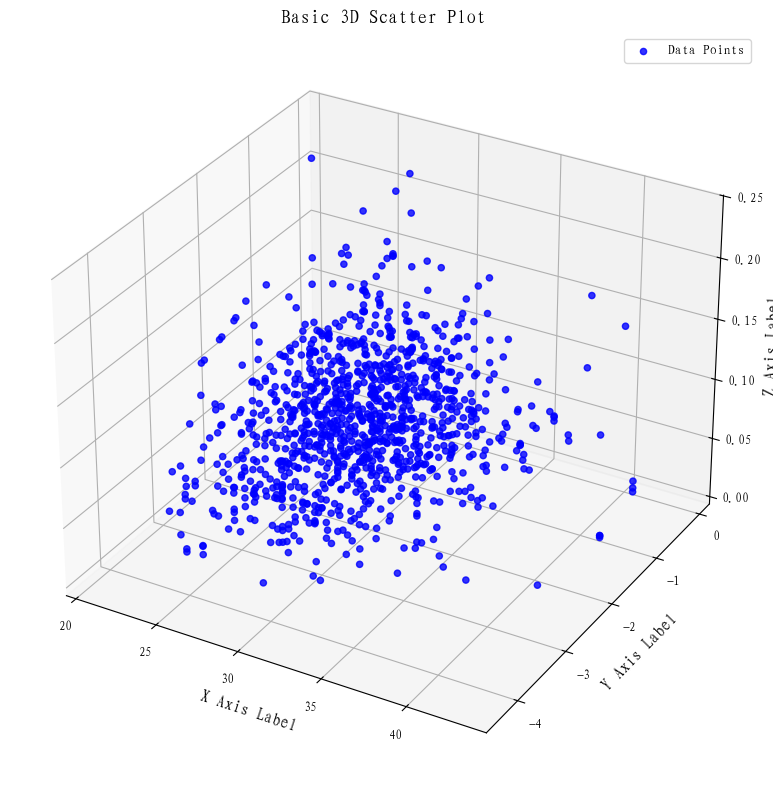

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ÂØºÂÖ•3DÁªòÂõæÂ∑•ÂÖ∑
import numpy as np

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•‰øùËØÅÁªìÊûúÂèØÈáçÁé∞
np.random.seed(42)
# ÁîüÊàêÁ§∫‰æãÊï∞ÊçÆÔºö100‰∏™ÈöèÊú∫ÁÇπ
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# ÂàõÂª∫ÂõæÂΩ¢(figure)Âíå3DÂùêÊ†áËΩ¥(axes)
fig = plt.figure(figsize=(10, 8))  # ËÆæÁΩÆÂõæÂΩ¢Â§ßÂ∞è
ax = fig.add_subplot(111, projection='3d')  # 111Ë°®Á§∫1x1ÁΩëÊ†º‰∏≠ÁöÑÁ¨¨1‰∏™Âõæ

# ÁªòÂà∂‰∏âÁª¥Êï£ÁÇπÂõæ
# x, y, z: ‰∏â‰∏™Áª¥Â∫¶ÁöÑÊï∞ÊçÆ
# c='blue': ÁÇπÁöÑÈ¢úËâ≤ËÆæÁΩÆ‰∏∫ËìùËâ≤
# marker='o': ÁÇπÁöÑÂΩ¢Áä∂ËÆæÁΩÆ‰∏∫ÂúÜÂΩ¢
# s=20: ÁÇπÁöÑÂ§ßÂ∞èËÆæÁΩÆ‰∏∫20
scatter = ax.scatter(df_male_clean.loc[:,'Âπ¥ÈæÑ'], df_male_clean.loc[:,'Ê£ÄÊµãÂ≠ïÂë®_loge'], df_male_clean.loc[:,'YÊüìËâ≤‰ΩìÊµìÂ∫¶'], c='blue', marker='o', s=20, alpha=0.8, label='Data Points')

# ËÆæÁΩÆÂùêÊ†áËΩ¥Ê†áÁ≠æ
ax.set_xlabel('X Axis Label', fontsize=12)
ax.set_ylabel('Y Axis Label', fontsize=12)
ax.set_zlabel('Z Axis Label', fontsize=12)

# ËÆæÁΩÆÂõæË°®Ê†áÈ¢ò
ax.set_title('Basic 3D Scatter Plot', fontsize=14)

# Ê∑ªÂä†Âõæ‰æã
ax.legend(loc='upper right')

# ÊòæÁ§∫ÂõæÂΩ¢
plt.tight_layout()  # Ëá™Âä®Ë∞ÉÊï¥Â≠êÂõæÂèÇÊï∞Ôºå‰Ωø‰πãÂ°´ÂÖÖÊï¥‰∏™ÂõæÂÉèÂå∫Âüü
plt.show()